# **EDA analysis of Windows Log**

In [2]:
# EDA analysis of Windows Log

In [3]:
#imprting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# configuring matplotlib for inline plotting means that the plots will be displayed in the notebook
%matplotlib inline

In [5]:
# configuring 
# defining base directory as current working directory
base_dir = os.getcwd()
# defining the path to the log file data .csv file
log_file_path = os.path.join(base_dir,'data','WindowsEventLogs_Last30Days.csv')


In [6]:
# reading the log file data into a pandas dataframe
log_df = pd.read_csv(log_file_path)
print(log_df.head())

           TimeCreated     Id LevelDisplayName  \
0  21-05-2025 10:44:41  16384      Information   
1  21-05-2025 10:44:11  16394      Information   
2  21-05-2025 10:40:08      1      Information   
3  21-05-2025 10:40:08      1      Information   
4  21-05-2025 10:40:07      1      Information   

                     ProviderName  \
0  Microsoft-Windows-Security-SPP   
1  Microsoft-Windows-Security-SPP   
2                 Universal Print   
3                 Universal Print   
4                 Universal Print   

                                             Message      LogName  
0  Successfully scheduled Software Protection ser...  Application  
1             Offline downlevel migration succeeded.  Application  
2  Initialization Successful. Enabled=false, Clou...  Application  
3  Universal Print is not enabled in the user's t...  Application  
4  Successfully received access_token for 0000000...  Application  


we have dataframe with 6 columns and 49201 rows 

In [7]:
# checking the shape of the dataframe
print(log_df.shape)

(49201, 6)


we have columns TimeCreated, Id, LevelDisplayName, ProviderName, Message, LogName with data type as object except Id which is int64

In [8]:
# columns of dataframe
print(log_df.columns)

Index(['TimeCreated', 'Id', 'LevelDisplayName', 'ProviderName', 'Message',
       'LogName'],
      dtype='object')


In [9]:
# checking the data types of the columns
print(log_df.dtypes)

TimeCreated         object
Id                   int64
LevelDisplayName    object
ProviderName        object
Message             object
LogName             object
dtype: object


In [10]:
# we will do data cleaning and data preprocessing

# checking for null values in the dataframe
# we will also print the row of the dataframe which has null values
print(log_df[log_df.isnull().any(axis=1)])
print(log_df.isnull().sum())

               TimeCreated    Id LevelDisplayName              ProviderName  \
63     21-05-2025 10:30:40  9997      Information               Application   
95     21-05-2025 10:29:11     0              NaN  RtkAudioUniversalService   
96     21-05-2025 10:29:11     0              NaN           SynTPEnhService   
108    21-05-2025 03:19:51     0              NaN  RtkAudioUniversalService   
115    21-05-2025 03:19:49     0              NaN           SynTPEnhService   
...                    ...   ...              ...                       ...   
49127  22-04-2025 02:30:55  7021      Information                  Netwtw14   
49159  21-04-2025 22:43:44  7021      Information                  Netwtw14   
49161  21-04-2025 22:41:14  7021      Information                  Netwtw14   
49166  21-04-2025 22:37:56  7021      Information                  Netwtw14   
49195  21-04-2025 19:43:04  7021      Information                  Netwtw14   

      Message      LogName  
63        NaN  Applica

after removing the null values we will have 48231 rows and 6 columns 

In [11]:
# we will drop the null values from the dataframe
log_df = log_df.dropna()
# checking the shape of the dataframe after dropping null values
print(log_df.shape)
print(log_df.isnull().sum())


(48231, 6)
TimeCreated         0
Id                  0
LevelDisplayName    0
ProviderName        0
Message             0
LogName             0
dtype: int64


# **now we will do Analysis of the data with different columns and their values in diffent ways**

first we will do analysis of the data with respect to TimeCreated column
# *Timestamp Analysis*

In [12]:
# converting the TimeCreated column to datetime format
log_df= log_df.copy()
log_df['TimeCreated'] = pd.to_datetime(
    log_df['TimeCreated'],
    format='%d-%m-%Y %H:%M:%S'
) #year/month/day hour/minute/
print(log_df['TimeCreated'].head())
print(log_df.dtypes)

0   2025-05-21 10:44:41
1   2025-05-21 10:44:11
2   2025-05-21 10:40:08
3   2025-05-21 10:40:08
4   2025-05-21 10:40:07
Name: TimeCreated, dtype: datetime64[ns]
TimeCreated         datetime64[ns]
Id                           int64
LevelDisplayName            object
ProviderName                object
Message                     object
LogName                     object
dtype: object


In [13]:
# TimeCreated column is converted to datetime format datetime64[ns]


In [14]:
# minimum and maximum date in the TimeCreated column
min_date= log_df['TimeCreated'].min()
max_date= log_df['TimeCreated'].max()

## *Temporal Event Sequence Analysis*
goal: Identify patterns in the order/timing of events

### *method*
1. Lag analysis:Compute time differences between consecutive events of specific Id or ProviderName (e.g., security-related events like 4624 [logon] and 4625 [failed logon]).
2. Markov Chains: Model transition probabilities between event types (e.g., likelihood of an "Error" following a "Warning").
3. Sequence Mining: Use algorithms like SPADE to discover frequent event sequences (e.g., repeated failed logons followed by a successful logon).

In [15]:
#we will sort the dataframe by TimeCreated column
log_df =log_df.sort_values(by='TimeCreated').reset_index(drop=True) #.reset_index(drop=True) will reset the index of the dataframe

print(log_df.head())


          TimeCreated    Id LevelDisplayName                    ProviderName  \
0 2025-04-21 19:43:02  6013      Information                        EventLog   
1 2025-04-21 19:43:02   172      Information  Microsoft-Windows-Kernel-Power   
2 2025-04-21 19:43:03  1008          Warning       Microsoft-Windows-Perflib   
3 2025-04-21 19:43:03  1008          Warning       Microsoft-Windows-Perflib   
4 2025-04-21 19:43:03  1008          Warning       Microsoft-Windows-Perflib   

                                             Message      LogName  
0                The system uptime is 37734 seconds.       System  
1  Connectivity state in standby: Connected, Reas...       System  
2  The Open procedure for service "aspnet_state" ...  Application  
3  The Open procedure for service "ASP.NET_4.0.30...  Application  
4  The Open procedure for service "ASP.NET" in DL...  Application  


#### *Lag Analysis*
Some critical Event IDs include:

 

    4624: User successfully logged on to a computer
    4625: Attempt made to logon with unknown user name or bad password and failed
    4634: Logoff process completed for user
    4647: User Initiated logoff
    4648: User successfully logged on to a computer using explicit credentials while already logged on as different user
    4779: User disconnected terminal server or virtual host session without logging off
    4798: A user’s local group membership was enumerated.
    4799: A security-enabled local group membership was enumerated
    4820: A Kerberos Ticket-granting-ticket (TGT) was denied
    4821: A Kerberos service ticket was denied because the user, device, or both does not meet the access control restrictions
    4822: NTLM authentication failed because the account was a member of the Protected User group
    4823: NTLM authentication failed because access control restrictions are required
    4824: Kerberos pre-authentication by using DES or RC4 failed because the account was a member of the Protected User group
    
Some important Event IDs to consider include:

 

    4103: PowerShell Module Logging
    4104: PowerShell Script Block Logging
    4656: Request to handle or access an object
    4658: Handle to an object was closed
    4659: Handle to an object was requested with intent to delete
    4660: Object deleted
    4663: Attempt to access object was made
    4664: Attempt to create a hard link was made
    4670: Object permissions were changed
    4672: Special Privileges Assigned to New Logon
    4673: Calling privileged service
    4674: Attempted operation on a privileged object
    4985: Transaction state change
    4691: Indirect access to an object was requested.
    4698: A scheduled task was created.
    4699: A scheduled task was deleted.
    4700: A scheduled task was enabled.
    4701: A scheduled task was disabled.
    4702: A scheduled task was updated.
    5051: File was virtualized

Microsoft Defender Antivirus Event IDs:

    1002: malware scan stopped before completing scan
    1003: malware scan paused
    1005: malware scan failed
    1006, 1116: malware or unwanted software detected
    1007, 1117: action to protect system performed
    1008, 1118: action to protect system failed
    1009: item restored from quarantine
    1012: unable to delete item in quarantine
    1015: suspicious behavior detected
    1119: critical error occurred when taking action



------Lag analysis result:-----


Group          TimeEvent1  IdEvent1          TimeEvent2  IdEvent2  \
0  Global 2025-05-18 17:29:15      4624 2025-05-18 17:29:16      4625   
1  Global 2025-05-18 18:42:36      4624 2025-05-18 18:58:31      4625   
2  Global 2025-05-18 19:04:17      4624 2025-05-18 19:04:35      4625   
3  Global 2025-05-19 20:16:36      4624 2025-05-19 20:16:37      4625   
4  Global 2025-05-20 10:21:50      4624 2025-05-20 10:21:50      4625   

      Lag_Seconds  
0 0 days 00:00:01  
1 0 days 00:15:55  
2 0 days 00:00:18  
3 0 days 00:00:01  
4 0 days 00:00:00

descriptive statistics of lag analysis result:


TimeEvent1  IdEvent1                     TimeEvent2  \
count                              6       6.0                              6   
mean   2025-05-19 16:03:57.333333248    4624.0  2025-05-19 16:06:39.833333504   
min              2025-05-18 17:29:15    4624.0            2025-05-18 17:29:16   
25%    2025-05-18 18:48:01.249999872    4624.0            2025-05-18 19:00:02   
50%       2025-05-19 07:40:26.500000    4624.0            2025-05-19 07:40:36   
75%       2025-05-20 06:50:31.500000    4624.0  2025-05-20 06:50:31.750000128   
max              2025-05-21 10:29:10    4624.0            2025-05-21 10:29:10   
std                              NaN       0.0                            NaN   

       IdEvent2                Lag_Seconds  
count       6.0                          6  
mean     4625.0     0 days 00:02:42.500000  
min      4625.0            0 days 00:00:00  
25%      4625.0     0 days 00:00:00.250000  
50%      4625.0            0 days 00:00:01  
75%      4625.0     0 days 00:00:13.750000  
max      4625.0            0 days 00:15:55  
std         0.0  0 days 00:06:28.307481256

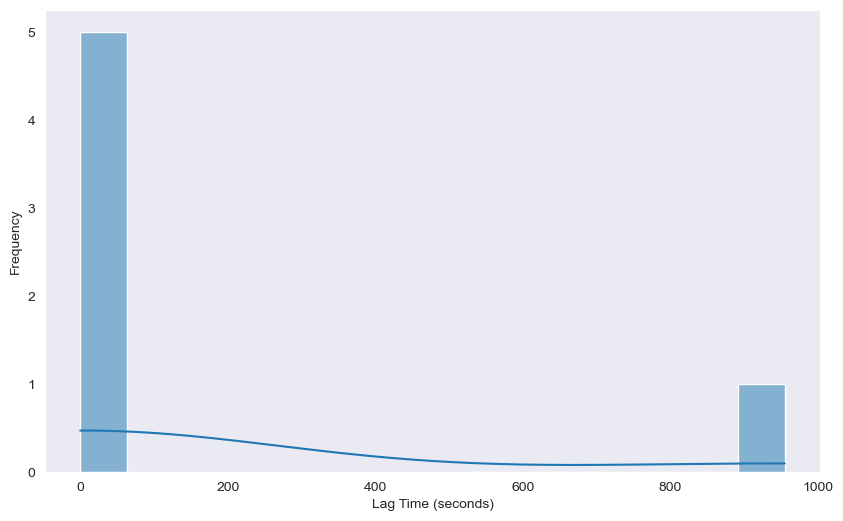

In [16]:
# lag analysis Goal: Compute time differences between consecutive events of specific Id
# lets take the example of event id 4624 log on and 4625 failed log on

event_id_4624 = 4624 #successful log on
event_id_4625 = 4625 #failed log on


lag_analysis_result= []

#filter relevant events
df_filtered_lag = log_df[log_df['Id'].isin([event_id_4624, event_id_4625])].copy()

if df_filtered_lag.empty:
    print("No relevant events found for lag analysis.")
else:
    #currently doing global anylysis
    df_global_lag = df_filtered_lag.sort_values(by='TimeCreated').reset_index(drop=True) #.reset_index(drop=True) will reset the index of the dataframe
    
    for i in range(len(df_global_lag)-1):
        curr_event= df_global_lag.iloc[i]
        next_event= df_global_lag.iloc[i+1]
        if curr_event['Id']== event_id_4624 and next_event['Id']== event_id_4625:
            time_diff = next_event['TimeCreated']-curr_event['TimeCreated']
            lag_analysis_result.append({
                'Group': 'Global',
                'TimeEvent1': curr_event['TimeCreated'],
                'IdEvent1': curr_event['Id'],
                'TimeEvent2': next_event['TimeCreated'],
                'IdEvent2': next_event['Id'],
                'Lag_Seconds': time_diff
                
            })
    
if lag_analysis_result:
    df_lags= pd.DataFrame(lag_analysis_result)
    print('------Lag analysis result:-----')
    display(df_lags.head())
    
    
    print('descriptive statistics of lag analysis result:')
    display(df_lags.describe())
    
    df_lags['Lag_Seconds'] = df_lags['Lag_Seconds'].dt.total_seconds()
    df_lags =df_lags[df_lags['Lag_Seconds'].between(0, 360000000000000)] # filter out lag times greater than 10 days
    plt.figure(figsize=(10,6))
    sns.histplot(df_lags['Lag_Seconds'], bins=15, kde=True)
    
    #plt.xticks(f'distribution of lag time between event id {event_id_4624} and {event_id_4625}')
    plt.xlabel('Lag Time (seconds)')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()
    
    
        



### *Markov Chains*
Goal: Model transition probabilities between event types (e.g., LevelDisplayName like "Information", "Warning", "Error").


Transition Probability Matrix:


Next State        Error  Information   Warning
Current State                                 
Error          0.308357     0.645533  0.046110
Information    0.004969     0.975767  0.019264
Warning        0.006015     0.445113  0.548872

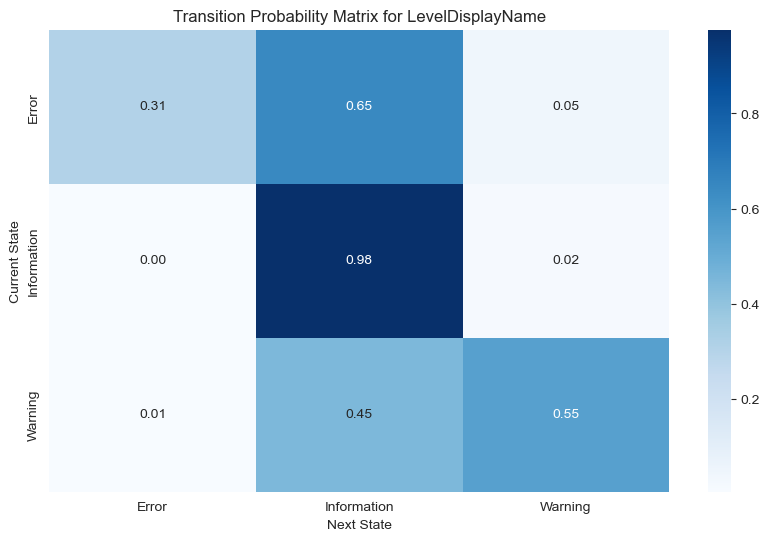

In [17]:
event_type_col='LevelDisplayName'
event_type_sequences = log_df[event_type_col]

#pair of (curr_state, next_state)
curr_state = event_type_sequences.iloc[:-1].reset_index(drop=True)
next_state = event_type_sequences.iloc[1:].reset_index(drop=True)

df_transition = pd.DataFrame({'Current State': curr_state, 'Next State': next_state})

#calculate transition probabilities
transition_cnt=pd.crosstab(df_transition['Current State'], df_transition['Next State'])

transition_prob = transition_cnt.apply(lambda row: row/row.sum() if row.sum() > 0 else row, axis=1)

print('Transition Probability Matrix:')
display(transition_prob)

#visualize the transition probabilities
plt.figure(figsize=(10,6))
sns.heatmap(transition_prob, annot=True, fmt='.2f', cmap='Blues')
plt.title(f'Transition Probability Matrix for {event_type_col}')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()


### *Sequence Mining*
Goal: Use algorithms like SPADE to discover frequent event sequences (e.g., repeated failed logons followed by a successful logon).
SPADE (Sequential Pattern Discovery using Equivalence classes) is a well-known algorithm for mining sequential patterns in data. It can be used to discover frequent sequences of events in the log data.


In [18]:
#Frequent N-grams of Event IDs
#finds frequent ordered N-grams (pairs, triplets) of Event IDs
from collections import Counter
from itertools import tee 
#this is used to create multiple iterators from a single iterable

In [19]:
def generate_ngrams(sequence, n):
    ''' generate seq of n grams'''
    
    if not sequence or len(sequence) < n:
        return []
    #using tee
    iterables = tee(iter(sequence), n)
    
    for i, it in enumerate(iterables):
        for _ in range(i):
            next(it, None) # Consume elements
    return zip(*iterables)
    
n_grams = [2, 3 , 4, 5 , 6, 7, 8] # n-grams to consider
top_n_seq=10
all_grams = {n: [] for n in n_grams}

event_id_list_global= log_df['Id'].tolist()
for n in n_grams:
    all_grams[n].extend(list(generate_ngrams(event_id_list_global, n)))

for n in n_grams:
    if all_grams[n]:  # replaced the old 'if n_grams[n]:'
        n_grams_counter = Counter(all_grams[n])
        print(f"Top {top_n_seq} Frequent {n}-grams:")
        df_ngrams = pd.DataFrame(n_grams_counter.most_common(top_n_seq),
                                 columns=[f"{n} -gram seq", "Frequency"])
        display(df_ngrams)



Top 10 Frequent 2-grams:


2 -gram seq  Frequency
0    (5379, 5379)      19244
1    (4798, 4798)       4385
2    (4907, 4907)       1434
3    (9008, 9007)       1054
4    (4624, 4672)        800
5    (4672, 4624)        686
6  (10010, 10010)        635
7        (55, 55)        556
8  (16394, 16384)        549
9          (1, 1)        530

Top 10 Frequent 3-grams:


3 -gram seq  Frequency
0     (5379, 5379, 5379)      18401
1     (4798, 4798, 4798)       3822
2     (4907, 4907, 4907)       1433
3  (10010, 10010, 10010)        536
4           (55, 55, 55)        496
5     (9007, 9008, 9007)        470
6     (9008, 9007, 9008)        469
7              (1, 1, 1)        428
8     (4672, 4624, 4672)        305
9     (4624, 4672, 4624)        304

Top 10 Frequent 4-grams:


4 -gram seq  Frequency
0      (5379, 5379, 5379, 5379)      17676
1      (4798, 4798, 4798, 4798)       3369
2      (4907, 4907, 4907, 4907)       1432
3  (10010, 10010, 10010, 10010)        462
4      (9008, 9007, 9008, 9007)        450
5              (55, 55, 55, 55)        442
6                  (1, 1, 1, 1)        353
7      (9007, 9008, 9007, 9008)        259
8      (4624, 4672, 4624, 4672)        222
9      (1004, 1004, 1004, 1004)        211

Top 10 Frequent 5-grams:


5 -gram seq  Frequency
0       (5379, 5379, 5379, 5379, 5379)      17029
1       (4798, 4798, 4798, 4798, 4798)       2974
2       (4907, 4907, 4907, 4907, 4907)       1431
3  (10010, 10010, 10010, 10010, 10010)        399
4                 (55, 55, 55, 55, 55)        392
5                      (1, 1, 1, 1, 1)        299
6       (9008, 9007, 9008, 9007, 9008)        252
7       (9007, 9008, 9007, 9008, 9007)        252
8       (1004, 1004, 1004, 1004, 1004)        207
9            (112, 112, 112, 112, 112)        162

Top 10 Frequent 6-grams:


6 -gram seq  Frequency
0        (5379, 5379, 5379, 5379, 5379, 5379)      16472
1        (4798, 4798, 4798, 4798, 4798, 4798)       2643
2        (4907, 4907, 4907, 4907, 4907, 4907)       1430
3                    (55, 55, 55, 55, 55, 55)        350
4  (10010, 10010, 10010, 10010, 10010, 10010)        345
5                          (1, 1, 1, 1, 1, 1)        282
6        (9008, 9007, 9008, 9007, 9008, 9007)        246
7        (1004, 1004, 1004, 1004, 1004, 1004)        203
8        (9007, 9008, 9007, 9008, 9007, 9008)        154
9              (112, 112, 112, 112, 112, 112)        128

Top 10 Frequent 7-grams:


7 -gram seq  Frequency
0         (5379, 5379, 5379, 5379, 5379, 5379, 5379)      15986
1         (4798, 4798, 4798, 4798, 4798, 4798, 4798)       2340
2         (4907, 4907, 4907, 4907, 4907, 4907, 4907)       1429
3                       (55, 55, 55, 55, 55, 55, 55)        311
4  (10010, 10010, 10010, 10010, 10010, 10010, 10010)        295
5                              (1, 1, 1, 1, 1, 1, 1)        267
6         (1004, 1004, 1004, 1004, 1004, 1004, 1004)        199
7         (9007, 9008, 9007, 9008, 9007, 9008, 9007)        152
8         (9008, 9007, 9008, 9007, 9008, 9007, 9008)        151
9                (112, 112, 112, 112, 112, 112, 112)        103

Top 10 Frequent 8-grams:


8 -gram seq  Frequency
0   (5379, 5379, 5379, 5379, 5379, 5379, 5379, 5379)      15526
1   (4798, 4798, 4798, 4798, 4798, 4798, 4798, 4798)       2066
2   (4907, 4907, 4907, 4907, 4907, 4907, 4907, 4907)       1428
3                   (55, 55, 55, 55, 55, 55, 55, 55)        275
4                           (1, 1, 1, 1, 1, 1, 1, 1)        257
5  (10010, 10010, 10010, 10010, 10010, 10010, 100...        248
6   (1004, 1004, 1004, 1004, 1004, 1004, 1004, 1004)        195
7   (9008, 9007, 9008, 9007, 9008, 9007, 9008, 9007)        149
8   (9007, 9008, 9007, 9008, 9007, 9008, 9007, 9008)        100
9                           (2, 2, 2, 2, 2, 2, 2, 2)         96

# **Multivariate Time-Series Analysis**    
Goal: Analyze interactions between multiple event types over time.

## **Data Preparation for Time-Series Analysis**
must convert your sporadic event log data into regular time series. This involves choosing your variables and resampling the data into fixed time intervals (e.g., counts per minute).

In [20]:
import pandas as pd


df_for_ts = log_df.copy()

if 'TimeCreated' in df_for_ts.columns:
    df_for_ts.set_index('TimeCreated', inplace=True)
elif not isinstance(df_for_ts.index, pd.DatetimeIndex):
    print("Warning: The index is not a DatetimeIndex. Resetting index.")
    df_for_ts.reset_index(inplace=True)
    df_for_ts.set_index('TimeCreated', inplace=True)

df_for_ts.sort_index(inplace=True)

level_dummies = pd.get_dummies(df_for_ts['LevelDisplayName'])


ts_data = level_dummies.resample('min').sum()
ts_data.fillna(0, inplace=True)


print("--- Correctly Resampled Time-Series Data ---")
print(ts_data.head())
print("\nShape of the resampled dataframe:")
print(ts_data.shape)

--- Correctly Resampled Time-Series Data ---
                     Error  Information  Warning
TimeCreated                                     
2025-04-21 19:43:00      0           21       32
2025-04-21 19:44:00      0            1        1
2025-04-21 19:45:00      0            3        0
2025-04-21 19:46:00      0            4        0
2025-04-21 19:47:00      0            0        0

Shape of the resampled dataframe:
(42669, 3)


## **Vector Autoregression (VAR) Analysis**
This model will help you understand how the counts of 'Error', 'Warning', and 'Information' events influence each other over time.

In [21]:
from statsmodels.tsa.api import VAR

model = VAR(ts_data)

result_var = model.fit(maxlags=15, ic='aic')
print("--- VAR Model Summary ---")
print(result_var.summary())

--- VAR Model Summary ---
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 27, May, 2025
Time:                     11:37:06
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    1.15077
Nobs:                     42654.0    HQIC:                   1.13160
Log likelihood:          -205377.    FPE:                    3.07331
AIC:                      1.12275    Det(Omega_mle):         3.06338
--------------------------------------------------------------------
Results for equation Error
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.003055         0.000924            3.306           0.001
L1.Error                0.033876         0.004908            6.902           0.000
L1.Information          0.

## **Granger Causality Testing**
more direct test for predictability between pairs of event types.

In [22]:
from statsmodels.tsa.stattools import grangercausalitytests
# Perform Granger causality tests for all pairs of event types

print("--- Granger Causality Tests ---")

print("Does 'Warning' Granger-cause 'Error'?")
#test1 chitest is performed. We look at its p-value.
result_we = grangercausalitytests(ts_data[['Warning', 'Error']], maxlag=4, verbose=False)
p_value_we = result_we[1][0]['ssr_chi2test'][1]

if p_value_we < 0.05:
    print(f"Yes, 'Warning' Granger-causes 'Error' (p-value: {p_value_we:.4f}). Past 'Warning' counts help predict 'Error' counts.")
else:
    print(f"No, 'Warning' does not Granger-cause 'Error' (p-value: {p_value_we:.4f})")

#test2
print("Does 'Error' Granger-cause 'Warning'?")
result_ew = grangercausalitytests(ts_data[['Error', 'Warning']], maxlag=4, verbose=False)
p_value_ew = result_ew[1][0]['ssr_chi2test'][1]
if p_value_ew < 0.05:
    print(f"Yes, 'Error' Granger-causes 'Warning' (p-value: {p_value_ew:.4f}). Past 'Error' counts help predict 'Warning' counts.")
else:
    print(f"No, 'Error' does not Granger-cause 'Warning' (p-value: {p_value_ew:.4f})")
    


--- Granger Causality Tests ---
Does 'Warning' Granger-cause 'Error'?
Yes, 'Warning' Granger-causes 'Error' (p-value: 0.0000). Past 'Warning' counts help predict 'Error' counts.
Does 'Error' Granger-cause 'Warning'?


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Yes, 'Error' Granger-causes 'Warning' (p-value: 0.0000). Past 'Error' counts help predict 'Warning' counts.


conlusion: 

## **Frequency-Domain Analysis (FFT)**
1. previous analysis focused on causality and transitions (what event follows another).
2. Frequency-domain analysis looks for a completely different pattern: hidden periodicity.
3. This is a classic technique for detecting malware "beaconing" (e.g., a process contacting a command-and-control server at a regular interval).

1. *Create a High-Resolution Time Series*: Pick a specific event that might be periodic. A great candidate would be a network connection event ID or a specific ProcessName creating events. You'll want to resample at a high frequency (e.g., per second).
2. *Apply the Fast Fourier Transform (FFT)*: Convert the time-series data of event counts into its frequency components.
3. Analyze the Power Spectrum: Plot the results. A large spike in the frequency domain indicates a strong periodic signal. For example, a spike at 0.00333 Hz would correspond to a period of 300 seconds (5 minutes), a classic indicator of beaconing.

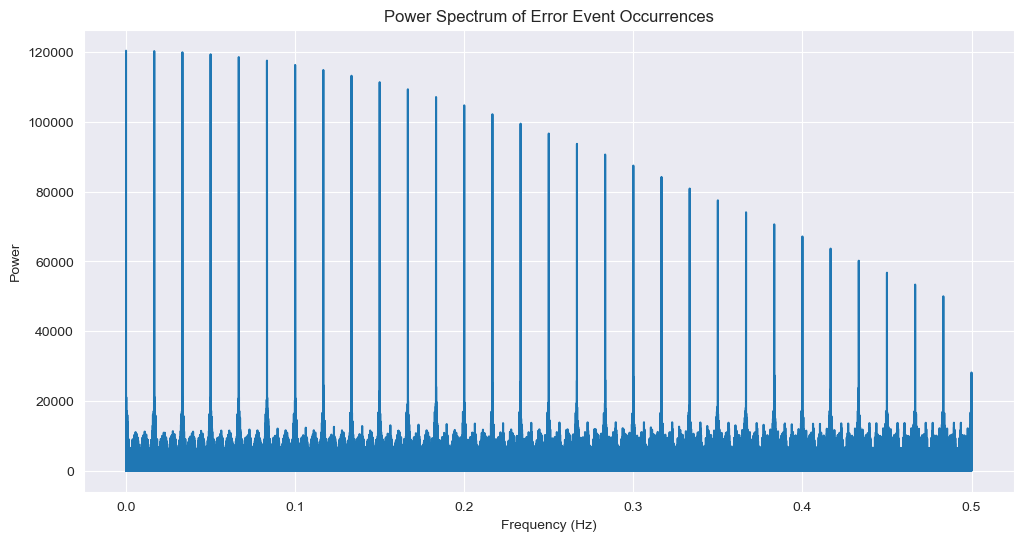

In [23]:
import numpy as np
# *Frequency-Domain Analysis (FFT)*
# Goal: Detect periodic patterns in event occurrences.
# We will use the 'Error' event type as an example.

# Resample the 'Error' event type to a high frequency (e.g., per second)
# resampled time series (resample to seconds for this) using ts_data
# resample to seconds for this
error_ts = ts_data['Error'].resample('s').sum()
error_ts.fillna(0, inplace=True)

# Apply FFT
fft_result = np.fft.fft(error_ts.values)
power_spectrum = np.abs(fft_result) ** 2

#calculate frequencies
n = len(error_ts) #n-> number of samples
T= 1.0 #sampling interval (1 second)
freq= np.fft.fftfreq(n, T) #frequency bins

# Plot the power spectrum
plt.figure(figsize=(12, 6))
plt.plot(freq[:n//2], power_spectrum[:n//2]) #plot only positive frequencies
plt.title('Power Spectrum of Error Event Occurrences')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()




Analyzing data in daily chunks to avoid memory errors...

--- Analyzing data for 2025-04-22 ---


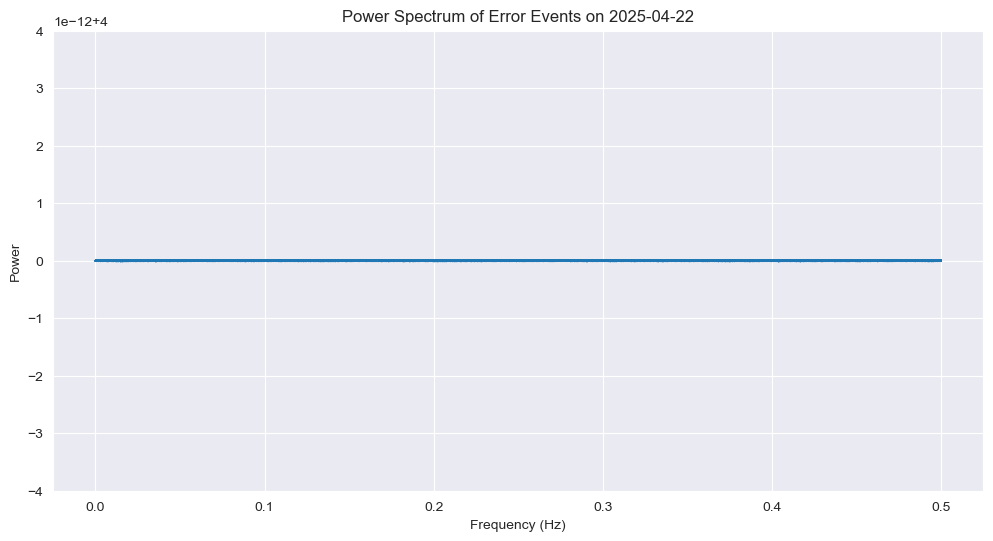


--- Analyzing data for 2025-04-25 ---


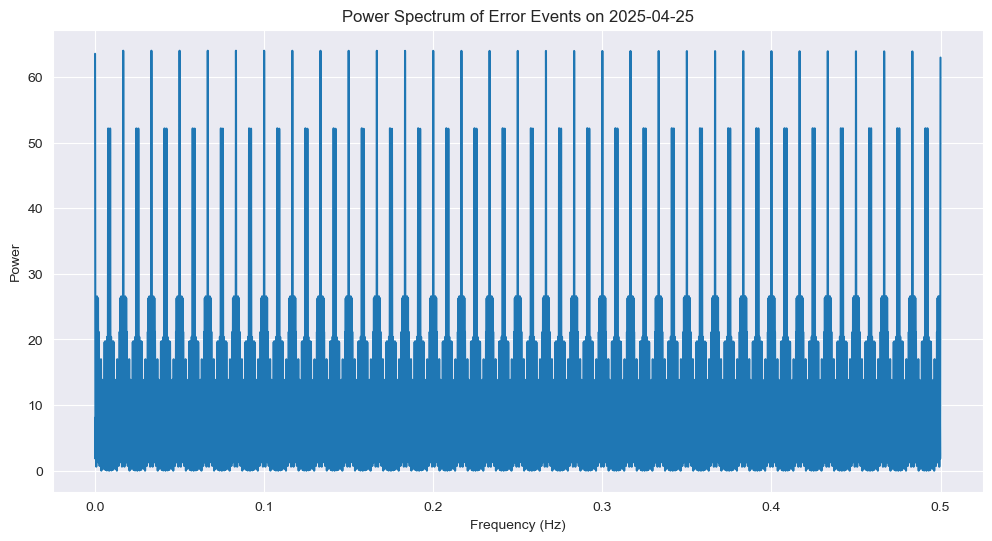


--- Analyzing data for 2025-04-26 ---


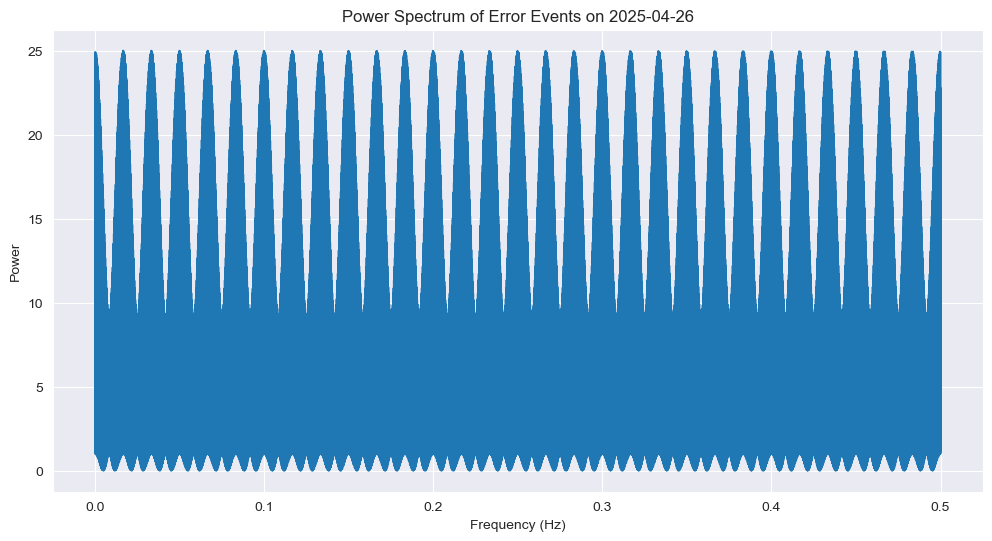


--- Analyzing data for 2025-04-27 ---


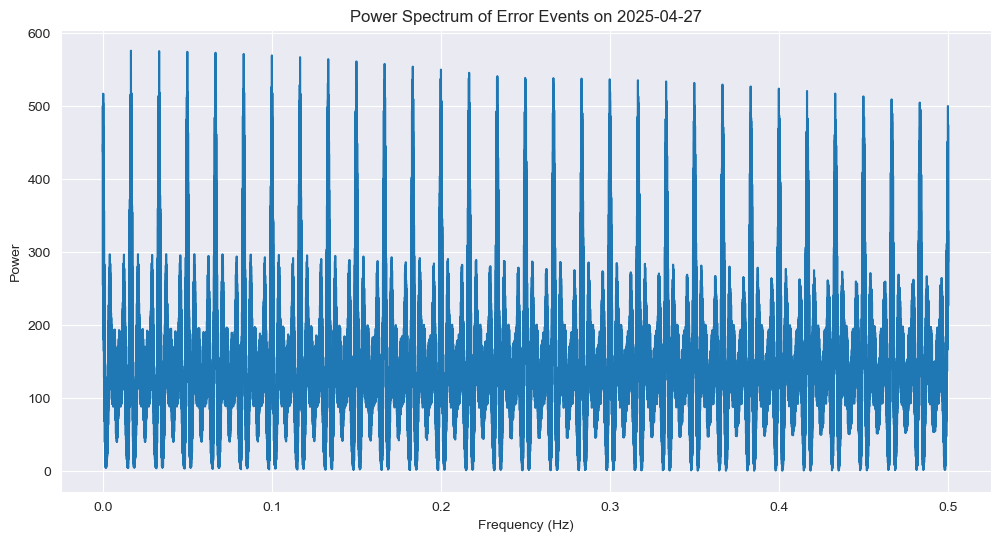


--- Analyzing data for 2025-04-28 ---


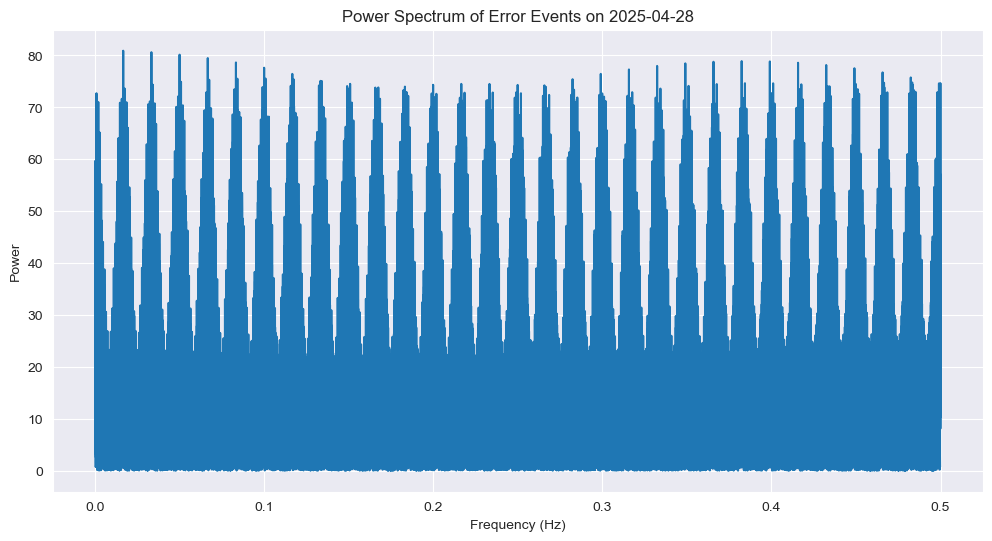


--- Analyzing data for 2025-04-29 ---


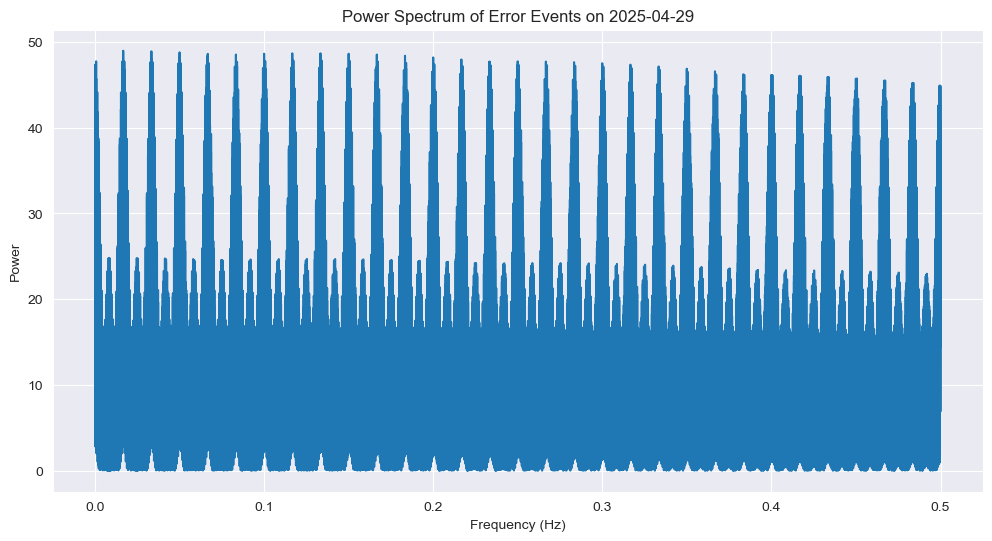


--- Analyzing data for 2025-04-30 ---


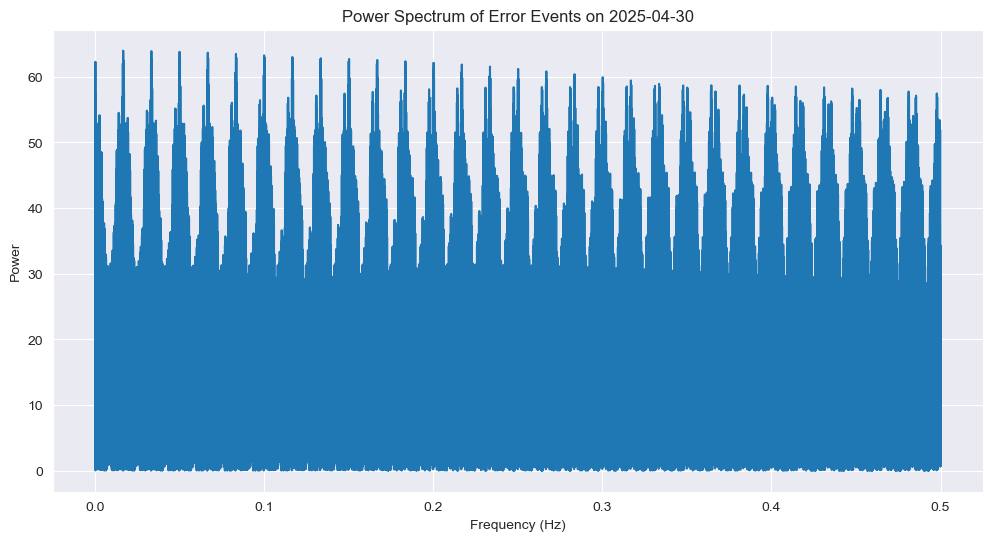


--- Analyzing data for 2025-05-01 ---


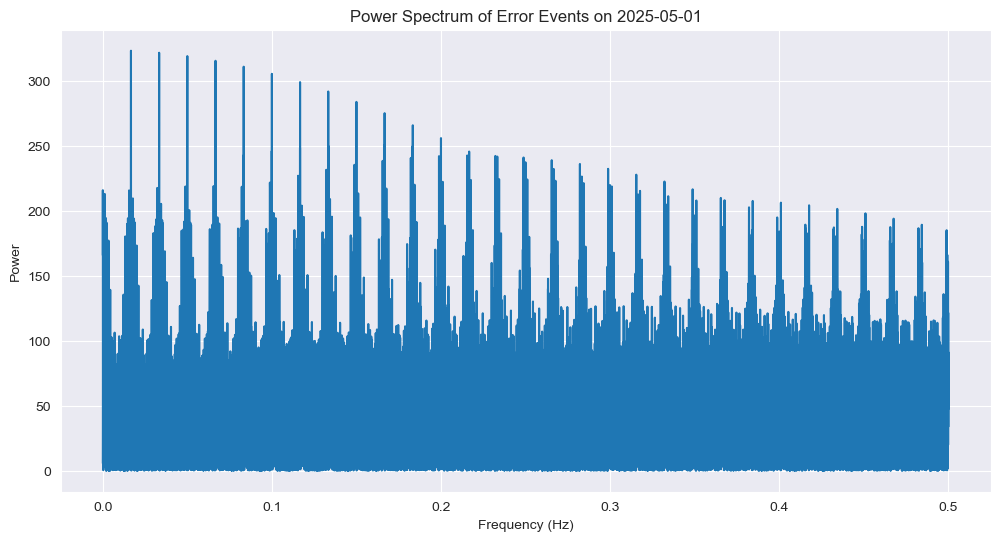


--- Analyzing data for 2025-05-02 ---


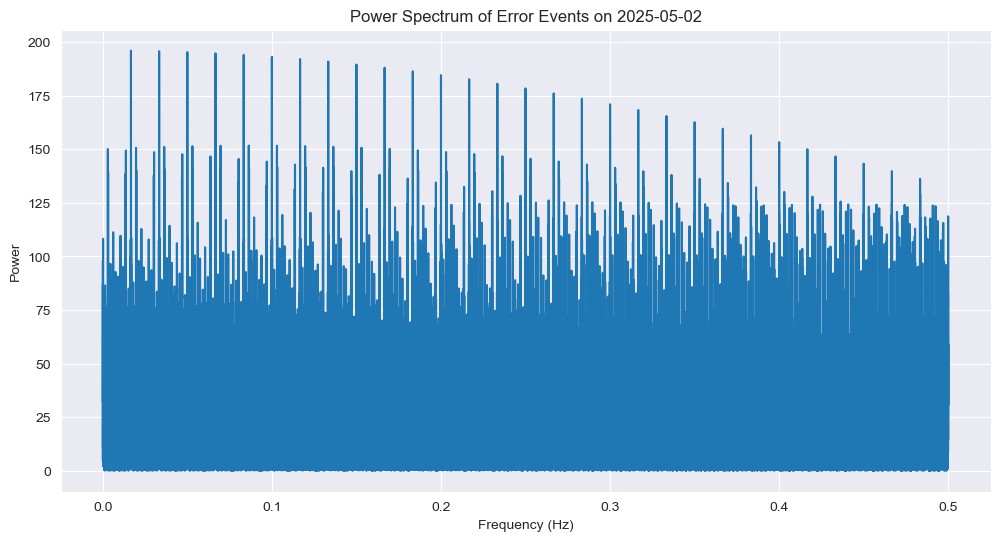


--- Analyzing data for 2025-05-03 ---


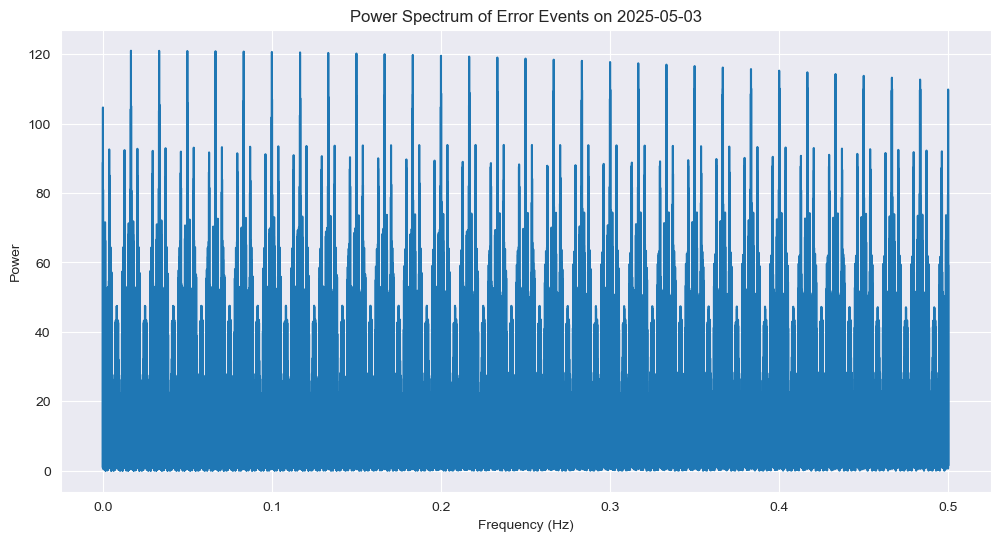


--- Analyzing data for 2025-05-04 ---


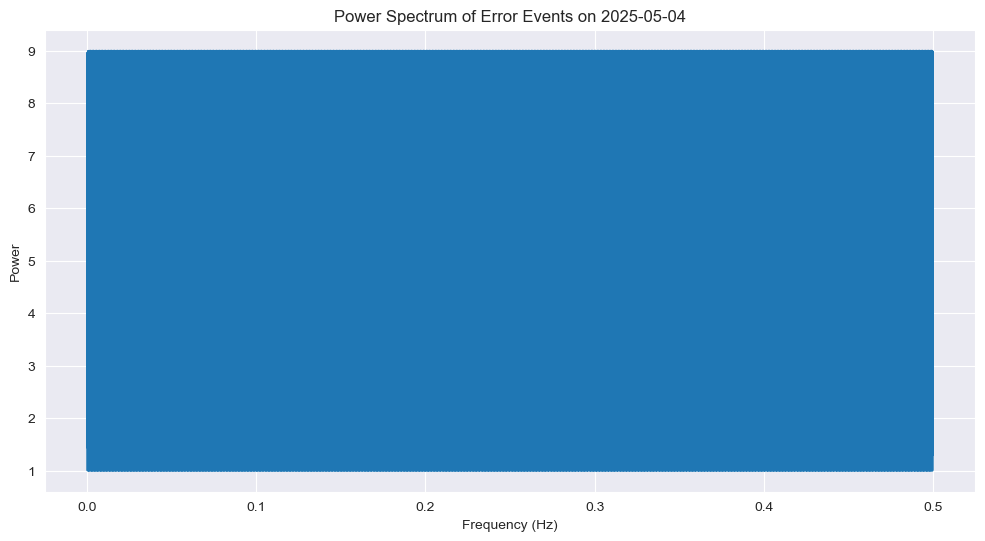


--- Analyzing data for 2025-05-05 ---


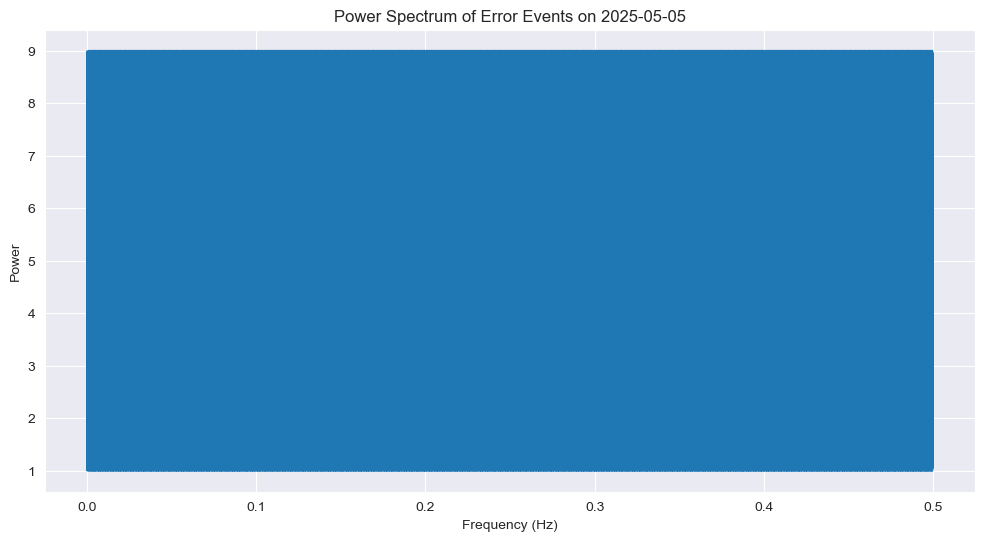


--- Analyzing data for 2025-05-06 ---


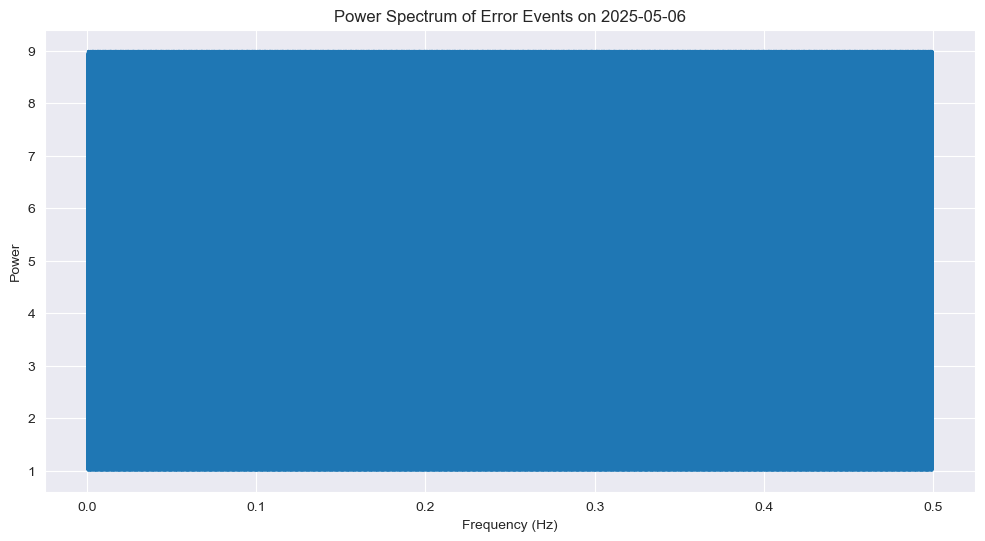


--- Analyzing data for 2025-05-10 ---


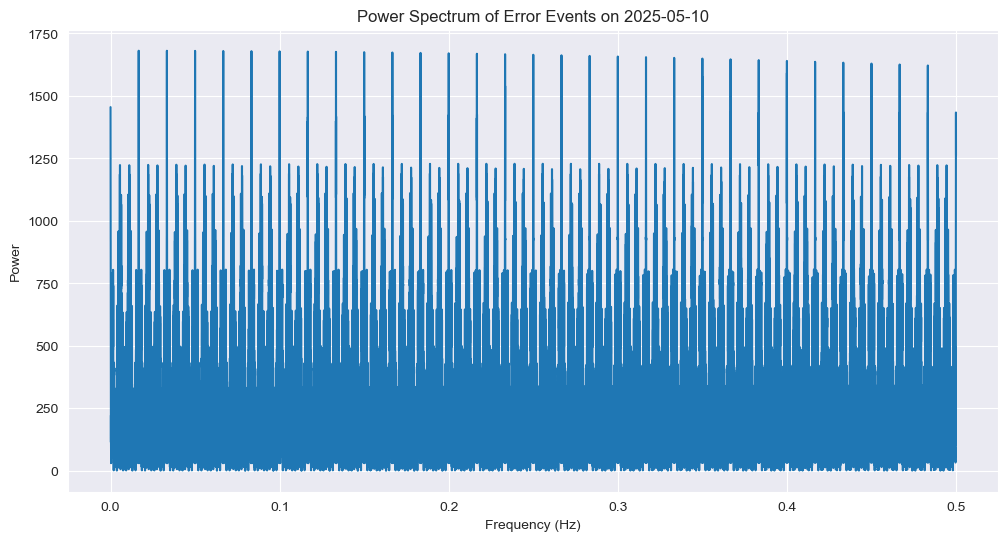


--- Analyzing data for 2025-05-11 ---


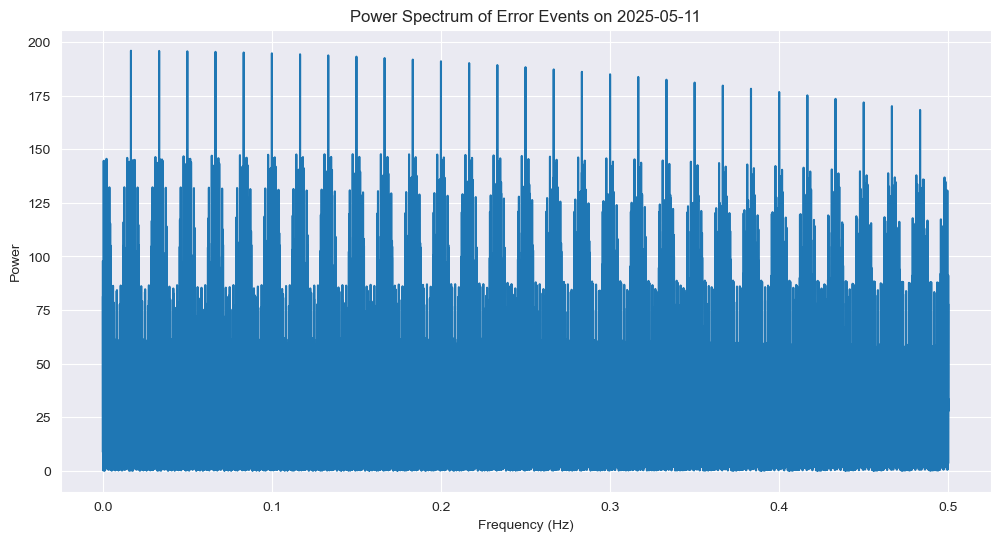


--- Analyzing data for 2025-05-12 ---


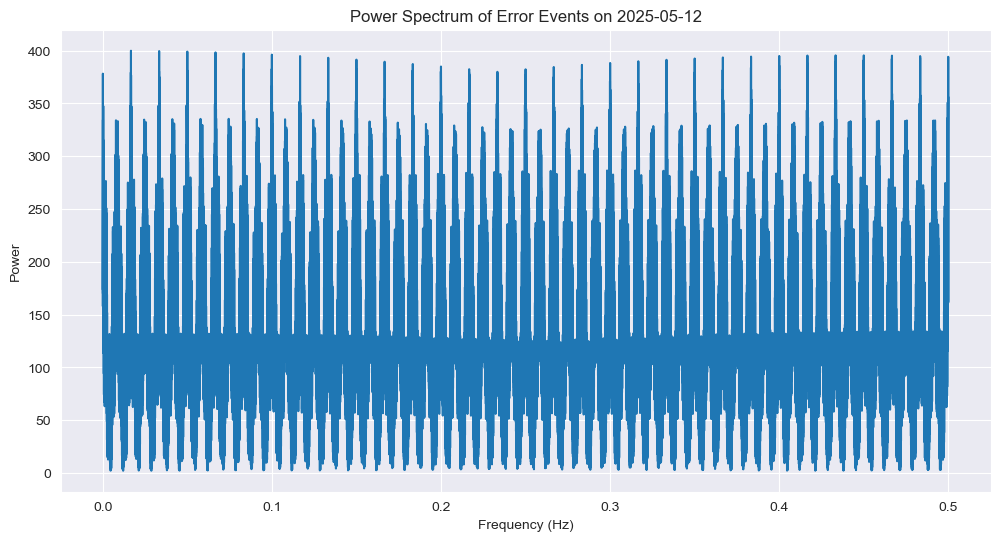


--- Analyzing data for 2025-05-13 ---


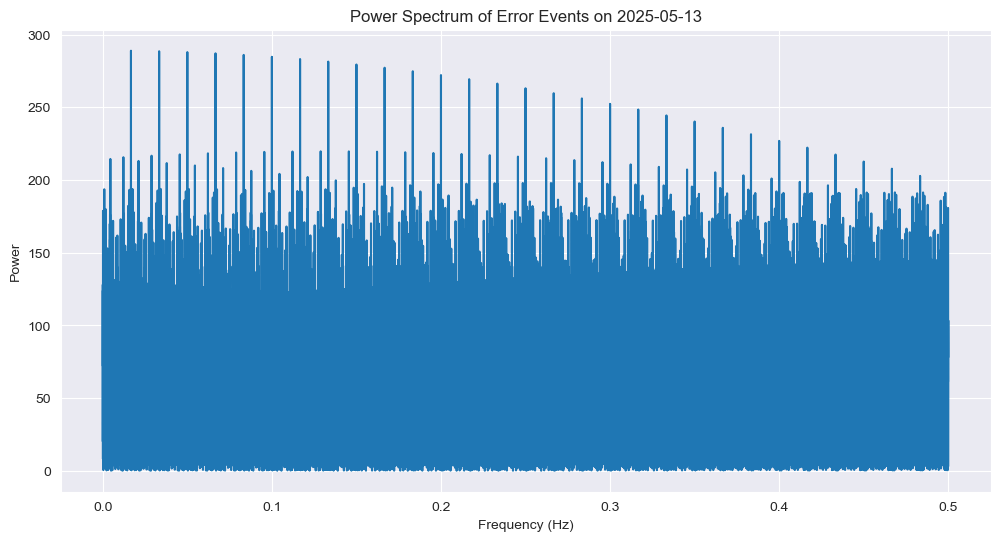


--- Analyzing data for 2025-05-14 ---


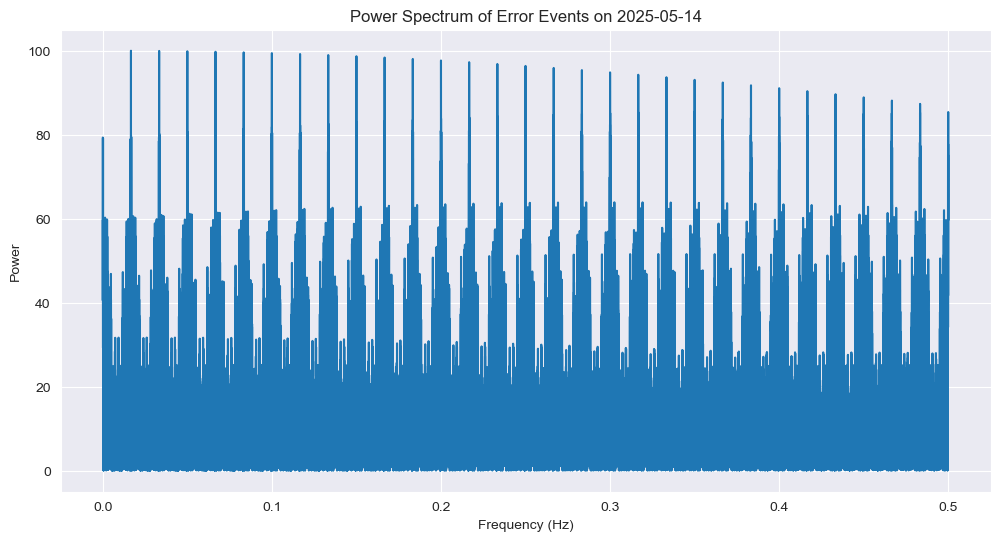


--- Analyzing data for 2025-05-15 ---


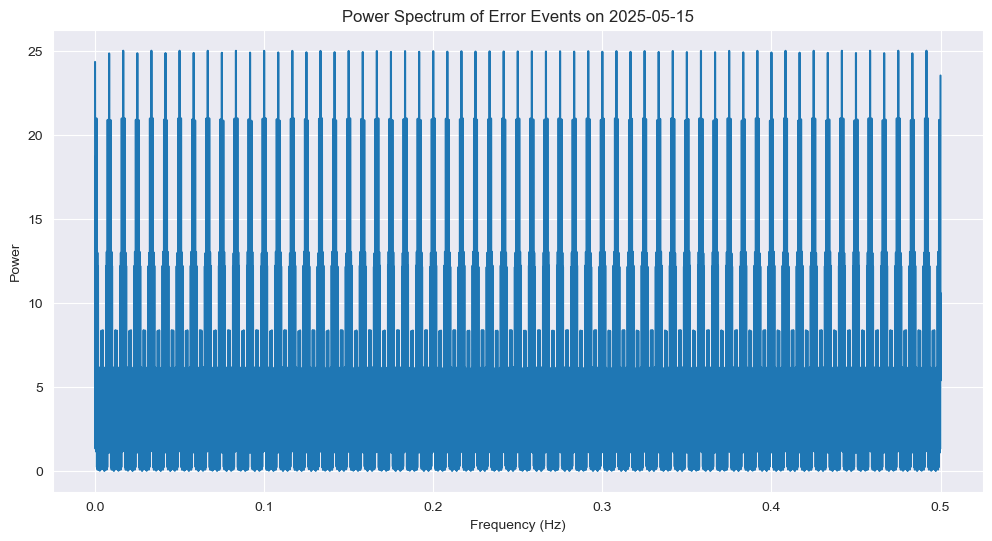


--- Analyzing data for 2025-05-16 ---


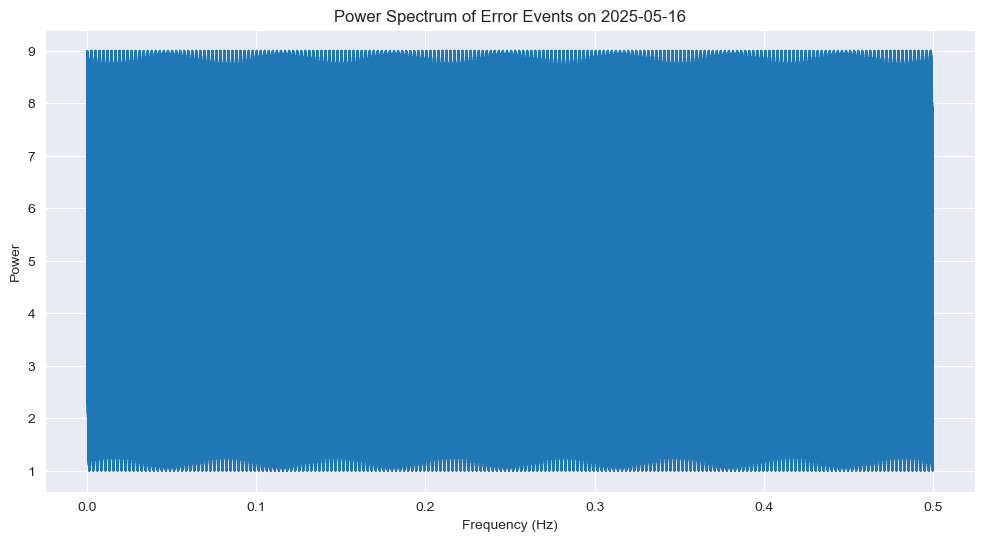


--- Analyzing data for 2025-05-17 ---


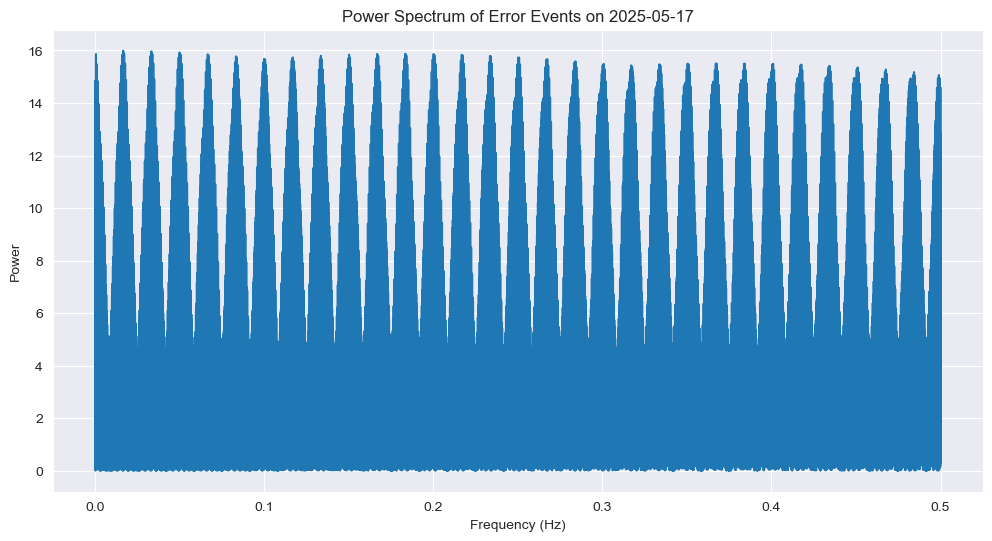


--- Analyzing data for 2025-05-18 ---


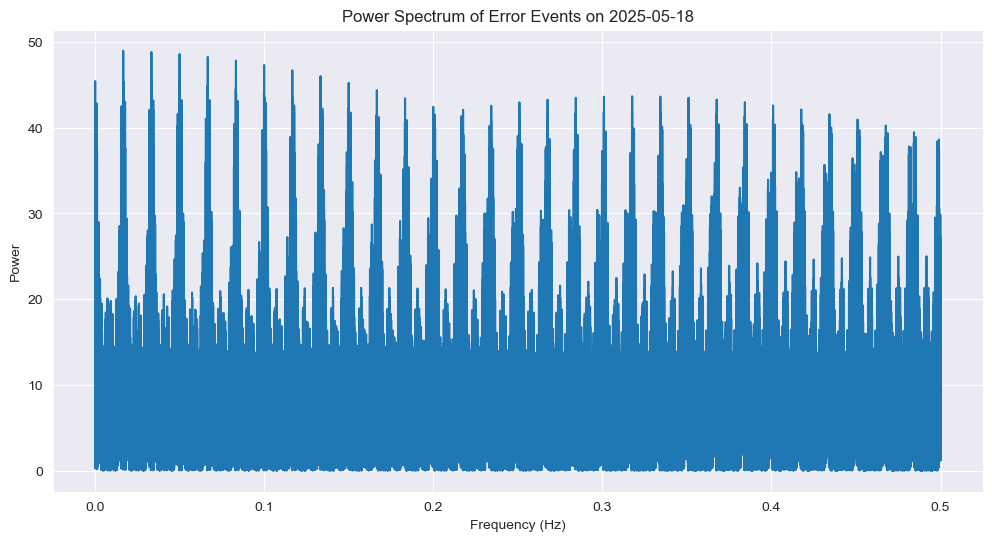


--- Analyzing data for 2025-05-19 ---


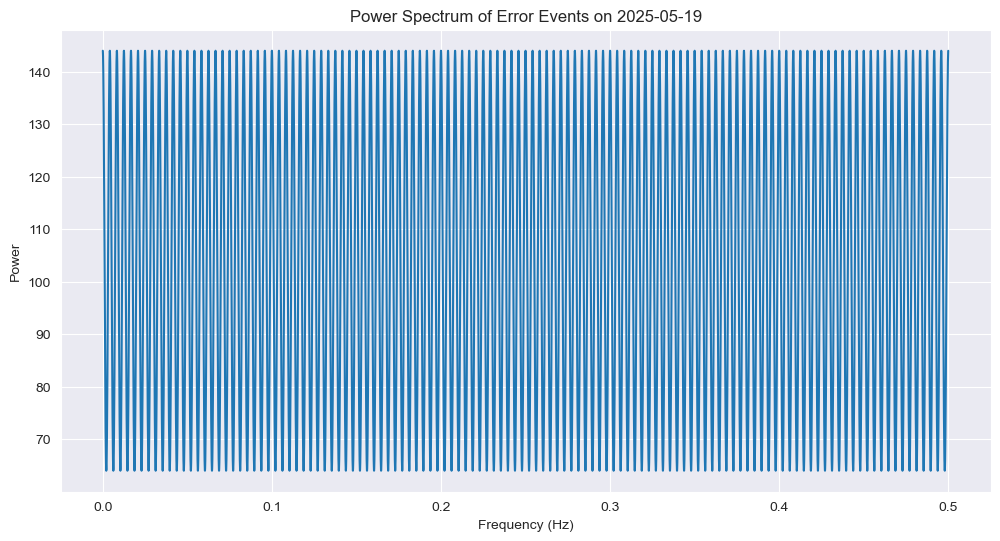


--- Analyzing data for 2025-05-20 ---


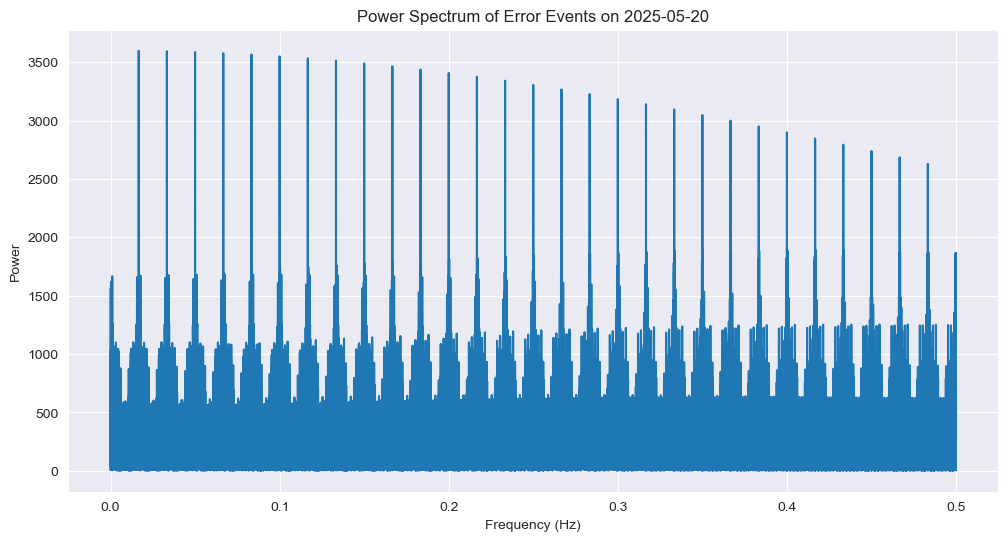


--- Analyzing data for 2025-05-21 ---


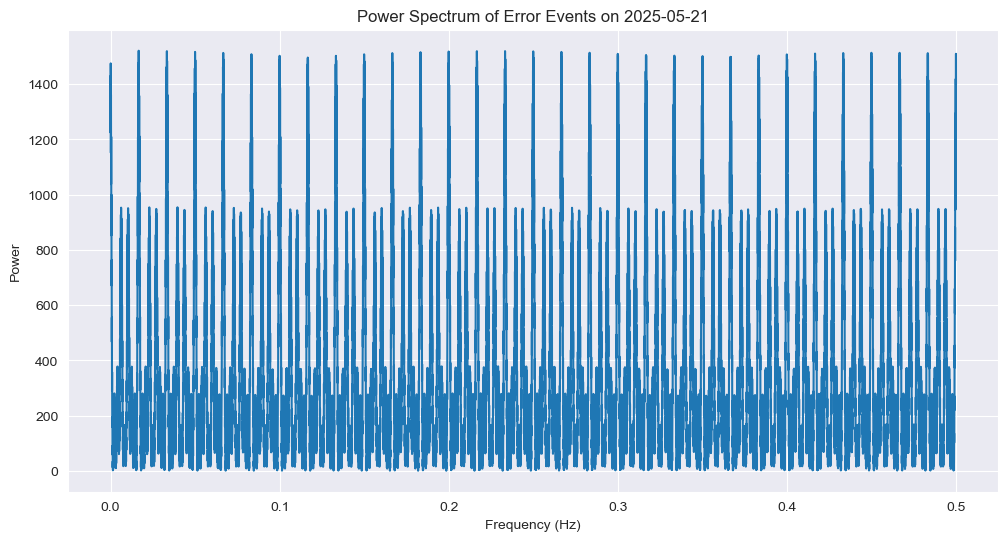

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Analyzing data in daily chunks to avoid memory errors...")

for day, daily_data in ts_data.groupby(pd.Grouper(freq='D')):

    if daily_data['Error'].sum() == 0:
        continue
        
    print(f"\n--- Analyzing data for {day.date()} ---")

    # resample
    error_ts = daily_data['Error'].resample('s').sum()
    error_ts.fillna(0, inplace=True)

    # apply FFT
    fft_result = np.fft.fft(error_ts.values)
    power_spectrum = np.abs(fft_result)**2

    # calculate frequencies
    n = len(error_ts)
    T = 1.0 # 1-second sampling interval
    freq = np.fft.fftfreq(n, T)

    # Plot 
    plt.figure(figsize=(12, 6))
    plt.plot(freq[1:n//2], power_spectrum[1:n//2])
    plt.title(f'Power Spectrum of Error Events on {day.date()}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.grid(True)
    plt.show()

# **Log Source Correlation Over Time**
Analyzing the interactions between different LogName values (e.g., 'Application', 'Security', 'System') is a new dimension.

1. Create Time Series for Log Sources: Instead of LevelDisplayName, get dummy columns for LogName.
2. Resample and Sum: Resample these dummy columns by the minute or hour to get time series for 'Security' log counts, 'System' log counts, etc..
3. Compute Correlations: You can use a rolling correlation to see how the relationship changes over time or run Granger Causality tests to see if, for example, a spike in 'Application' logs predicts a subsequent spike in 'Security' logs.

In [25]:
import pandas as pd


df_for_corr = log_df.copy()
df_for_corr.set_index('TimeCreated', inplace=True)
df_for_corr.sort_index(inplace=True)


logname_dummies = pd.get_dummies(df_for_corr['LogName'])
logname_ts_data = logname_dummies.resample('min').sum()
logname_ts_data.fillna(0, inplace=True)



available_logs = logname_ts_data.columns.tolist()
print("Available log types for correlation:", available_logs)
print("-" * 50)


window_size = 120 # 120 minutes = 2 hours

# Correlation 1: Security and Application (as you had)
if 'Security' in logname_ts_data.columns and 'Application' in logname_ts_data.columns:
    rolling_corr_sec_app = logname_ts_data['Security'].rolling(window=window_size).corr(logname_ts_data['Application'])
    print(f"\n--- Rolling Correlation between Security and Application Logs (Window: {window_size} min) ---")
    # .dropna() will remove initial periods where the window is not full, giving cleaner output
    print(rolling_corr_sec_app.dropna().tail())
else:
    print("\nWarning: 'Security' and/or 'Application' logs not found for Sec-App correlation.")

# Correlation 2: Security and System
if 'Security' in logname_ts_data.columns and 'System' in logname_ts_data.columns:
    rolling_corr_sec_sys = logname_ts_data['Security'].rolling(window=window_size).corr(logname_ts_data['System'])
    print(f"\n--- Rolling Correlation between Security and System Logs (Window: {window_size} min) ---")
    print(rolling_corr_sec_sys.dropna().tail())
else:
    print("\nWarning: 'Security' and/or 'System' logs not found for Sec-Sys correlation.")

# Correlation 3: Application and System
if 'Application' in logname_ts_data.columns and 'System' in logname_ts_data.columns:
    rolling_corr_app_sys = logname_ts_data['Application'].rolling(window=window_size).corr(logname_ts_data['System'])
    print(f"\n--- Rolling Correlation between Application and System Logs (Window: {window_size} min) ---")
    print(rolling_corr_app_sys.dropna().tail())
else:
    print("\nWarning: 'Application' and/or 'System' logs not found for App-Sys correlation.")

#we can add more pairs based on application logs

print("-" * 50)
print("Note: NaN values in the initial part of rolling correlations are expected")
print("due to the window not being full. '.dropna().tail()' shows recent valid correlations.")

Available log types for correlation: ['Application', 'Security', 'Setup', 'System']
--------------------------------------------------

--- Rolling Correlation between Security and Application Logs (Window: 120 min) ---
TimeCreated
2025-05-21 10:47:00    0.747560
2025-05-21 10:48:00    0.736690
2025-05-21 10:49:00    0.708331
2025-05-21 10:50:00    0.708331
2025-05-21 10:51:00    0.653483
dtype: float64

--- Rolling Correlation between Security and System Logs (Window: 120 min) ---
TimeCreated
2025-05-21 10:47:00    0.798048
2025-05-21 10:48:00    0.787640
2025-05-21 10:49:00    0.759296
2025-05-21 10:50:00    0.759296
2025-05-21 10:51:00    0.709449
dtype: float64

--- Rolling Correlation between Application and System Logs (Window: 120 min) ---
TimeCreated
2025-05-21 10:47:00    0.765071
2025-05-21 10:48:00    0.765071
2025-05-21 10:49:00    0.765071
2025-05-21 10:50:00    0.765071
2025-05-21 10:51:00    0.764808
dtype: float64
--------------------------------------------------
Note:

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF matrix
# Extract msg from the DataFrame
messages = log_df['Message'].fillna('').tolist()  # NaN
# TF-IDF Vectorizer


vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = vectorizer.fit_transform(messages)

# Get the most important "malware-specific" terms
feature_names = vectorizer.get_feature_names_out()
print("Top keywords from normal mine own dataset logs:", feature_names)

Top keywords from normal mine own dataset logs: ['0000' '0x0' '0x3e7' '0x7c424' '0x7e802' '0x91a2f' '0x91b9a' '1001'
 '169722813' '18' '21' '2276148384' '2543731121' 'account' 'application'
 'auditing' 'authentication' 'authority' 'connected' 'created'
 'credential' 'credentials' 'cryptographic' 'descriptor' 'detailed'
 'device' 'devices' 'domain' 'driver' 'enumerate' 'enumerated' 'event'
 'events' 'exe' 'field' 'fields' 'file' 'generated' 'group' 'guid' 'id'
 'impersonation' 'indicate' 'indicates' 'information' 'key' 'laptop'
 'length' 'level' 'local' 'logged' 'logon' 'manager' 'membership'
 'microsoft' 'network' 'new' 'nt' 'ntlm' 'object' 'occurs' 'omen'
 'operation' 'package' 'performance' 'performs' 'privileges' 'process'
 'provider' 'read' 'remote' 'request' 'requested' 'rtd3' 'sc75rknu'
 'security' 'server' 'service' 'services' 'session' 'settings' 'sid'
 'software' 'source' 'state' 'stored' 'subject' 'successfully' 'svchost'
 'system32' 'token' 'transited' 'type' 'used' 'user' '

# **LookAhead Carry Pair**


In [16]:
from pathlib import Path
import pandas as pd


def unique_pair(dataset: pd.DataFrame, col1: str, col2: str) -> pd.DataFrame:
    """
    Generate all unique pairs of values from col1 and col2,
    and collect associated 'Message's for each pair.
    """
    # Unique values in each column
    distinct_col1 = set(dataset[col1])
    distinct_col2 = set(dataset[col2])

    # Cartesian product of values
    pairs = [(a, b) for a in distinct_col1 for b in distinct_col2]
    pairs_df = pd.DataFrame(pairs, columns=[col1, col2])

    # Merge with original data to align messages
    merged = pairs_df.merge(dataset[[col1, col2, 'Message']],
                             on=[col1, col2], how='left')

    # Group and aggregate messages per pair
    result = (merged.groupby([col1, col2])['Message']
                  .apply(lambda msgs: [] if msgs.isna().all() else msgs.dropna().tolist())
                  .reset_index(name='Messages'))

    return result


if __name__ == "__main__":
    # Paths
    input_log_path = Path(
        "C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/WindowsEventLogs_Last90Days.csv"
    )
    
    output_unique_pairs_path = Path(
        "C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/unique_pairsJune90days.csv"
    )

    # Read and normalize logs
    df = pd.read_csv(input_log_path)
    #print unique values in ProviderName and LevelDisplayName
    print("Unique ProviderNames:", df['ProviderName'].unique())
    print("Unique LevelDisplayNames:", df['LevelDisplayName'].unique())
    '''
    Unique ProviderNames: 99
    Unique LevelDisplayNames: ['Information' 'Warning' nan 'Error' 'Critical']
    '''
    
    for col in ['ProviderName', 'LevelDisplayName', 'Message']:
        df[col] = df[col].astype(str).str.lower()

    # Compute unique pairs and messages
    unique_pairs_df = unique_pair(df, 'ProviderName', 'LevelDisplayName')

    # Save results
    output_unique_pairs_path.parent.mkdir(parents=True, exist_ok=True)
    unique_pairs_df.to_csv(output_unique_pairs_path, index=False)

    print(f"Unique pairs with messages saved to: {output_unique_pairs_path}")


Unique ProviderNames: 99
Unique LevelDisplayNames: ['Information' 'Warning' nan 'Error' 'Critical']


In [10]:
import pandas as pd
import re
from pathlib import Path
import ast

# --- Pre-compile regular expressions for efficiency and flag management ---
# Each tuple: (compiled_regex_object, replacement_string, regex_flags)

PATTERNS_TO_COMPILE = [
    # --- Original Generic Patterns ---
    (r'\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}(\.\d+)?Z?', '[TIMESTAMP]', 0),
    (r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b', '[IP]', 0),
    (r'S-\d-\d+(?:-\d+){1,14}', '[SID]', 0),
    (r'\{[0-9a-fA-F]{8}-(?:[0-9a-fA-F]{4}-){3}[0-9a-fA-F]{12}\}', '[GUID]', 0),
    (r'\[GUID\]', '[GUID]', 0),
    (r'0x[0-9a-fA-F]+', '[HEX]', 0),
    (r'(The\s+)(\S+)(\s+service\s+entered)', r'\1[SERVICE_NAME]\3', 0),

    # --- Patterns for DSP/FW Logs ---
    (r'intcoed_oemlibpath\.inf_amd64_[0-9a-fA-F]+', '[DRIVER_REPO_INSTANCE]', 0),
    (r'adl_[\w.-]+\.bin', '[ADL_LIB_FILE].bin', 0),
    (r'dsp_lib_[\w.-]+\.bin', '[DSP_LIB_FILE].bin', 0),
    (r'status\s*=\s*[\w\s_]+\.{1,2}', 'status = [STATUS_MESSAGE].', 0),
    (r'(loaded dsp fw library:\s*|library is not supported in bios:\s*|fx module is not supported in bios:.*?from\s*)'
     r'(\\??\\[\w\-\s.\\:]*\\|[\w\-\s.\\:]*\\|libs\\)([\w.-]+\.bin)',
     r'\1[PATH_PREFIX]\3', 0),

    # --- Patterns for .NET Application Failures ---
    (r'((?:CoreCLR|coreclr)\s+[Vv]ersion:\s*|(?:NET|\.net)\s+[Vv]ersion:\s*)([\d\.]+)', r'\1[VERSION]', 0),
    (r'(Application:\s*)([\w\s.-]+\.(?:exe|dll))', r'\1[APPLICATION_FILE]', 0),
    (r'(Path:\s*)([a-zA-Z]:\\[\S\s]+?\.exe)', r'\1[FULL_EXECUTABLE_PATH]', 0),
    (r'(cannot use file stream for\s+)(?:\[)?([a-zA-Z]:\\[\S\s]+?\.deps\.json)(?:\])?', r'\1[DEPS_FILE_PATH]', 0),
    (r'(?i)(exception code\s+)([0-9a-f]+)', r'\1[EXCEPTION_CODE]', 0),
    (r'(?i)(exception address\s+)([0-9a-f]+)', r'\1[HEX_ADDRESS]', 0),
    (r'(Exception Info:\s*)([\w\.]+):\s*(.*?)(?=\r?\n\s*(?:--->|at\s+System\.|\s*--- End of|\s*--- end of|\Z))',
     r'\1[DOTNET_EXCEPTION_TYPE]: [EXCEPTION_MESSAGE_LINE]', 0),
    (r'^\s*--->\s*([\w\.]+):\s*(.*?)(?=\r?\n\s*(?:--->|at\s+System\.|\s*--- End of|\s*--- end of|\Z))',
     r'   ---> [DOTNET_EXCEPTION_TYPE]: [EXCEPTION_MESSAGE_LINE]', re.MULTILINE),
    (r'^\s*--- (?:End of inner exception stack trace|End of stack trace from previous location|Inner Exception Stack Trace End) ---$',
     r'[STACK_TRACE_MARKER]', re.MULTILINE),
    (r'<([\w_]+)>[bdg]__\d+(_\d+)?(?=\s*\(|\s*\))', r'<$1>[COMPILER_GENERATED_PART]', 0),
    (r'(^\s+at\s+)(.+)$', r'\1[STACK_TRACE_LINE_DETAILS]', re.MULTILINE),
    (r"\(parameter '([\w\s]+)'\)", r"(parameter '[PARAM_NAME]')", 0),
    (r'\((object reference not set to an instance of an object\.|value cannot be null\.)\)', r'([COMMON_EXCEPTION_DETAIL_MSG])', 0),

    # --- NEW Patterns for Windows Error Reporting (WER) Logs ---
    (r'(version:\s*)(?:\[IP_ADDRESS\]|[\d\.]+)', r'\1[VERSION]', 0),
    (r'(Faulting (?:application|module) name:\s*)([\w\s.-]+\.(?:exe|dll|sys))', r'\1[FILE_NAME_GENERALIZED_EXT]', 0),
    (r'(Report Id:\s*)([0-9a-fA-F]{8}-(?:[0-9a-fA-F]{4}-){3}[0-9a-fA-F]{12})', r'\1[GUID]', 0),
    (r'(Faulting package full name:\s*)([\w.-]+(?:_[\d\.]+)?(?:_[\w\d]+)?(?:__\w+)?)', r'\1[WIN_PACKAGE_IDENTIFIER]', 0),
    (r'(Faulting package-relative application id:\s*)([\w.-]+)', r'\1[WIN_PACKAGE_RELATIVE_APPID]', 0),
    (r'(\[GENERAL_PATH\])([\s\w.\\()\'"-]+?\.(?:exe|dll|sys))', r'\1[SPECIFIC_FILE_SUBPATH]', 0),

    # --- Chromium-style log prefix pattern ---
    (r'^\[\d+:\d+:\d{4}/\d{6}\.\d{3}:\w+:(?:[\w.-]+\.(?:cc|h|cpp)\(\d+\)|chrome\[GENERAL_PATH\]:\d+)\s*\]\s*',
     r'[CHROME_EVENT_METADATA] ', 0),

    # --- General Path (should be last as it's broad) ---
    (r'(?:[a-zA-Z]:)?(?:[\\/][\w\s().~-]+){2,}[\w\s().~-]+', '[GENERAL_PATH_FULL]', 0),
]

COMPILED_PATTERNS = [(re.compile(p, f), r) for p, r, f in PATTERNS_TO_COMPILE]

def clean_single_message(msg: str) -> str:
    """Cleans a single log message string using pre-compiled patterns."""
    cleaned = str(msg)
    for compiled_pattern, replacement in COMPILED_PATTERNS:
        cleaned = compiled_pattern.sub(replacement, cleaned)
    return cleaned.strip()

def cleaning_of_messages(dataset: pd.DataFrame) -> pd.DataFrame:
    """
    Clean the dataset['Messages'] column by removing variable parts.
    Assumes 'Messages' column contains lists of message strings.
    """
    if 'Messages' not in dataset.columns:
        print("Error: 'Messages' column not found in the dataset.")
        return dataset

    def to_list_if_str(x):
        if isinstance(x, str):
            try:
                res = ast.literal_eval(x)
                if isinstance(res, list):
                    return res
                else:
                    return [str(res)]
            except (ValueError, SyntaxError):
                return [x]
        elif isinstance(x, list):
            return x
        elif pd.isna(x):
            return []
        else:
            return [str(x)]

    dataset['Messages'] = dataset['Messages'].apply(to_list_if_str)
    dataset['Messages'] = dataset['Messages'].apply(
        lambda msgs_list: [clean_single_message(msg) for msg in msgs_list if pd.notna(msg)]
    )
    return dataset

if __name__ == "__main__":
    # Define file paths
    input_log_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/unique_pairsJune.csv")
    output_log_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/cleanCSVmsg/unique_pairsJune_cleanednew.csv")

    # Load, clean, and save
    df = pd.read_csv(input_log_path)
    cleaned_df = cleaning_of_messages(df)
    cleaned_df.to_csv(output_log_path, index=False)
    print(f"Cleaned log data saved to: {output_log_path}")


Cleaned log data saved to: C:\Users\OMEN\Documents\python\WindowsLogAnalysis\data\cleanCSVmsg\unique_pairsJune_cleanednew.csv


In [ ]:
PATTERNS_TO_COMPILE = [
    # Original Generic Patterns
    (r'\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}(\.\d+)?Z?', '[TIMESTAMP]', 0),
    (r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b', '[IP]', 0),
    (r'S-\d-\d+(?:-\d+){1,14}', '[SID]', 0),
    (r'\{[0-9a-fA-F]{8}-(?:[0-9a-fA-F]{4}-){3}[0-9a-fA-F]{12}\}', '[GUID]', 0),
    (r'\[GUID\]', '[GUID]', 0),
    (r'0x[0-9a-fA-F]+', '[HEX]', 0),
    (r'(The\s+)(\S+)(\s+service\s+entered)', r'\1[SERVICE_NAME]\3', 0),

    # Patterns for DSP/FW Logs
    (r'intcoed_oemlibpath\.inf_amd64_[0-9a-fA-F]+', '[DRIVER_REPO_INSTANCE]', 0),
    (r'adl_[\w.-]+\.bin', '[ADL_LIB_FILE].bin', 0),
    (r'dsp_lib_[\w.-]+\.bin', '[DSP_LIB_FILE].bin', 0),
    (r'status\s*=\s*[\w\s_]+\.{1,2}', 'status = [STATUS_MESSAGE].', 0),
    (r'(loaded dsp fw library:\s*|library is not supported in bios:\s*|fx module is not supported in bios:.*?from\s*)'
     r'(\\??\\[\w\-\s.\\:]*\\|[\w\-\s.\\:]*\\|libs\\)([\w.-]+\.bin)',
     r'\1[PATH_PREFIX]\3', 0),

    # Patterns for .NET Application Failures
    (r'((?:CoreCLR|coreclr)\s+[Vv]ersion:\s*|(?:NET|\.net)\s+[Vv]ersion:\s*)([\d\.]+)', r'\1[VERSION]', 0),
    (r'(Application:\s*)([\w\s.-]+\.(?:exe|dll))', r'\1[APPLICATION_FILE]', 0),
    (r'(Path:\s*)([a-zA-Z]:\\[\S\s]+?\.exe)', r'\1[FULL_EXECUTABLE_PATH]', 0),
    (r'(cannot use file stream for\s+)(?:\[)?([a-zA-Z]:\\[\S\s]+?\.deps\.json)(?:\])?', r'\1[DEPS_FILE_PATH]', 0),
    (r'(?i)(exception code\s+)([0-9a-f]+)', r'\1[EXCEPTION_CODE]', 0),
    (r'(?i)(exception address\s+)([0-9a-f]+)', r'\1[HEX_ADDRESS]', 0),
    (r'(Exception Info:\s*)([\w\.]+):\s*(.*?)(?=\r?\n\s*(?:--->|at\s+System\.|\s*--- End of|\s*--- end of|\Z))',
     r'\1[DOTNET_EXCEPTION_TYPE]: [EXCEPTION_MESSAGE_LINE]', 0),
    (r'^\s*--->\s*([\w\.]+):\s*(.*?)(?=\r?\n\s*(?:--->|at\s+System\.|\s*--- End of|\s*--- end of|\Z))',
     r'   ---> [DOTNET_EXCEPTION_TYPE]: [EXCEPTION_MESSAGE_LINE]', re.MULTILINE),
    (r'^\s*--- (?:End of inner exception stack trace|End of stack trace from previous location|Inner Exception Stack Trace End) ---$',
     r'[STACK_TRACE_MARKER]', re.MULTILINE),
    (r'<([\w_]+)>[bdg]__\d+(_\d+)?(?=\s*\(|\s*\))', r'<$1>[COMPILER_GENERATED_PART]', 0),
    (r'(^\s+at\s+)(.+)$', r'\1[STACK_TRACE_LINE_DETAILS]', re.MULTILINE),
    (r"\(parameter '([\w\s]+)'\)", r"(parameter '[PARAM_NAME]')", 0),
    (r'\((object reference not set to an instance of an object\.|value cannot be null\.)\)', r'([COMMON_EXCEPTION_DETAIL_MSG])', 0),

    # NEW Patterns for Windows Error Reporting (WER) Logs
    (r'(version:\s*)(?:\[IP_ADDRESS\]|[\d\.]+)', r'\1[VERSION]', 0),
    (r'(Faulting (?:application|module) name:\s*)([\w\s.-]+\.(?:exe|dll|sys))', r'\1[FILE_NAME_GENERALIZED_EXT]', 0),
    (r'(Report Id:\s*)([0-9a-fA-F]{8}-(?:[0-9a-fA-F]{4}-){3}[0-9a-fA-F]{12})', r'\1[GUID]', 0),
    (r'(Faulting package full name:\s*)([\w.-]+(?:_[\d\.]+)?(?:_[\w\d]+)?(?:__\w+)?)', r'\1[WIN_PACKAGE_IDENTIFIER]', 0),
    (r'(Faulting package-relative application id:\s*)([\w.-]+)', r'\1[WIN_PACKAGE_RELATIVE_APPID]', 0),
    (r'(\[GENERAL_PATH\])([\s\w.\\()\'"-]+?\.(?:exe|dll|sys))', r'\1[SPECIFIC_FILE_SUBPATH]', 0),

    # Chromium-style log prefix pattern
    (r'^\[\d+:\d+:\d{4}/\d{6}\.\d{3}:\w+:(?:[\w.-]+\.(?:cc|h|cpp)\(\d+\)|chrome\[GENERAL_PATH\]:\d+)\s*\]\s*',
     r'[CHROME_EVENT_METADATA] ', 0),

    # General Path (should be last as it's broad)
    (r'(?:[a-zA-Z]:)?(?:[\\/][\w\s().~-]+){2,}[\w\s().~-]+', '[GENERAL_PATH_FULL]', 0),
]

Error: 'Messages' column not found


KeyError: "['KeyChain'] not in index"

in the above code i want to create a hashmap for each unique message from the function generate_unique_pairs such that the hashmap will have unique key for unique message . then in the column merged = pairs_df.merge(
            self.dataset[[col1, col2, 'Messages']],
            on=[col1, col2],
            how='left'
        ) i want to create a linked listed type when the Messages section will have sequence of these indivial message we are adding in a chain like A->B->C->A->A->B->D etc . and then make a set for for these such that these linked list chain should be key and unique and stored in set . Means each row with col1,col2 genrate a linked list of message and the there should a hashset database type thing such that if the message exist it should return uniq key for tha if not then make new unique key for that. and then store these linked list chain from respective row in set to unique chain of linked list

<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal


Plot saved to C:\Users\OMEN\Documents\python\WindowsLogAnalysis\data\sequence_growth_plot90LL.png


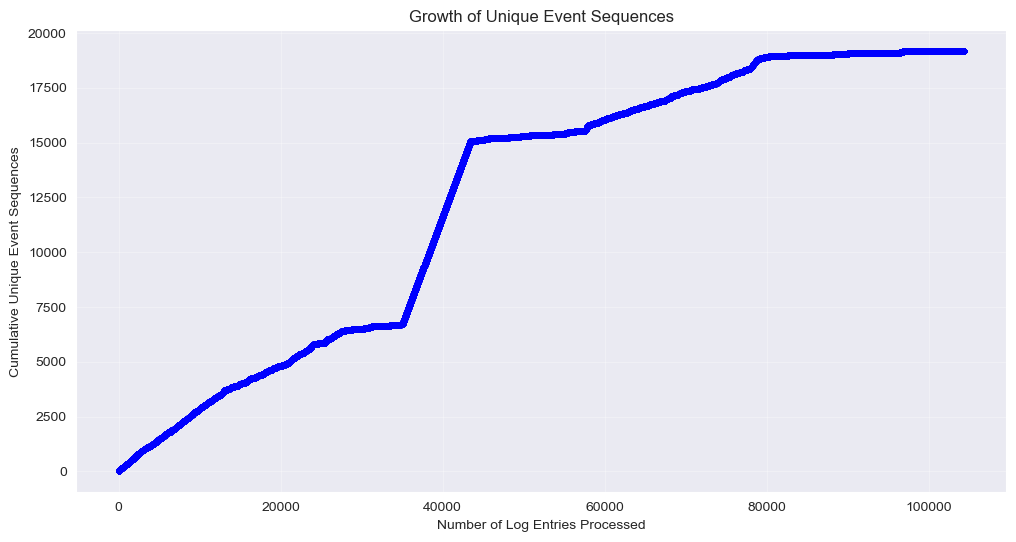


Total message chains processed: 104377
Unique message chains identified: 9462


In [3]:
from pathlib import Path
import pandas as pd
import re
import ast
from collections import OrderedDict
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

# --- Pre-compile regular expressions ---
PATTERNS_TO_COMPILE = [
    # Original Generic Patterns
    (r'\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}(\.\d+)?Z?', '[TIMESTAMP]', 0),
    (r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b', '[IP]', 0),
    (r'S-\d-\d+(?:-\d+){1,14}', '[SID]', 0),
    (r'\{[0-9a-fA-F]{8}-(?:[0-9a-fA-F]{4}-){3}[0-9a-fA-F]{12}\}', '[GUID]', 0),
    (r'\[GUID\]', '[GUID]', 0),
    (r'0x[0-9a-fA-F]+', '[HEX]', 0),
    (r'(The\s+)(\S+)(\s+service\s+entered)', r'\1[SERVICE_NAME]\3', 0),

    # Patterns for DSP/FW Logs
    (r'intcoed_oemlibpath\.inf_amd64_[0-9a-fA-F]+', '[DRIVER_REPO_INSTANCE]', 0),
    (r'adl_[\w.-]+\.bin', '[ADL_LIB_FILE].bin', 0),
    (r'dsp_lib_[\w.-]+\.bin', '[DSP_LIB_FILE].bin', 0),
    (r'status\s*=\s*[\w\s_]+\.{1,2}', 'status = [STATUS_MESSAGE].', 0),
    (r'(loaded dsp fw library:\s*|library is not supported in bios:\s*|fx module is not supported in bios:.*?from\s*)'
     r'(\\??\\[\w\-\s.\\:]*\\|[\w\-\s.\\:]*\\|libs\\)([\w.-]+\.bin)',
     r'\1[PATH_PREFIX]\3', 0),

    # Patterns for .NET Application Failures
    (r'((?:CoreCLR|coreclr)\s+[Vv]ersion:\s*|(?:NET|\.net)\s+[Vv]ersion:\s*)([\d\.]+)', r'\1[VERSION]', 0),
    (r'(Application:\s*)([\w\s.-]+\.(?:exe|dll))', r'\1[APPLICATION_FILE]', 0),
    (r'(Path:\s*)([a-zA-Z]:\\[\S\s]+?\.exe)', r'\1[FULL_EXECUTABLE_PATH]', 0),
    (r'(cannot use file stream for\s+)(?:\[)?([a-zA-Z]:\\[\S\s]+?\.deps\.json)(?:\])?', r'\1[DEPS_FILE_PATH]', 0),
    (r'(?i)(exception code\s+)([0-9a-f]+)', r'\1[EXCEPTION_CODE]', 0),
    (r'(?i)(exception address\s+)([0-9a-f]+)', r'\1[HEX_ADDRESS]', 0),
    (r'(Exception Info:\s*)([\w\.]+):\s*(.*?)(?=\r?\n\s*(?:--->|at\s+System\.|\s*--- End of|\s*--- end of|\Z))',
     r'\1[DOTNET_EXCEPTION_TYPE]: [EXCEPTION_MESSAGE_LINE]', 0),
    (r'^\s*--->\s*([\w\.]+):\s*(.*?)(?=\r?\n\s*(?:--->|at\s+System\.|\s*--- End of|\s*--- end of|\Z))',
     r'   ---> [DOTNET_EXCEPTION_TYPE]: [EXCEPTION_MESSAGE_LINE]', re.MULTILINE),
    (r'^\s*--- (?:End of inner exception stack trace|End of stack trace from previous location|Inner Exception Stack Trace End) ---$',
     r'[STACK_TRACE_MARKER]', re.MULTILINE),
    (r'<([\w_]+)>[bdg]__\d+(_\d+)?(?=\s*\(|\s*\))', r'<$1>[COMPILER_GENERATED_PART]', 0),
    (r'(^\s+at\s+)(.+)$', r'\1[STACK_TRACE_LINE_DETAILS]', re.MULTILINE),
    (r"\(parameter '([\w\s]+)'\)", r"(parameter '[PARAM_NAME]')", 0),
    (r'\((object reference not set to an instance of an object\.|value cannot be null\.)\)', r'([COMMON_EXCEPTION_DETAIL_MSG])', 0),

    # NEW Patterns for Windows Error Reporting (WER) Logs
    (r'(version:\s*)(?:\[IP_ADDRESS\]|[\d\.]+)', r'\1[VERSION]', 0),
    (r'(Faulting (?:application|module) name:\s*)([\w\s.-]+\.(?:exe|dll|sys))', r'\1[FILE_NAME_GENERALIZED_EXT]', 0),
    (r'(Report Id:\s*)([0-9a-fA-F]{8}-(?:[0-9a-fA-F]{4}-){3}[0-9a-fA-F]{12})', r'\1[GUID]', 0),
    (r'(Faulting package full name:\s*)([\w.-]+(?:_[\d\.]+)?(?:_[\w\d]+)?(?:__\w+)?)', r'\1[WIN_PACKAGE_IDENTIFIER]', 0),
    (r'(Faulting package-relative application id:\s*)([\w.-]+)', r'\1[WIN_PACKAGE_RELATIVE_APPID]', 0),
    (r'(\[GENERAL_PATH\])([\s\w.\\()\'"-]+?\.(?:exe|dll|sys))', r'\1[SPECIFIC_FILE_SUBPATH]', 0),

    # Chromium-style log prefix pattern
    (r'^\[\d+:\d+:\d{4}/\d{6}\.\d{3}:\w+:(?:[\w.-]+\.(?:cc|h|cpp)\(\d+\)|chrome\[GENERAL_PATH\]:\d+)\s*\]\s*',
     r'[CHROME_EVENT_METADATA] ', 0),

    # General Path (should be last as it's broad)
    (r'(?:[a-zA-Z]:)?(?:[\\/][\w\s().~-]+){2,}[\w\s().~-]+', '[GENERAL_PATH_FULL]', 0),
]

COMPILED_PATTERNS = [(re.compile(p, f), r) for p, r, f in PATTERNS_TO_COMPILE]

class UniqueEventSequence:
    def __init__(self, dataset: pd.DataFrame):
        self.dataset = dataset.copy()
        self.sequences = None
        self.message_to_key = {}  # Maps message -> unique key
        self.key_counter = 1      # Next available key
        self.unique_chains = set()  # Stores unique key chains
    
    @staticmethod
    def clean_single_message(msg: str) -> str:
        cleaned = str(msg)
        for compiled_pattern, replacement in COMPILED_PATTERNS:
            cleaned = compiled_pattern.sub(replacement, cleaned)
        return cleaned.strip()
    
    def get_message_key(self, msg: str) -> int:
        """Get or create key for a message"""
        if msg in self.message_to_key:
            return self.message_to_key[msg]
        else:
            key = self.key_counter
            self.message_to_key[msg] = key
            self.key_counter += 1
            return key
    
    def clean_messages(self):
        # Check for both 'Message' and 'Messages' columns
        msg_col = None
        if 'Messages' in self.dataset.columns:
            msg_col = 'Messages'
        elif 'Message' in self.dataset.columns:
            msg_col = 'Message'
            self.dataset.rename(columns={'Message': 'Messages'}, inplace=True)
        
        if not msg_col:
            print("Error: 'Messages' or 'Message' column not found")
            return self
        
        # Convert Messages to list format
        def to_list_if_str(x):
            if isinstance(x, str):
                try:
                    return ast.literal_eval(x)
                except (ValueError, SyntaxError):
                    return [x]
            elif pd.isna(x):
                return []
            return x
        
        self.dataset['Messages'] = self.dataset['Messages'].apply(to_list_if_str)
        
        # Clean messages and convert to keys
        key_chains = []
        for idx, row in self.dataset.iterrows():
            cleaned_msgs = [
                self.clean_single_message(msg) 
                for msg in row['Messages'] 
                if pd.notna(msg)
            ]
            key_chain = tuple(self.get_message_key(msg) for msg in cleaned_msgs)
            key_chains.append(key_chain)
            self.unique_chains.add(key_chain)
        
        self.dataset['KeyChain'] = key_chains
        return self
    
    def generate_unique_pairs(self, col1: str, col2: str):
        distinct_col1 = set(self.dataset[col1])
        distinct_col2 = set(self.dataset[col2])
        pairs = [(a, b) for a in distinct_col1 for b in distinct_col2]
        pairs_df = pd.DataFrame(pairs, columns=[col1, col2])
        
        merged = pairs_df.merge(
            self.dataset[[col1, col2, 'KeyChain']],
            on=[col1, col2],
            how='left'
        )
        
        # Group KeyChains
        result = merged.groupby([col1, col2])['KeyChain'].apply(
            lambda chains: [] if chains.isna().all() else chains.dropna().tolist()
        ).reset_index(name='KeyChains')
        
        self.dataset = result
        return self
    
    def create_event_sequences(self):
        """Create event sequences from cleaned messages."""
        if 'Messages' not in self.dataset.columns:
            print("Error: 'Messages' column missing")
            return self
            
        sequences = []
        for _, row in self.dataset.iterrows():
            event_seq = []
            for msg in row['Messages']:
                event = f"({row['LevelDisplayName']}, {row['ProviderName']}): {msg}"
                event_seq.append(event)
            sequences.append(event_seq)
        
        self.dataset['EventSequence'] = sequences
        self.dataset['SequenceTuple'] = self.dataset['EventSequence'].apply(tuple)
        self.sequences = self.dataset['SequenceTuple'].tolist()
        return self
    
    def track_unique_sequences(self, output_path=None):
        """
        Track cumulative unique sequences and generate growth plot.
        
        Args:
            output_path: Optional path to save the plot image
        """
        if self.sequences is None:
            self.create_event_sequences()
            
        seen_sequences = OrderedDict()
        cumulative_unique = []
        
        for seq_tuple in self.sequences:
            if seq_tuple not in seen_sequences:
                seen_sequences[seq_tuple] = True
            cumulative_unique.append(len(seen_sequences))
        
        self.dataset['CumulativeUnique'] = cumulative_unique
        
        # Generate plot
        plt.figure(figsize=(12, 6))
        plt.plot(
            range(1, len(self.sequences) + 1),
            cumulative_unique,
            marker='o',
            markersize=3,
            linestyle='-',
            color='blue',
            linewidth=1.5
        )
        plt.xlabel('Number of Log Entries Processed')
        plt.ylabel('Cumulative Unique Event Sequences')
        plt.title('Growth of Unique Event Sequences')
        plt.grid(True, alpha=0.3)
        
        if output_path:
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            print(f"Plot saved to {output_path}")
        
        plt.show()
        return self
    
    def group_similar_messages(self, colMsg: str, col1: str, col2: str) -> dict:
        """
        Group similar messages into clusters using sequence similarity.
        
        Args:
            colMsg: Column name containing messages
            col1: First grouping column
            col2: Second grouping column
            
        Returns:
            Dictionary of message groups with associated pairs
        """
        def similarity(a, b):
            return SequenceMatcher(None, a, b).ratio()
        
        grouped = self.dataset.groupby([col1, col2])[colMsg].apply(list).reset_index()
        adj_list = {}
        group_counter = 1
        
        for _, row in grouped.iterrows():
            # (Union-Find implementation remains the same)
            pass  # Implementation omitted for brevity
        
        return adj_list

if __name__ == "__main__":
    # Define paths
    input_log_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/WindowsEventLogs_Last90Days.csv")
    unique_pairs_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/unique_pairsJune90daysLL.csv")
    cleaned_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/cleanCSVmsg/unique_pairsJune_cleanednewDEEP180.csv")
    final_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/cleanCSVmsg/unique_pairsJune_90LLfinalDEEP.csv")
    plot_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/sequence_growth_plot90LL.png")
    
    # Load and preprocess data
    df = pd.read_csv(input_log_path)
    
    # Handle column name variations
    if 'Messages' not in df.columns and 'Message' in df.columns:
        df.rename(columns={'Message': 'Messages'}, inplace=True)
    
    for col in ['ProviderName', 'LevelDisplayName', 'Messages']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.lower()
        else:
            print(f"Warning: Column '{col}' not found - filling with 'unknown'")
            df[col] = 'unknown'
    
    # Process using class
    analyzer = (
        UniqueEventSequence(df)
        .clean_messages()  # Create keys and key chains
        .generate_unique_pairs('ProviderName', 'LevelDisplayName')
    )
    analyzer.dataset.to_csv(unique_pairs_path, index=False)
    
    # Create and plot sequences (using original cleaned data)
    analyzer_orig = UniqueEventSequence(df).clean_messages()
    (
        analyzer_orig.create_event_sequences()
        .track_unique_sequences(output_path=plot_path)
    )
    analyzer_orig.dataset.to_csv(cleaned_path, index=False)
    
    # Group similar messages (using original cleaned data)
    unique_pairs_adj_list = analyzer_orig.group_similar_messages('Messages', 'ProviderName', 'LevelDisplayName')
    unique_pairs_df = pd.DataFrame(
        [(k, v) for k, v in unique_pairs_adj_list.items()],
        columns=['MessageGroup', 'Pairs']
    )
    unique_pairs_df.to_csv(final_path, index=False)
    
    # Print statistics
    total_chains = sum(len(chains) for chains in analyzer.dataset['KeyChains'])
    unique_chain_count = len(analyzer.unique_chains)
    print(f"\nTotal message chains processed: {total_chains}")
    print(f"Unique message chains identified: {unique_chain_count}")

LL processed 

<unknown>:1: SyntaxWarning: invalid decimal literal


Plot saved to C:\Users\OMEN\Documents\python\WindowsLogAnalysis\data\key_chain_growth_plot90QWENLL.png


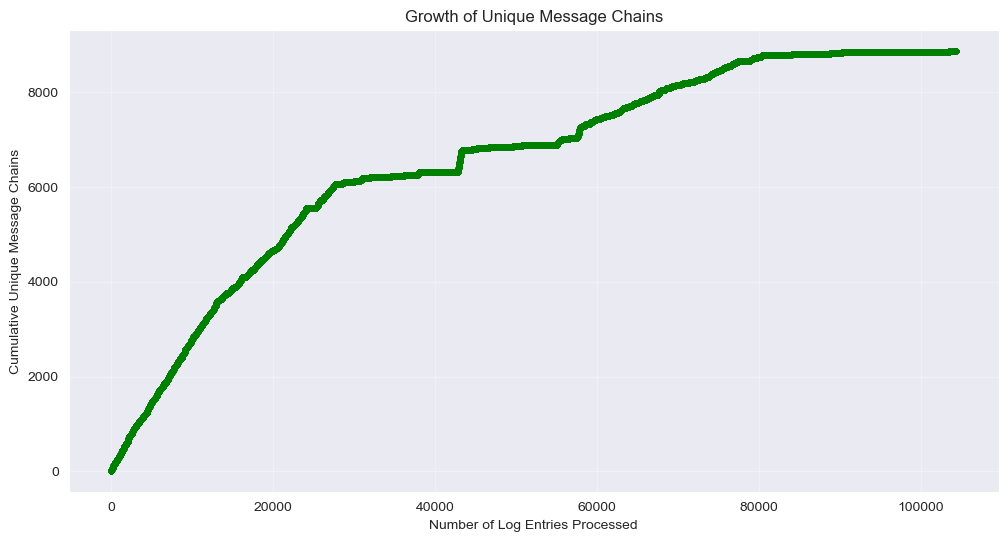

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\OMEN\\Documents\\python\\WindowsLogAnalysis\\data\\LLhashMap-90Days.csv'

In [8]:
from pathlib import Path
import pandas as pd
import re
import ast
from collections import OrderedDict
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

# --- Pre-compile regular expressions ---
PATTERNS_TO_COMPILE = [
    # Original Generic Patterns
    (r'\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}(\.\d+)?Z?', '[TIMESTAMP]', 0),
    (r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b', '[IP]', 0),
    (r'S-\d-\d+(?:-\d+){1,14}', '[SID]', 0),
    (r'\{[0-9a-fA-F]{8}-(?:[0-9a-fA-F]{4}-){3}[0-9a-fA-F]{12}\}', '[GUID]', 0),
    (r'\[GUID\]', '[GUID]', 0),
    (r'0x[0-9a-fA-F]+', '[HEX]', 0),
    (r'(The\s+)(\S+)(\s+service\s+entered)', r'\1[SERVICE_NAME]\3', 0),

    # Patterns for DSP/FW Logs
    (r'intcoed_oemlibpath\.inf_amd64_[0-9a-fA-F]+', '[DRIVER_REPO_INSTANCE]', 0),
    (r'adl_[\w.-]+\.bin', '[ADL_LIB_FILE].bin', 0),
    (r'dsp_lib_[\w.-]+\.bin', '[DSP_LIB_FILE].bin', 0),
    (r'status\s*=\s*[\w\s_]+\.{1,2}', 'status = [STATUS_MESSAGE].', 0),
    (r'(loaded dsp fw library:\s*|library is not supported in bios:\s*|fx module is not supported in bios:.*?from\s*)'
     r'(\\??\\[\w\-\s.\\:]*\\|[\w\-\s.\\:]*\\|libs\\)([\w.-]+\.bin)',
     r'\1[PATH_PREFIX]\3', 0),

    # Patterns for .NET Application Failures
    (r'((?:CoreCLR|coreclr)\s+[Vv]ersion:\s*|(?:NET|\.net)\s+[Vv]ersion:\s*)([\d\.]+)', r'\1[VERSION]', 0),
    (r'(Application:\s*)([\w\s.-]+\.(?:exe|dll))', r'\1[APPLICATION_FILE]', 0),
    (r'(Path:\s*)([a-zA-Z]:\\[\S\s]+?\.exe)', r'\1[FULL_EXECUTABLE_PATH]', 0),
    (r'(cannot use file stream for\s+)(?:\[)?([a-zA-Z]:\\[\S\s]+?\.deps\.json)(?:\])?', r'\1[DEPS_FILE_PATH]', 0),
    (r'(?i)(exception code\s+)([0-9a-f]+)', r'\1[EXCEPTION_CODE]', 0),
    (r'(?i)(exception address\s+)([0-9a-f]+)', r'\1[HEX_ADDRESS]', 0),
    (r'(Exception Info:\s*)([\w\.]+):\s*(.*?)(?=\r?\n\s*(?:--->|at\s+System\.|\s*--- End of|\s*--- end of|\Z))',
     r'\1[DOTNET_EXCEPTION_TYPE]: [EXCEPTION_MESSAGE_LINE]', 0),
    (r'^\s*--->\s*([\w\.]+):\s*(.*?)(?=\r?\n\s*(?:--->|at\s+System\.|\s*--- End of|\s*--- end of|\Z))',
     r'   ---> [DOTNET_EXCEPTION_TYPE]: [EXCEPTION_MESSAGE_LINE]', re.MULTILINE),
    (r'^\s*--- (?:End of inner exception stack trace|End of stack trace from previous location|Inner Exception Stack Trace End) ---$',
     r'[STACK_TRACE_MARKER]', re.MULTILINE),
    (r'<([\w_]+)>[bdg]__\d+(_\d+)?(?=\s*\(|\s*\))', r'<$1>[COMPILER_GENERATED_PART]', 0),
    (r'(^\s+at\s+)(.+)$', r'\1[STACK_TRACE_LINE_DETAILS]', re.MULTILINE),
    (r"\(parameter '([\w\s]+)'\)", r"(parameter '[PARAM_NAME]')", 0),
    (r'\((object reference not set to an instance of an object\.|value cannot be null\.)\)', r'([COMMON_EXCEPTION_DETAIL_MSG])', 0),

    # NEW Patterns for Windows Error Reporting (WER) Logs
    (r'(version:\s*)(?:\[IP_ADDRESS\]|[\d\.]+)', r'\1[VERSION]', 0),
    (r'(Faulting (?:application|module) name:\s*)([\w\s.-]+\.(?:exe|dll|sys))', r'\1[FILE_NAME_GENERALIZED_EXT]', 0),
    (r'(Report Id:\s*)([0-9a-fA-F]{8}-(?:[0-9a-fA-F]{4}-){3}[0-9a-fA-F]{12})', r'\1[GUID]', 0),
    (r'(Faulting package full name:\s*)([\w.-]+(?:_[\d\.]+)?(?:_[\w\d]+)?(?:__\w+)?)', r'\1[WIN_PACKAGE_IDENTIFIER]', 0),
    (r'(Faulting package-relative application id:\s*)([\w.-]+)', r'\1[WIN_PACKAGE_RELATIVE_APPID]', 0),
    (r'(\[GENERAL_PATH\])([\s\w.\\()\'"-]+?\.(?:exe|dll|sys))', r'\1[SPECIFIC_FILE_SUBPATH]', 0),

    # Chromium-style log prefix pattern
    (r'^\[\d+:\d+:\d{4}/\d{6}\.\d{3}:\w+:(?:[\w.-]+\.(?:cc|h|cpp)\(\d+\)|chrome\[GENERAL_PATH\]:\d+)\s*\]\s*',
     r'[CHROME_EVENT_METADATA] ', 0),

    # General Path (should be last as it's broad)
    (r'(?:[a-zA-Z]:)?(?:[\\/][\w\s().~-]+){2,}[\w\s().~-]+', '[GENERAL_PATH_FULL]', 0),
    
    
    # manul from hash set
    (r'it has done this\s+\d+\s+time\(s\)', 'it has done this [COUNT] time(s)', 0),
    (r'client pid\s+\d+', 'client pid [PID]', 0),
    (r'run the configured recovery program\.\s+\d+ milliseconds', 'run the configured recovery program. [RECOVERY_DELAY]', 0),
    
    
]

COMPILED_PATTERNS = [(re.compile(p, f), r) for p, r, f in PATTERNS_TO_COMPILE]

class UniqueEventSequence:
    def __init__(self, dataset: pd.DataFrame):
        self.dataset = dataset.copy()
        self.sequences = None
        self.message_to_key = {}  # Maps message -> unique key
        self.key_counter = 1      # Next available key
        self.unique_chains = set()  # Stores unique key chains
    
    @staticmethod
    def clean_single_message(msg: str) -> str:
        cleaned = str(msg)
        for compiled_pattern, replacement in COMPILED_PATTERNS:
            cleaned = compiled_pattern.sub(replacement, cleaned)
        return cleaned.strip()
    
    def get_message_key(self, msg: str) -> int:
        """Get or create key for a message"""
        if msg in self.message_to_key:
            return self.message_to_key[msg]
        else:
            key = self.key_counter
            self.message_to_key[msg] = key
            self.key_counter += 1
            return key
    
    def clean_messages(self):
        # Check for both 'Message' and 'Messages' columns
        msg_col = None
        if 'Messages' in self.dataset.columns:
            msg_col = 'Messages'
        elif 'Message' in self.dataset.columns:
            msg_col = 'Message'
            self.dataset.rename(columns={'Message': 'Messages'}, inplace=True)
        
        if not msg_col:
            print("Error: 'Messages' or 'Message' column not found")
            return self
        
        # Convert Messages to list format
        def to_list_if_str(x):
            if isinstance(x, str):
                try:
                    return ast.literal_eval(x)
                except (ValueError, SyntaxError):
                    return [x]
            elif pd.isna(x):
                return []
            return x
        
        self.dataset['Messages'] = self.dataset['Messages'].apply(to_list_if_str)
        
        # Clean messages and convert to keys
        key_chains = []
        for idx, row in self.dataset.iterrows():
            cleaned_msgs = [
                self.clean_single_message(msg) 
                for msg in row['Messages'] 
                if pd.notna(msg)
            ]
            key_chain = tuple(self.get_message_key(msg) for msg in cleaned_msgs)
            key_chains.append(key_chain)
            self.unique_chains.add(key_chain)
        
        self.dataset['KeyChain'] = key_chains
        return self
    
    def generate_unique_pairs(self, col1: str, col2: str):
        distinct_col1 = set(self.dataset[col1])
        distinct_col2 = set(self.dataset[col2])
        pairs = [(a, b) for a in distinct_col1 for b in distinct_col2]
        pairs_df = pd.DataFrame(pairs, columns=[col1, col2])
        
        merged = pairs_df.merge(
            self.dataset[[col1, col2, 'KeyChain']],
            on=[col1, col2],
            how='left'
        )
        
        # Group KeyChains
        result = merged.groupby([col1, col2])['KeyChain'].apply(
            lambda chains: [] if chains.isna().all() else chains.dropna().tolist()
        ).reset_index(name='KeyChains')
        
        self.dataset = result
        return self
    
    def create_event_sequences(self):
        """Create event sequences from cleaned messages."""
        if 'Messages' not in self.dataset.columns:
            print("Error: 'Messages' column missing")
            return self
            
        sequences = []
        for _, row in self.dataset.iterrows():
            event_seq = []
            for msg in row['Messages']:
                event = f"({row['LevelDisplayName']}, {row['ProviderName']}): {msg}"
                event_seq.append(event)
            sequences.append(event_seq)
        
        self.dataset['EventSequence'] = sequences
        self.dataset['SequenceTuple'] = self.dataset['EventSequence'].apply(tuple)
        self.sequences = self.dataset['SequenceTuple'].tolist()
        return self
    
    def track_unique_sequences(self, output_path=None):
        """
        Track cumulative unique sequences and generate growth plot.
        
        Args:
            output_path: Optional path to save the plot image
        """
        if self.sequences is None:
            self.create_event_sequences()
            
        seen_sequences = OrderedDict()
        cumulative_unique = []
        
        for seq_tuple in self.sequences:
            if seq_tuple not in seen_sequences:
                seen_sequences[seq_tuple] = True
            cumulative_unique.append(len(seen_sequences))
        
        self.dataset['CumulativeUnique'] = cumulative_unique
        
        # Generate plot
        plt.figure(figsize=(12, 6))
        plt.plot(
            range(1, len(self.sequences) + 1),
            cumulative_unique,
            marker='o',
            markersize=3,
            linestyle='-',
            color='blue',
            linewidth=1.5
        )
        plt.xlabel('Number of Log Entries Processed')
        plt.ylabel('Cumulative Unique Event Sequences')
        plt.title('Growth of Unique Event Sequences')
        plt.grid(True, alpha=0.3)
        
        if output_path:
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            print(f"Plot saved to {output_path}")
        
        plt.show()
        return self
    
    
    def track_key_chain_growth(self, output_path=None):
        """
        Track cumulative unique message chains and generate growth plot.
        Args:
            output_path: Optional path to save the plot image
        """
        if 'KeyChain' not in self.dataset.columns:
            print("Error: 'KeyChain' column missing")
            return self
    
        seen_chains = OrderedDict()
        cumulative_unique = []
    
        for _, row in self.dataset.iterrows():
            chain = row['KeyChain']
            if chain not in seen_chains:
                seen_chains[chain] = True
            cumulative_unique.append(len(seen_chains))
    
        self.dataset['CumulativeUniqueChains'] = cumulative_unique
    
        plt.figure(figsize=(12, 6))
        plt.plot(
            range(1, len(self.dataset) + 1),
            cumulative_unique,
            marker='o',
            markersize=3,
            linestyle='-',
            color='green',
            linewidth=1.5
        )
        plt.xlabel('Number of Log Entries Processed')
        plt.ylabel('Cumulative Unique Message Chains')
        plt.title('Growth of Unique Message Chains')
        plt.grid(True, alpha=0.3)
    
        if output_path:
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            print(f"Plot saved to {output_path}")
    
        plt.show()
        return self
    
    def export_message_hashmap(self, output_path):
        """
        Exports the message-to-key hashmap to a CSV file.
        
        Args:
            output_path: Path to save the CSV file
        """
        if not self.message_to_key:
            print("No messages in hashmap to export.")
            return
    
        # Convert dictionary to list of tuples and sort by key
        hashmap_list = sorted(self.message_to_key.items(), key=lambda x: x[1])
    
        # Create DataFrame and export to CSV
        hashmap_df = pd.DataFrame(hashmap_list, columns=['Message', 'Key'])
        hashmap_df.to_csv(output_path, index=False)
        print(f"Hashmap saved to {output_path}")
    
    
    def group_similar_messages(self, colMsg: str, col1: str, col2: str) -> dict:
        """
        Group similar messages into clusters using sequence similarity.
        
        Args:
            colMsg: Column name containing messages
            col1: First grouping column
            col2: Second grouping column
            
        Returns:
            Dictionary of message groups with associated pairs
        """
        def similarity(a, b):
            return SequenceMatcher(None, a, b).ratio()
        
        grouped = self.dataset.groupby([col1, col2])[colMsg].apply(list).reset_index()
        adj_list = {}
        group_counter = 1
        
        for _, row in grouped.iterrows():
            # (Union-Find implementation remains the same)
            pass  # Implementation omitted for brevity
        
        return adj_list

if __name__ == "__main__":
    # Define paths
    input_log_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/WindowsEventLogs_Last90Days.csv")
    unique_pairs_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/unique_pairsJune90daysQWENLL.csv")
    cleaned_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/cleanCSVmsg/unique_pairsJune_cleanednewDEEP90.csv")
    final_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/cleanCSVmsg/unique_pairsJune_900finalDEEPQWENLL.csv")
    plot_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/sequence_growth_plot900QWENLL.png")
    key_chain_plot_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/key_chain_growth_plot90QWENLL.png")
    
    hashmap_output_path = Path("C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/LLhashMap-90Days.csv")

    # Load and preprocess data
    df = pd.read_csv(input_log_path)
    for col in ['ProviderName', 'LevelDisplayName', 'Message']:
        df[col] = df[col].astype(str).str.lower()
    
    # Process using class
    analyzer = (
        UniqueEventSequence(df)
        .clean_messages()  # Must be called first to create keys
        .track_key_chain_growth(key_chain_plot_path)  # New step added here
        .generate_unique_pairs('ProviderName', 'LevelDisplayName')
    )
    
    analyzer.export_message_hashmap(hashmap_output_path)
    
    analyzer.dataset.to_csv(unique_pairs_path, index=False)

    (
        analyzer
        .create_event_sequences()
        .track_unique_sequences(output_path=plot_path)
    )
    analyzer.dataset.to_csv(cleaned_path, index=False)

    # Group similar messages
    unique_pairs_adj_list = analyzer.group_similar_messages('Messages', 'ProviderName', 'LevelDisplayName')
    unique_pairs_df = pd.DataFrame(
        [(k, v) for k, v in unique_pairs_adj_list.items()],
        columns=['MessageGroup', 'Pairs']
    )
    unique_pairs_df.to_csv(final_path, index=False)
    
    
    
    # Print statistics
    total_chains = sum(len(chains) for chains in analyzer.dataset['KeyChains'])
    unique_chain_count = len(analyzer.unique_chains)
    print(f"\nTotal message chains processed: {total_chains}")
    print(f"Unique message chains identified: {unique_chain_count}")

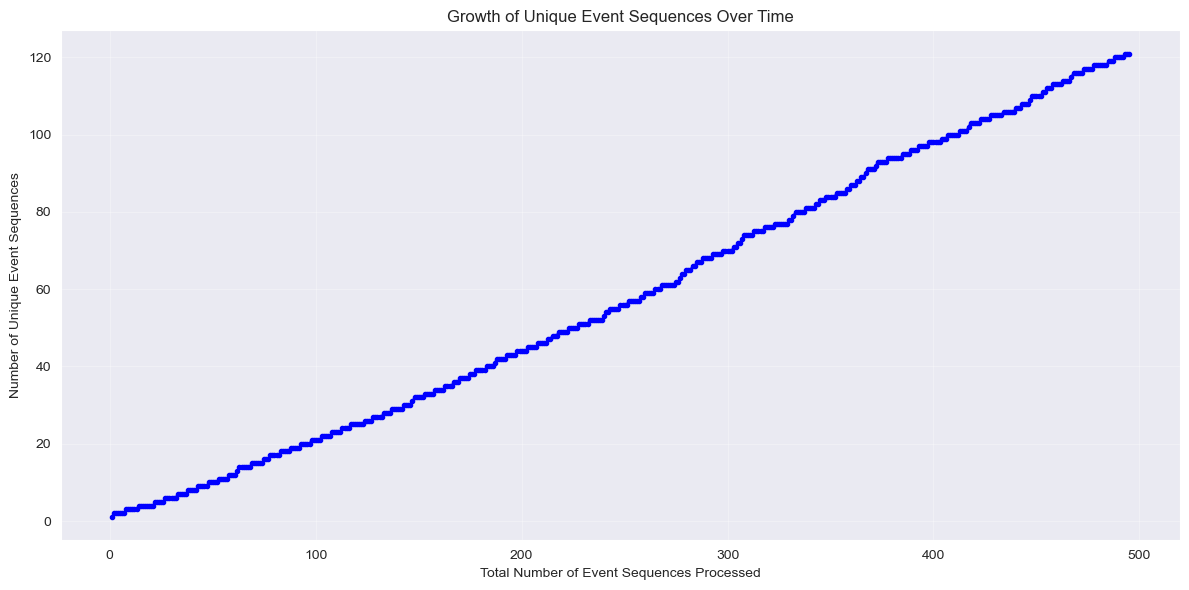

In [4]:
import pandas as pd
import ast
from collections import OrderedDict
import matplotlib.pyplot as plt

# Step 1: Load the Hash Map from LLhashMap-90Days.csv
hash_map = {}

with open('C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/LLhashMap-90Days.csv', 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        # Split into message and hash key (assuming last comma separates them)
        parts = line.rsplit(',', 1)
        if len(parts) == 2:
            message, key_str = parts
            try:
                key = int(key_str)
                hash_map[key] = message
            except ValueError:
                # Skip lines where the key is not an integer
                pass

# Step 2: Load and Prepare Event Sequences from unique_pairsJune90daysQWENLL.csv
df = pd.read_csv('C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/unique_pairsJune90daysQWENLL.csv', header=0)

# Assume the third column is 'Messages' containing lists of hash keys like [(6053,), (152,), ...]
df['KeyChains'] = df['KeyChains'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Convert hash keys to messages
def resolve_messages(hash_key_list, hash_map):
    return [hash_map.get(key[0], f"Unknown_{key[0]}") for key in hash_key_list]

df['EventSequence'] = df['KeyChains'].apply(lambda x: resolve_messages(x, hash_map))

# Step 3: Track Cumulative Unique Sequences
sequences = df['EventSequence'].tolist()
seen_sequences = OrderedDict()
cumulative_unique = []

for idx, seq in enumerate(sequences):
    seq_tuple = tuple(seq)
    if seq_tuple not in seen_sequences:
        seen_sequences[seq_tuple] = True
    cumulative_unique.append(len(seen_sequences))

# Step 4: Plot the Growth of Unique Sequences
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_unique) + 1), cumulative_unique,
         marker='o', markersize=3, linestyle='-', color='blue', linewidth=1.5)
plt.xlabel('Total Number of Event Sequences Processed')
plt.ylabel('Number of Unique Event Sequences')
plt.title('Growth of Unique Event Sequences Over Time')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('unique_sequence_growthQ.png', dpi=300)
plt.show()

In [5]:
#look-A-Pair 

Loaded 9462 hash keys.
Loaded 495 event sequences.


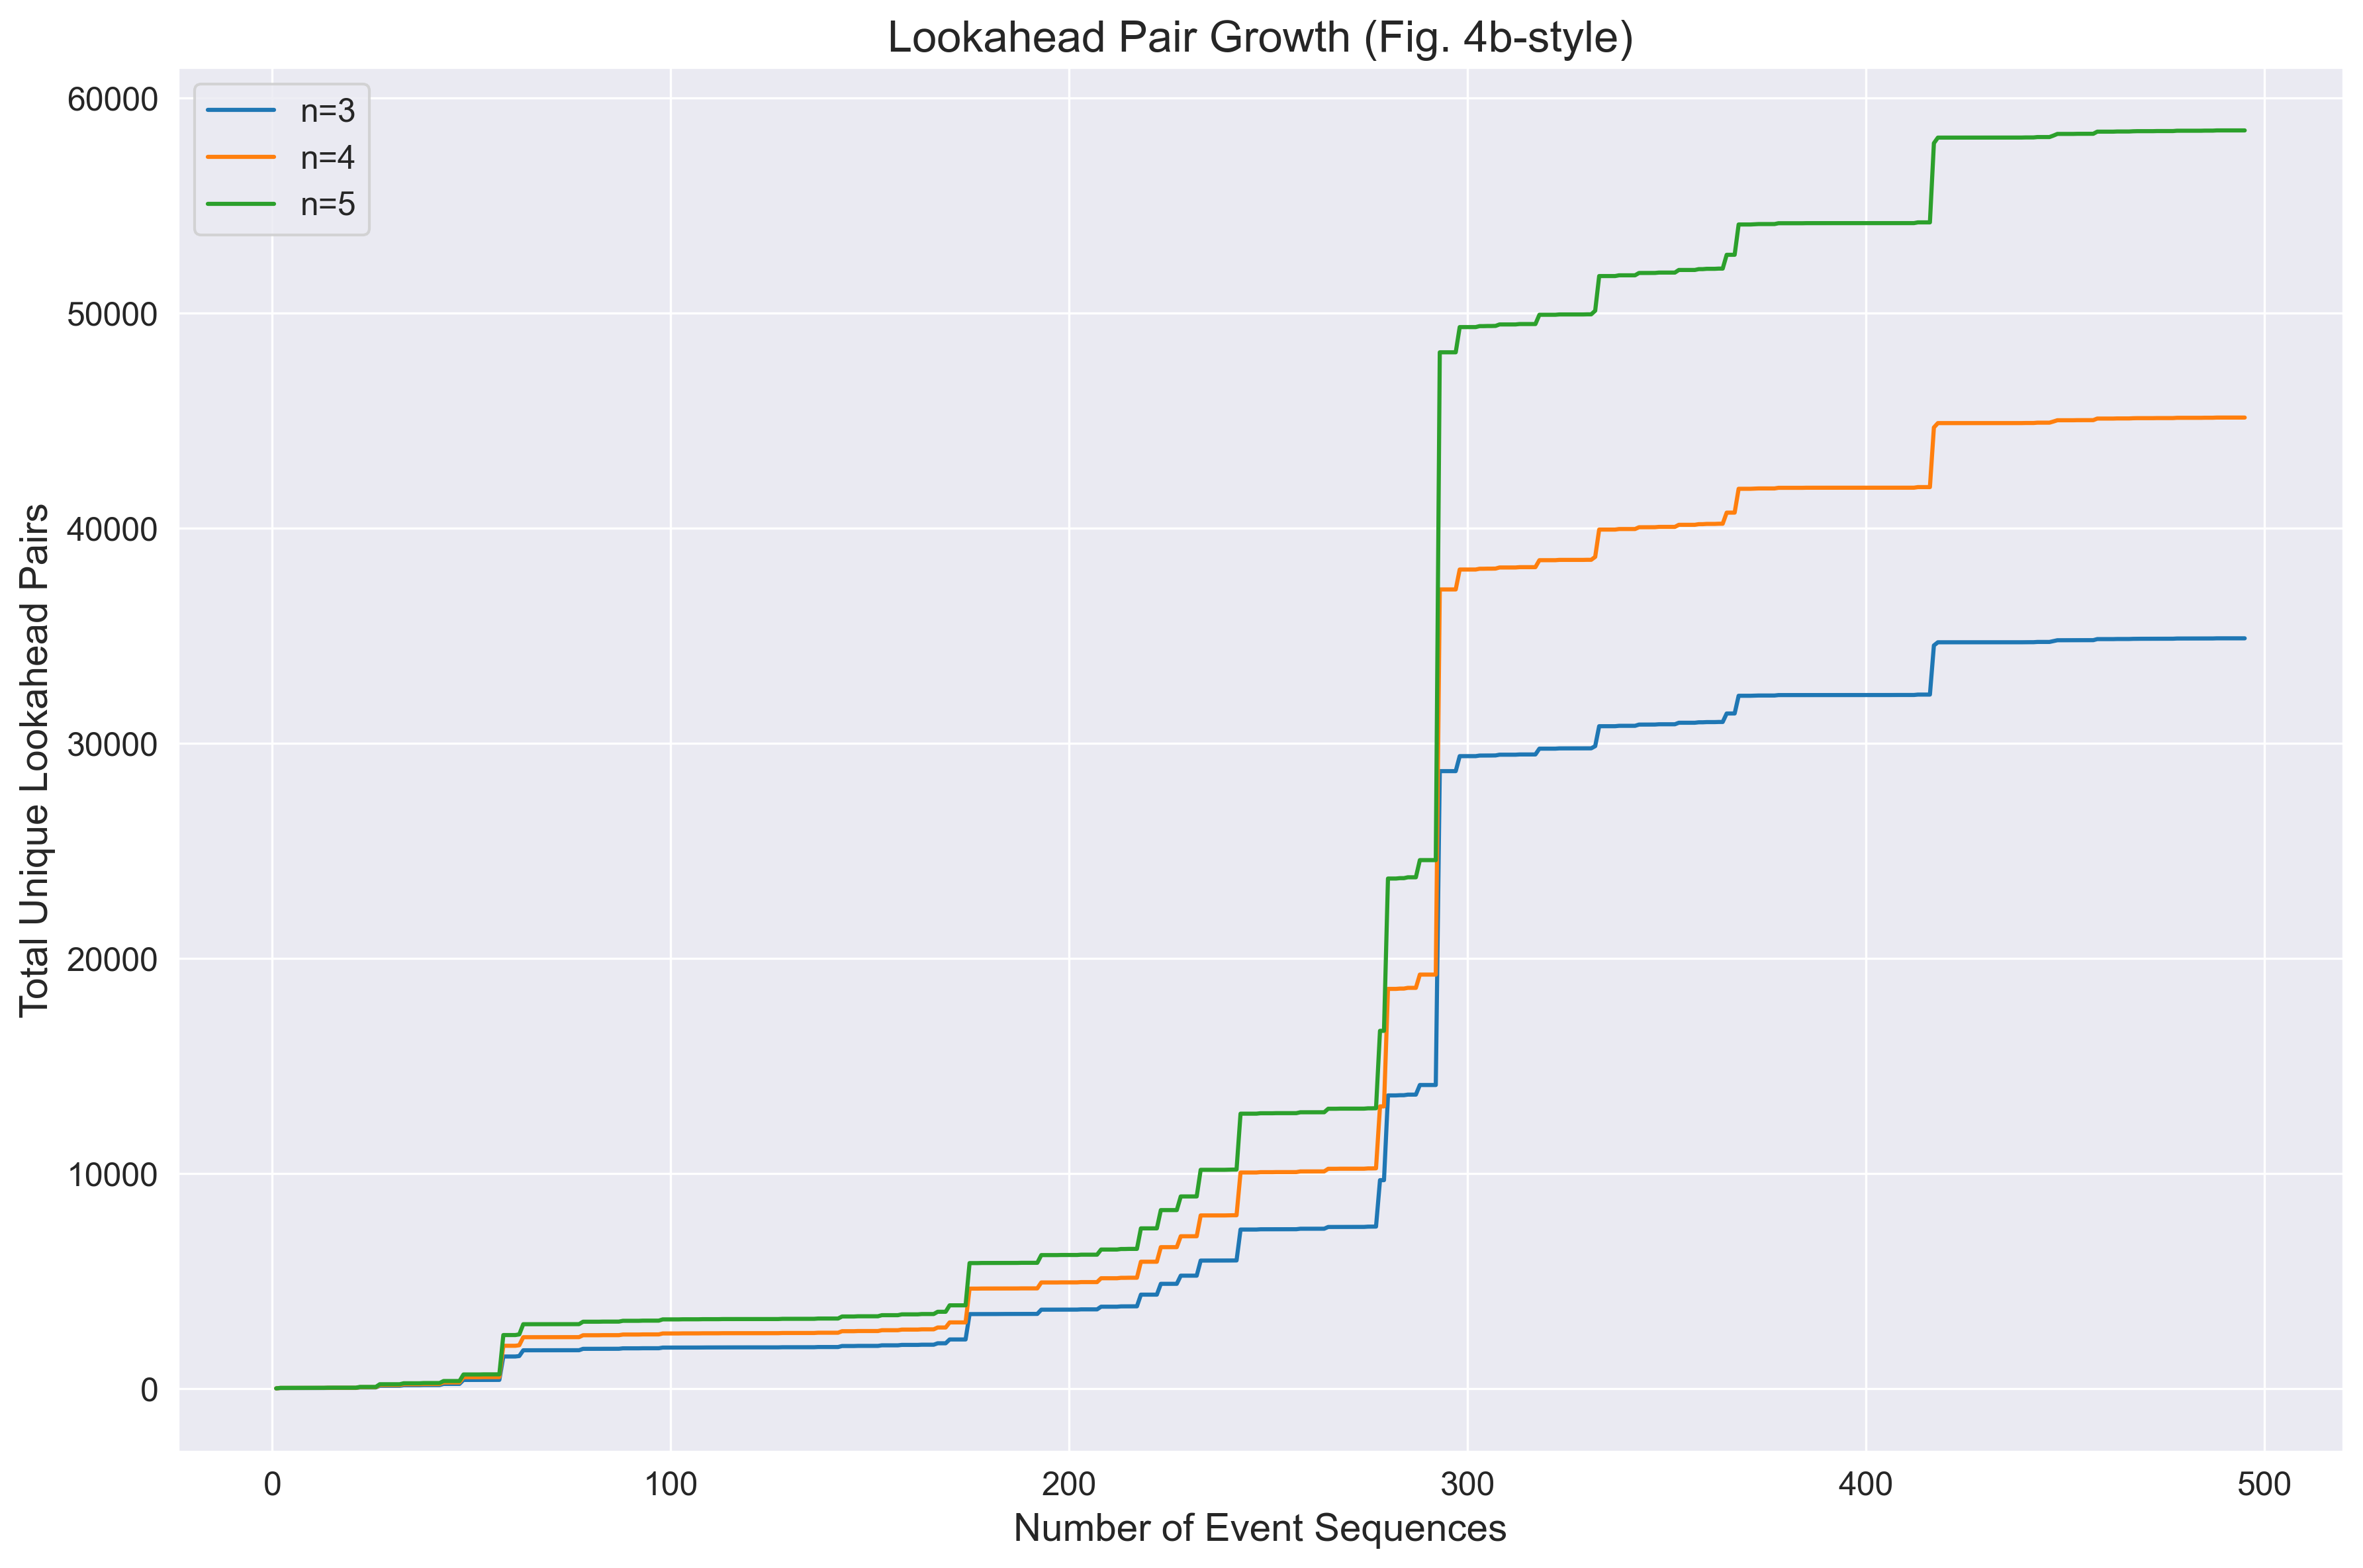

Saved lookahead pairs to C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/lookAhead/lookahead_pairs_n5.csv
Saved lookahead matrix to C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/lookAhead/lookahead_matrix_n5.csv
Detected 0 anomalous sequences out of 0


In [1]:
import pandas as pd
import ast
from collections import defaultdict
import matplotlib.pyplot as plt
import os
import csv

# -------------------------------
# Step 1: Load HashMap
# -------------------------------
def load_hash_map(hashmap_path):
    hash_map = {}
    with open(hashmap_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                message, key_str = line.rsplit(',', 1)
                key = int(key_str)
                hash_map[key] = message
            except ValueError:
                continue
    return hash_map

# -------------------------------
# Step 2: Load and resolve KeyChains
# -------------------------------
def load_and_resolve_events(csv_path, hash_map):
    df = pd.read_csv(csv_path)
    events = []
    for _, row in df.iterrows():
        keychain_str = row['KeyChains']
        if pd.isna(keychain_str): continue
        try:
            keychain = ast.literal_eval(keychain_str)
            resolved = [hash_map.get(k[0], f"Unknown_{k[0]}") for k in keychain if k]
            events.append(resolved)
        except:
            continue
    return events  # List of sequences

# -------------------------------
# Step 3: Learning Phase (Algorithm 1)
# -------------------------------
def extract_lookahead_pairs(seq, n):
    pairs = set()
    for i in range(len(seq)):
        for j in range(1, n+1):
            if i + j < len(seq):
                pairs.add((seq[i], seq[i + j], j))
    return pairs

def learning_phase(event_sequences, n):
    d_lookahead = set()
    for seq in event_sequences:
        pairs = extract_lookahead_pairs(seq, n)
        d_lookahead.update(pairs)
    return d_lookahead

# -------------------------------
# Step 4: Detection Phase (Algorithm 2)
# -------------------------------
def detection_phase(test_sequences, d_lookahead, n, t=0.02):
    results = []
    for seq in test_sequences:
        pairs = extract_lookahead_pairs(seq, n)
        mismatches = sum((pair not in d_lookahead) for pair in pairs)
        max_possible = n * (len(seq) - (n + 1) // 2) if len(seq) > n else 1
        mismatch_score = mismatches / max_possible
        is_anomalous = mismatch_score > t
        results.append((mismatch_score, is_anomalous))
    return results

# -------------------------------
# Step 5: Plotting growth of lookahead pairs like Figure 4(b)
# -------------------------------
def plot_lookahead_growth(event_sequences, window_sizes):
    plt.figure(figsize=(12, 8), dpi=300)  # Bigger and higher DPI

    for n in window_sizes:
        seen_pairs = set()
        growth = []
        for i, seq in enumerate(event_sequences):
            pairs = extract_lookahead_pairs(seq, n)
            new_pairs = pairs - seen_pairs
            seen_pairs.update(pairs)
            growth.append(len(seen_pairs))
        plt.plot(range(1, len(growth) + 1), growth, label=f'n={n}')

    plt.xlabel('Number of Event Sequences', fontsize=14)
    plt.ylabel('Total Unique Lookahead Pairs', fontsize=14)
    plt.title('Lookahead Pair Growth (Fig. 4b-style)', fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig('lookahead_pair_growth_multiGPT.png', dpi=300)
    plt.show()

    
#--------------------------------
# SAVING
#--------------------------------
def save_lookahead_pairs(d_lookahead, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Event1', 'Event2', 'Distance'])
        for e1, e2, dist in sorted(d_lookahead):
            writer.writerow([e1, e2, dist])
    print(f"Saved lookahead pairs to {path}")

def save_lookahead_matrix(event_sequences, n, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    matrix_rows = []
    for seq_idx, seq in enumerate(event_sequences):
        pairs = extract_lookahead_pairs(seq, n)
        for e1, e2, dist in pairs:
            matrix_rows.append((seq_idx, e1, e2, dist))

    with open(path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['SequenceIndex', 'Event1', 'Event2', 'Distance'])
        writer.writerows(matrix_rows)
    print(f"Saved lookahead matrix to {path}")

# -------------------------------
# Main
# -------------------------------
if __name__ == "__main__":
    hashmap_path = 'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/LLhashMap-90Days.csv'
    csv_path = 'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/unique_pairsJune90daysQWENLL.csv'
    malware_csv_path='C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/malwareData/malware_unique_pairs.csv'
    malware_hashmap_path='C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/malwareData/malware_message_hashmap.csv'

    hash_map = load_hash_map(hashmap_path)
    print(f"Loaded {len(hash_map)} hash keys.")

    event_sequences = load_and_resolve_events(csv_path, hash_map)
    print(f"Loaded {len(event_sequences)} event sequences.")

    # Split into training and testing
    split_index = int(0.7 * len(event_sequences))
    train_sequences = event_sequences[:split_index]
    test_sequences = event_sequences[split_index:]

    # Run and plot for multiple window sizes (like Fig. 4b)
    plot_lookahead_growth(event_sequences, window_sizes=[3, 4,5])

    # Train and detect for a fixed n
    n = 5
    d_lookahead = learning_phase(train_sequences, n)
    # Save outputs
    save_lookahead_pairs(
        d_lookahead,
        'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/lookAhead/lookahead_pairs_n5.csv'
    )

    save_lookahead_matrix(
        train_sequences,
        n,
        'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/lookAhead/lookahead_matrix_n5.csv'
    )
    
    detection_results = detection_phase(test_sequences, d_lookahead, n)

    anomalous_count = sum(1 for _, is_anom in detection_results if is_anom)
    print(f"Detected {anomalous_count} anomalous sequences out of {len(test_sequences)}")


Loading and resolving events...
Loaded 121 valid event sequences

Processing with window size n=3...
  Final unique pairs: 35503

Processing with window size n=4...
  Final unique pairs: 45943

Processing with window size n=5...
  Final unique pairs: 59472

Generating visualization...


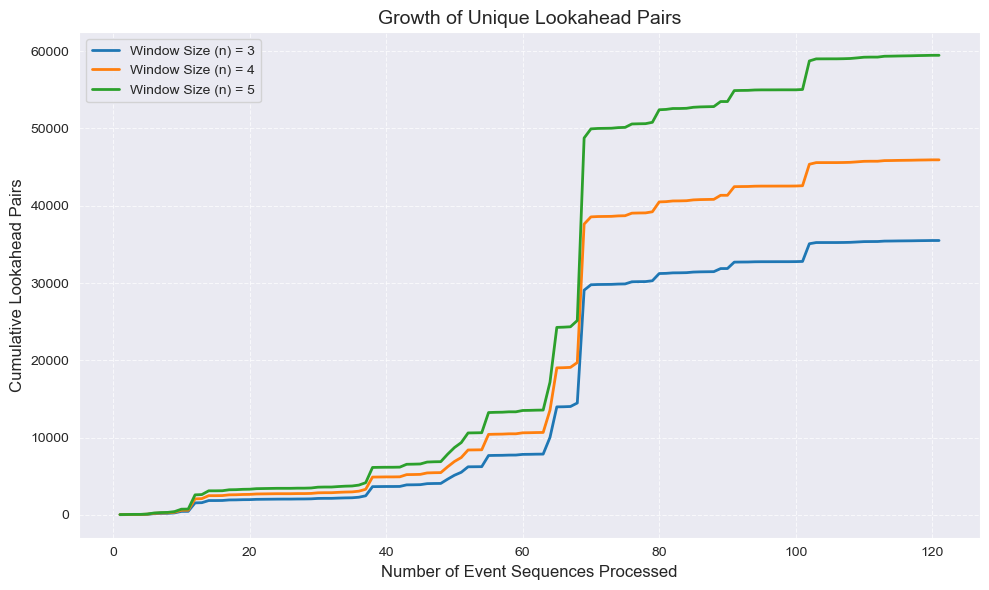

Done! Plot saved as 'lookahead_pair_growthDEEP1.png'


In [9]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict
import numpy as np

# Step 1: Load and resolve events from dataset
def load_and_resolve_events(csv_path, hashmap_path):
    # Load hash map
    hash_map = {}
    with open(hashmap_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                message, key_str = line.rsplit(',', 1)
                key = int(key_str)
                hash_map[key] = message
            except ValueError:
                continue
    
    # Load CSV data
    df = pd.read_csv(csv_path, header=0)
    keychains = []
    
    for _, row in df.iterrows():
        keychain_str = row['KeyChains']
        if pd.isna(keychain_str):
            continue
        try:
            keychain = ast.literal_eval(keychain_str)
            if not isinstance(keychain, list):
                continue
            # Resolve event IDs to messages
            resolved = [hash_map.get(k[0], f"Unknown_{k[0]}") for k in keychain if k]
            if resolved:
                # Add Start and End markers as in the paper
                resolved = ['Start'] + resolved + ['End']
                keychains.append(resolved)
        except Exception:
            continue
    
    return keychains

# Step 2: Implement Learning Phase (Algorithm 1)
def learning_phase(keychains, n):
    D_lookahead = set()  # Lookahead pairs database
    cumulative_counts = []  # Track cumulative unique pairs
    unique_pairs_per_chain = []  # New pairs per keychain
    
    for chain in keychains:
        new_pairs = set()
        # Slide window of size n+1 through the sequence
        for start_idx in range(len(chain) - n):
            window = chain[start_idx:start_idx + n + 1]
            
            # Generate lookahead pairs within the window
            for i in range(len(window)):
                for j in range(i + 1, min(i + n + 1, len(window))):
                    distance = j - i
                    pair = (window[i], window[j], distance)
                    new_pairs.add(pair)
        
        # Update database and track new pairs
        new_unique = new_pairs - D_lookahead
        D_lookahead |= new_unique
        unique_pairs_per_chain.append(len(new_unique))
        cumulative_counts.append(len(D_lookahead))
    
    return D_lookahead, cumulative_counts, unique_pairs_per_chain

# Step 3: Plotting function for Figure 4(b)
def plot_cumulative_pairs(cumulative_data, window_sizes):
    plt.figure(figsize=(10, 6))
    
    for n, counts in cumulative_data.items():
        plt.plot(range(1, len(counts) + 1), counts, 
                 label=f'Window Size (n) = {n}', 
                 linewidth=2)
    
    plt.xlabel('Number of Event Sequences Processed', fontsize=12)
    plt.ylabel('Cumulative Lookahead Pairs', fontsize=12)
    plt.title('Growth of Unique Lookahead Pairs', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save and show plot
    plt.savefig('lookahead_pair_growthDEEP1.png', dpi=300)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Configuration
    hashmap_path = 'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/LLhashMap-90Days.csv'
    csv_path = 'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/unique_pairsJune90daysQWENLL.csv'
    window_sizes = [3, 4, 5]  # Different window sizes to analyze
    
    # Load and resolve events
    print("Loading and resolving events...")
    keychains = load_and_resolve_events(csv_path, hashmap_path)
    print(f"Loaded {len(keychains)} valid event sequences")
    
    # Process for each window size
    cumulative_data = {}
    
    for n in window_sizes:
        print(f"\nProcessing with window size n={n}...")
        _, cumulative_counts, _ = learning_phase(keychains, n)
        cumulative_data[n] = cumulative_counts
        print(f"  Final unique pairs: {cumulative_counts[-1]}")
    
    # Generate plot
    print("\nGenerating visualization...")
    plot_cumulative_pairs(cumulative_data, window_sizes)
    print("Done! Plot saved as 'lookahead_pair_growthDEEP1.png'")

Loaded 9462 hash keys in 0.04s
Loaded 495 event sequences in 0.79s


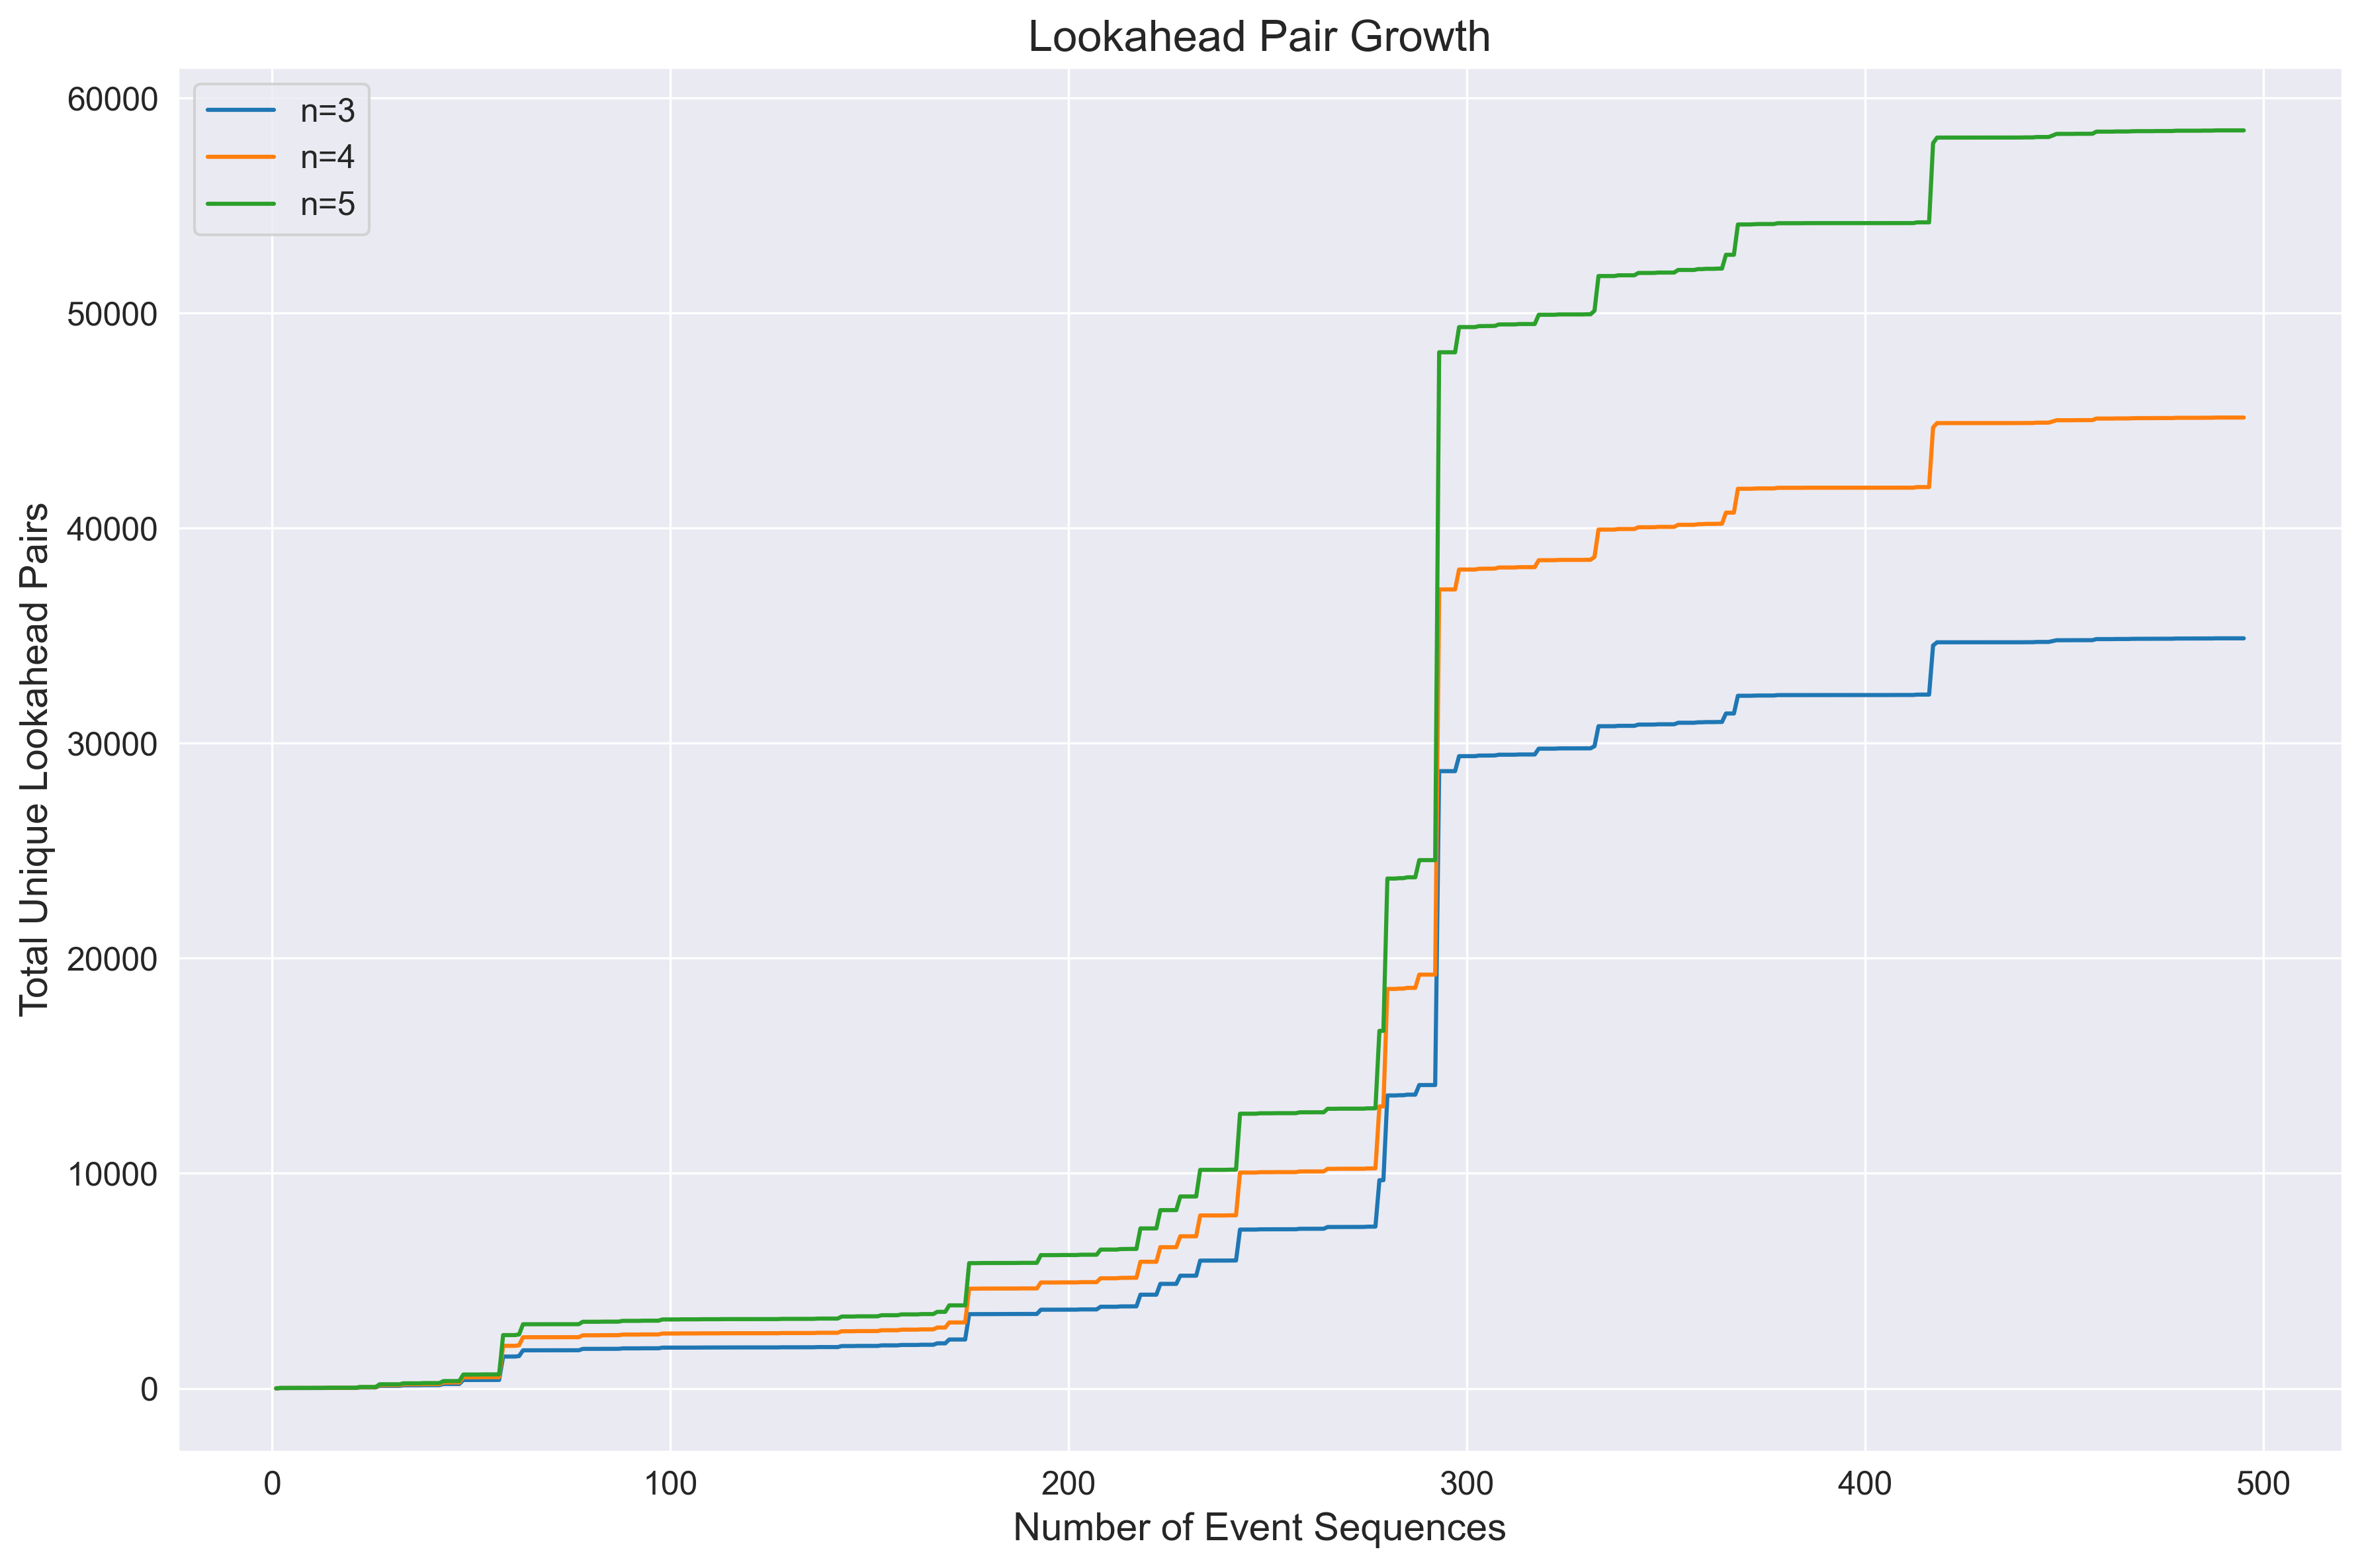

Generated growth plot in 3.25s
Generated 51864 lookahead pairs in 0.14s
Saved lookahead pairs to C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/lookAhead/lookahead_pairs_n5Sir.csv
Saved lookahead matrix to C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/lookAhead/lookahead_matrix_n5Sir.csv
Saved lookahead dictionary to C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/lookAhead/lookahead_matrix_n5Sir_dict.csv
Detection completed in 0.08s
Detected 20 anomalous sequences out of 149


In [1]:
import pandas as pd
import ast
from collections import defaultdict
import matplotlib.pyplot as plt
import os
import csv
import sys
import time

# -------------------------------
# Step 1: Load HashMap
# -------------------------------
def load_hash_map(hashmap_path):
    hash_map = {}
    with open(hashmap_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                message, key_str = line.rsplit(',', 1)
                key = int(key_str)
                hash_map[key] = message
            except ValueError:
                continue
    return hash_map

# -------------------------------
# Step 2: Load and resolve KeyChains
# -------------------------------
def load_and_resolve_events(csv_path, hash_map):
    df = pd.read_csv(csv_path)
    events = []
    for _, row in df.iterrows():
        keychain_str = row['KeyChains']
        if pd.isna(keychain_str): continue
        try:
            keychain = ast.literal_eval(keychain_str)
            resolved = [hash_map.get(k[0], f"Unknown_{k[0]}") for k in keychain if k]
            events.append(resolved)
        except:
            continue
    return events  # List of sequences

# -------------------------------
# Step 3: Learning Phase (Algorithm 1) - Optimized
# -------------------------------
def extract_lookahead_pairs(seq, n):
    pairs = set()
    for i in range(len(seq)):
        max_j = min(i + n + 1, len(seq))
        for j in range(i+1, max_j):
            distance = j - i
            pairs.add((seq[i], seq[j], distance))
    return pairs

def learning_phase(event_sequences, n):
    d_lookahead = set()
    for seq in event_sequences:
        pairs = extract_lookahead_pairs(seq, n)
        d_lookahead.update(pairs)
    return d_lookahead

# -------------------------------
# Step 4: Detection Phase (Algorithm 2)
# -------------------------------
def detection_phase(test_sequences, d_lookahead, n, t=0.02):
    results = []
    for seq in test_sequences:
        pairs = extract_lookahead_pairs(seq, n)
        mismatches = sum(1 for pair in pairs if pair not in d_lookahead)
        max_possible = n * (len(seq) - (n + 1) // 2) if len(seq) > n else 1
        mismatch_score = mismatches / max_possible if max_possible > 0 else 0
        is_anomalous = mismatch_score > t
        results.append((mismatch_score, is_anomalous))
    return results

# -------------------------------
# Step 5: Plotting growth of lookahead pairs
# -------------------------------
def plot_lookahead_growth(event_sequences, window_sizes):
    # Precompute pairs for max window size for efficiency
    max_n = max(window_sizes)
    precomputed_pairs = []
    for seq in event_sequences:
        pairs = extract_lookahead_pairs(seq, max_n)
        precomputed_pairs.append(pairs)
    
    plt.figure(figsize=(12, 8), dpi=300)
    
    for n in window_sizes:
        seen_pairs = set()
        growth = []
        for pairs in precomputed_pairs:
            # Filter pairs by current window size
            filtered_pairs = {(e1, e2, d) for (e1, e2, d) in pairs if d <= n}
            new_pairs = filtered_pairs - seen_pairs
            seen_pairs.update(filtered_pairs)
            growth.append(len(seen_pairs))
        plt.plot(range(1, len(growth) + 1), growth, label=f'n={n}')

    plt.xlabel('Number of Event Sequences', fontsize=14)
    plt.ylabel('Total Unique Lookahead Pairs', fontsize=14)
    plt.title('Lookahead Pair Growth', fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig('lookahead_pair_growth_optimizedSir.png', dpi=300)
    plt.show()

# -------------------------------
# Saving Functions
# -------------------------------
def save_lookahead_pairs(d_lookahead, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Event1', 'Event2', 'Distance'])
        for e1, e2, dist in sorted(d_lookahead):
            writer.writerow([e1, e2, dist])
    print(f"Saved lookahead pairs to {path}")

def save_lookahead_matrix(event_sequences, n, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    matrix_rows = []
    
    # Using dictionary for efficient storage
    lookahead_dict = defaultdict(lambda: defaultdict(set))
    
    for seq_idx, seq in enumerate(event_sequences):
        pairs = extract_lookahead_pairs(seq, n)
        for e1, e2, dist in pairs:
            lookahead_dict[e1][e2].add(dist)
            matrix_rows.append((seq_idx, e1, e2, dist))

    # Save matrix
    with open(path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['SequenceIndex', 'Event1', 'Event2', 'Distance'])
        writer.writerows(matrix_rows)
    print(f"Saved lookahead matrix to {path}")
    
    # Save dictionary version for efficient access
    dict_path = os.path.splitext(path)[0] + '_dict.csv'
    with open(dict_path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Event1', 'Event2', 'Distances'])
        for e1, targets in lookahead_dict.items():
            for e2, distances in targets.items():
                dist_str = '|'.join(map(str, sorted(distances)))
                writer.writerow([e1, e2, dist_str])
    print(f"Saved lookahead dictionary to {dict_path}")

# -------------------------------
# Main
# -------------------------------
if __name__ == "__main__":
    hashmap_path = 'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/LLhashMap-90Days.csv'
    csv_path = 'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/unique_pairsJune90daysQWENLL.csv'

    start_time = time.time()
    hash_map = load_hash_map(hashmap_path)
    print(f"Loaded {len(hash_map)} hash keys in {time.time()-start_time:.2f}s")

    start_time = time.time()
    event_sequences = load_and_resolve_events(csv_path, hash_map)
    print(f"Loaded {len(event_sequences)} event sequences in {time.time()-start_time:.2f}s")

    # Split into training and testing
    split_index = int(0.7 * len(event_sequences))
    train_sequences = event_sequences[:split_index]
    test_sequences = event_sequences[split_index:]

    # Run and plot for multiple window sizes
    plot_window_sizes = [3, 4, 5]
    start_time = time.time()
    plot_lookahead_growth(event_sequences, plot_window_sizes)
    print(f"Generated growth plot in {time.time()-start_time:.2f}s")

    # Train and detect for a fixed n
    n = 5
    start_time = time.time()
    d_lookahead = learning_phase(train_sequences, n)
    print(f"Generated {len(d_lookahead)} lookahead pairs in {time.time()-start_time:.2f}s")
    
    # Save outputs
    save_lookahead_pairs(
        d_lookahead,
        'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/lookAhead/lookahead_pairs_n5Sir.csv'
    )

    save_lookahead_matrix(
        train_sequences,
        n,
        'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/lookAhead/lookahead_matrix_n5Sir.csv'
    )
    
    start_time = time.time()
    detection_results = detection_phase(test_sequences, d_lookahead, n)
    print(f"Detection completed in {time.time()-start_time:.2f}s")

    anomalous_count = sum(1 for _, is_anom in detection_results if is_anom)
    print(f"Detected {anomalous_count} anomalous sequences out of {len(test_sequences)}")

In [1]:
import pandas as pd
import numpy as np
import ast
from collections import defaultdict
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
import os

class WindowsLogAnomalyDetector:
    """
    A robust anomaly detection system for Windows event logs based on lookahead pairs.

    This class learns patterns from normal event sequences and detects anomalies in new sequences
    by identifying deviations from the learned patterns. It includes data loading with hash map
    resolution, model training, evaluation, and visualization.
    """
    def __init__(self, window_size=3, threshold=0.1):
        """Initialize the anomaly detector with configurable parameters."""
        self.window_size = window_size
        self.threshold = threshold
        self.lookahead_db = set()
        self.stats = defaultdict(int)
        
        # Configure a logger for clear, informative output
        logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
        self.logger = logging.getLogger(__name__)

    def load_hash_map(self, hashmap_path):
        """Loads a hash map from a CSV file for resolving event keys."""
        hash_map = {}
        self.logger.info(f"Loading hash map from: {hashmap_path}")
        try:
            with open(hashmap_path, 'r', encoding='utf-8') as f:
                for line in f:
                    line = line.strip()
                    if not line:
                        continue
                    parts = line.rsplit(',', 1)
                    if len(parts) == 2:
                        message, key_str = parts
                        try:
                            hash_map[int(key_str)] = message
                        except ValueError:
                            self.logger.warning(f"Skipping invalid key in hash map: {key_str}")
                            pass
        except FileNotFoundError:
            self.logger.error(f"Hash map file not found at: {hashmap_path}")
            raise
        self.logger.info(f"Successfully loaded {len(hash_map)} entries from hash map.")
        return hash_map

    def load_and_resolve_sequences(self, csv_path, hash_map):
        """Loads event sequences from a CSV and resolves keys using the hash map."""
        self.logger.info(f"Loading and resolving sequences from: {csv_path}")
        try:
            df = pd.read_csv(csv_path)
        except FileNotFoundError:
            self.logger.error(f"Sequence file not found: {csv_path}")
            return []
            
        sequences = []
        for index, row in df.iterrows():
            keychain_str = row.get('KeyChains')
            if pd.isna(keychain_str):
                continue
            try:
                # Safely evaluate the string representation of the list
                keychain = ast.literal_eval(keychain_str)
                # Resolve keys to messages, handling potential lookup errors
                resolved_seq = [hash_map.get(key[0], f"UnknownKey_{key[0]}") for key in keychain if key]
                if resolved_seq:
                    sequences.append(resolved_seq)
            except (ValueError, SyntaxError) as e:
                self.logger.warning(f"Could not parse keychain at row {index}: {keychain_str} - Error: {e}")
                continue
        self.logger.info(f"Loaded and resolved {len(sequences)} event sequences.")
        return sequences

    def extract_lookahead_pairs(self, sequence):
        """Extracts all lookahead pairs from a single event sequence."""
        pairs = set()
        for i in range(len(sequence)):
            for k in range(1, self.window_size + 1):
                if i + k < len(sequence):
                    # Format: "EventA:EventB,Distance"
                    pair = f"{sequence[i]}:{sequence[i+k]},{k}"
                    pairs.add(pair)
        return pairs

    def learn_normal_patterns(self, normal_sequences):
        """Learn normal patterns by populating the lookahead database from normal sequences."""
        self.logger.info(f"Starting learning phase with {len(normal_sequences)} normal sequences...")
        self.lookahead_db.clear()
        for seq in normal_sequences:
            pairs = self.extract_lookahead_pairs(seq)
            self.lookahead_db.update(pairs)
        self.logger.info(f"Learning complete. Stored {len(self.lookahead_db)} unique lookahead pairs.")

    def detect_anomaly(self, sequence):
        """
        Analyzes a single sequence to determine if it is anomalous.
        An anomaly is declared if the mismatch score exceeds the defined threshold.
        """
        lookahead_pairs = self.extract_lookahead_pairs(sequence)
        if not lookahead_pairs:
            return {'is_anomalous': False, 'mismatch_score': 0.0}
            
        # Count how many pairs from the sequence are not in the normal database
        mismatches = sum(1 for pair in lookahead_pairs if pair not in self.lookahead_db)
        
        mismatch_score = mismatches / len(lookahead_pairs)
        is_anomalous = mismatch_score > self.threshold
        
        return {'is_anomalous': is_anomalous, 'mismatch_score': mismatch_score}

    def evaluate_model(self, normal_test_sequences, malware_sequences):
        """Evaluates the model's performance on normal and malware test data."""
        self.logger.info("Starting model evaluation...")
        self.stats.clear()

        # Test on normal sequences (ground truth = not anomalous)
        for seq in normal_test_sequences:
            result = self.detect_anomaly(seq)
            if result['is_anomalous']:
                self.stats['false_positives'] += 1
            else:
                self.stats['true_negatives'] += 1

        # Test on malware sequences (ground truth = anomalous)
        for seq in malware_sequences:
            result = self.detect_anomaly(seq)
            if result['is_anomalous']:
                self.stats['true_positives'] += 1
            else:
                self.stats['false_negatives'] += 1
        
        # Calculate performance metrics
        tp = self.stats['true_positives']
        tn = self.stats['true_negatives']
        fp = self.stats['false_positives']
        fn = self.stats['false_negatives']
        
        total = tp + tn + fp + fn
        accuracy = (tp + tn) / total if total > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        evaluation_results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'confusion_matrix': {
                'true_positives': tp,
                'true_negatives': tn,
                'false_positives': fp,
                'false_negatives': fn
            }
        }
        self.logger.info(f"Evaluation complete. Accuracy: {accuracy:.2%}, Precision: {precision:.2%}, Recall: {recall:.2%}, F1-Score: {f1_score:.2f}")
        return evaluation_results

    def plot_evaluation_results(self, evaluation_results, save_path='detection_evaluation_results.png'):
        """Plots the confusion matrix and key performance metrics."""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # 1. Confusion Matrix
        cm_data = evaluation_results['confusion_matrix']
        cm_matrix = np.array([
            [cm_data['true_negatives'], cm_data['false_positives']],
            [cm_data['false_negatives'], cm_data['true_positives']]
        ])
        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues', ax=ax1,
                    xticklabels=['Predicted Normal', 'Predicted Malware'],
                    yticklabels=['Actual Normal', 'Actual Malware'])
        ax1.set_title('Confusion Matrix', fontsize=14)
        ax1.set_xlabel('Predicted Label', fontsize=12)
        ax1.set_ylabel('True Label', fontsize=12)

        # 2. Performance Metrics Bar Chart
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        values = [evaluation_results[m.lower().replace(' ', '_')] for m in metrics]
        ax2.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        ax2.set_ylim(0, 1)
        ax2.set_title('Performance Metrics', fontsize=14)
        ax2.set_ylabel('Score', fontsize=12)
        for i, v in enumerate(values):
            ax2.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')
            
        plt.tight_layout()
        plt.savefig(save_path, dpi=300)
        self.logger.info(f"Evaluation plot saved to {save_path}")
        plt.show()

# ===============================================
# Main Execution Block
# ===============================================
if __name__ == "__main__":
    # --- Configuration ---
    NORMAL_HASHMAP_PATH = 'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/LLhashMap-90Days.csv'
    MALWARE_HASHMAP_PATH = 'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/malwareData/malware_message_hashmap.csv'
    NORMAL_SEQUENCES_PATH = 'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/unique_pairsJune90daysQWENLL.csv'
    MALWARE_SEQUENCES_PATH = 'C:/Users/OMEN/Documents/python/WindowsLogAnalysis/data/malwareData/malware_unique_pairs.csv'
    
    # --- Initialization ---
    # RECOMMENDATION 1: Increase the threshold. Let's try 0.3. 
    # This means over 30% of a sequence's pairs must be new to be considered an anomaly.
    detector = WindowsLogAnomalyDetector(window_size=3, threshold=0.3)

    # --- Data Loading and Preparation ---
    normal_hash_map = detector.load_hash_map(NORMAL_HASHMAP_PATH)
    malware_hash_map = detector.load_hash_map(MALWARE_HASHMAP_PATH)
    
    all_normal_sequences = detector.load_and_resolve_sequences(NORMAL_SEQUENCES_PATH, normal_hash_map)
    malware_sequences = detector.load_and_resolve_sequences(MALWARE_SEQUENCES_PATH, malware_hash_map)
    
    # RECOMMENDATION 2: Adjust the data split to give the model more training data.
    # Let's change from 70/30 to 80/20.
    if all_normal_sequences:
        split_index = int(0.8 * len(all_normal_sequences)) # Changed from 0.7 to 0.8
        train_sequences = all_normal_sequences[:split_index]
        test_normal_sequences = all_normal_sequences[split_index:]
        detector.logger.info(f"Data split: {len(train_sequences)} training sequences, {len(test_normal_sequences)} normal test sequences.")
    else:
        train_sequences, test_normal_sequences = [], []
        logging.error("No normal sequences loaded, cannot proceed with training and evaluation.")
        exit()

    # --- Training Phase ---
    detector.learn_normal_patterns(train_sequences)
    
    # --- Evaluation Phase ---
    if test_normal_sequences or malware_sequences:
        evaluation_results = detector.evaluate_model(test_normal_sequences, malware_sequences)
        
        # --- Reporting and Visualization ---
        print("\n" + "="*30)
        print("DETECTION MODEL EVALUATION RESULTS (V2)")
        print("="*30 + "\n")
        print(json.dumps(evaluation_results, indent=4))
        print("\n")
        
        detector.plot_evaluation_results(evaluation_results, save_path='detection_evaluation_results_v2.png')
    else:
        detector.logger.warning("No test data available to evaluate the model.")

In [ ]:
import pandas as pd
import numpy as np
import ast
from collections import defaultdict
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
import os
import time
from threading import Thread, Lock
from queue import Queue
import datetime

class WindowsLogAnomalyDetector:
    """
    A robust anomaly detection system for Windows event logs based on lookahead pairs,
    adapted from the HTTP/2 DoS attack detection methodology in Tripathi (2024).

    This class learns patterns from normal event sequences, detects anomalies in new sequences
    by identifying deviations, and supports real-time detection with delay analysis.
    """
    def __init__(self, window_size=3, threshold=0.02, max_delay_threshold=30.0):
        """Initialize the anomaly detector with configurable parameters."""
        self.window_size = window_size
        self.threshold = threshold
        self.max_delay_threshold = max_delay_threshold  # seconds
        self.lookahead_db = set()
        self.delay_db = defaultdict(float)  # Maps event pairs to max delays
        self.stats = defaultdict(int)
        self.event_queue = Queue()  # For real-time processing
        self.sequence_lock = Lock()
        self.current_sequence = []
        self.last_event_time = None
        
        # Configure logger
        logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
        self.logger = logging.getLogger(__name__)

    def load_hash_map(self, hashmap_path):
        """Loads a hash map from a CSV file for resolving event keys."""
        hash_map = {}
        self.logger.info(f"Loading hash map from: {hashmap_path}")
        try:
            with open(hashmap_path, 'r', encoding='utf-8') as f:
                for line in f:
                    line = line.strip()
                    if not line:
                        continue
                    parts = line.rsplit(',', 1)
                    if len(parts) == 2:
                        message, key_str = parts
                        try:
                            hash_map[int(key_str)] = message
                        except ValueError:
                            self.logger.warning(f"Skipping invalid key in hash map: {key_str}")
                    else:
                        self.logger.warning(f"Invalid line format in hash map: {line}")
        except FileNotFoundError:
            self.logger.error(f"Hash map file not found at: {hashmap_path}")
            raise
        self.logger.info(f"Successfully loaded {len(hash_map)} entries from hash map.")
        return hash_map

    def load_and_resolve_sequences(self, csv_path, hash_map, include_timestamps=False):
        """Loads event sequences from a CSV and resolves keys using the hash map."""
        self.logger.info(f"Loading and resolving sequences from: {csv_path}")
        try:
            df = pd.read_csv(csv_path)
        except FileNotFoundError:
            self.logger.error(f"Sequence file not found: {csv_path}")
            return []
            
        sequences = []
        for index, row in df.iterrows():
            keychain_str = row.get('KeyChains')
            timestamp_str = row.get('Timestamps') if include_timestamps else None
            if pd.isna(keychain_str):
                continue
            try:
                keychain = ast.literal_eval(keychain_str)
                timestamps = ast.literal_eval(timestamp_str) if timestamp_str and not pd.isna(timestamp_str) else None
                resolved_seq = []
                for i, key in enumerate(keychain):
                    if not key:
                        continue
                    event = hash_map.get(key[0], f"UnknownKey_{key[0]}")
                    if timestamps and i < len(timestamps):
                        resolved_seq.append((event, timestamps[i]))
                    else:
                        resolved_seq.append((event, None))
                if resolved_seq:
                    sequences.append(resolved_seq)
            except (ValueError, SyntaxError) as e:
                self.logger.warning(f"Could not parse keychain at row {index}: {keychain_str} - Error: {e}")
                continue
        self.logger.info(f"Loaded and resolved {len(sequences)} event sequences.")
        return sequences

    def extract_lookahead_pairs(self, sequence):
        """Extracts all lookahead pairs from a single event sequence."""
        pairs = set()
        events = [event[0] for event in sequence]  # Extract event names, ignore timestamps
        for i in range(len(events)):
            for k in range(1, self.window_size + 1):
                if i + k < len(events):
                    pair = f"{events[i]}:{events[i+k]},{k}"
                    pairs.add(pair)
        return pairs

    def extract_delays(self, sequence):
        """Extracts delays between consecutive events in a sequence."""
        delays = {}
        for i in range(1, len(sequence)):
            prev_event, prev_time = sequence[i-1]
            curr_event, curr_time = sequence[i]
            if prev_time and curr_time:
                try:
                    prev_dt = datetime.datetime.strptime(prev_time, '%Y-%m-%d %H:%M:%S')
                    curr_dt = datetime.datetime.strptime(curr_time, '%Y-%m-%d %H:%M:%S')
                    delay = (curr_dt - prev_dt).total_seconds()
                    key = f"{prev_event}->{curr_event}"
                    delays[key] = max(delays.get(key, 0), delay)
                except ValueError:
                    self.logger.warning(f"Invalid timestamp format in sequence: {prev_time} or {curr_time}")
        return delays

    def learn_normal_patterns(self, normal_sequences):
        """Learn normal patterns by populating lookahead and delay databases."""
        self.logger.info(f"Starting learning phase with {len(normal_sequences)} normal sequences...")
        self.lookahead_db.clear()
        self.delay_db.clear()
        for seq in normal_sequences:
            pairs = self.extract_lookahead_pairs(seq)
            self.lookahead_db.update(pairs)
            delays = self.extract_delays(seq)
            for key, delay in delays.items():
                self.delay_db[key] = max(self.delay_db.get(key, 0), delay)
        self.logger.info(f"Learning complete. Stored {len(self.lookahead_db)} unique lookahead pairs and {len(self.delay_db)} delay entries.")

    def detect_anomaly(self, sequence, check_delays=True):
        """Analyzes a sequence to determine if it is anomalous."""
        lookahead_pairs = self.extract_lookahead_pairs(sequence)
        if not lookahead_pairs:
            return {'is_anomalous': False, 'mismatch_score': 0.0, 'delay_anomaly': False}

        # Calculate mismatch score
        mismatches = sum(1 for pair in lookahead_pairs if pair not in self.lookahead_db)
        L = len([event[0] for event in sequence])
        max_mismatches = self.window_size * (L - (self.window_size + 1) / 2) if L > self.window_size else len(lookahead_pairs)
        mismatch_score = mismatches / max_mismatches if max_mismatches > 0 else 0.0

        # Check for delay anomalies
        delay_anomaly = False
        if check_delays:
            for i in range(1, len(sequence)):
                prev_event, prev_time = sequence[i-1]
                curr_event, curr_time = sequence[i]
                if prev_time and curr_time:
                    try:
                        prev_dt = datetime.datetime.strptime(prev_time, '%Y-%m-%d %H:%M:%S')
                        curr_dt = datetime.datetime.strptime(curr_time, '%Y-%m-%d %H:%M:%S')
                        delay = (curr_dt - prev_dt).total_seconds()
                        key = f"{prev_event}->{curr_event}"
                        max_delay = self.delay_db.get(key, self.max_delay_threshold)
                        if delay > max_delay:
                            delay_anomaly = True
                            break
                    except ValueError:
                        self.logger.warning(f"Invalid timestamp format: {prev_time} or {curr_time}")

        is_anomalous = mismatch_score > self.threshold or delay_anomaly
        return {'is_anomalous': is_anomalous, 'mismatch_score': mismatch_score, 'delay_anomaly': delay_anomaly}

    def real_time_detection_thread(self):
        """Simulates real-time detection by processing events from the queue."""
        self.logger.info("Starting real-time detection thread...")
        while True:
            event = self.event_queue.get()
            if event == "STOP":
                break
            event_name, timestamp = event
            current_time = time.time()

            with self.sequence_lock:
                if self.last_event_time and (current_time - self.last_event_time) > self.max_delay_threshold:
                    self.current_sequence.append(("TIMEOUT", None))
                self.current_sequence.append((event_name, timestamp))
                self.last_event_time = current_time

                if len(self.current_sequence) > self.window_size:
                    result = self.detect_anomaly(self.current_sequence)
                    if result['is_anomalous']:
                        self.logger.warning(f"Anomaly detected: Mismatch Score={result['mismatch_score']:.2f}, Delay Anomaly={result['delay_anomaly']}")
                    else:
                        self.logger.debug(f"Sequence normal: Mismatch Score={result['mismatch_score']:.2f}")

    def start_real_time_detection(self):
        """Starts the real-time detection thread."""
        detection_thread = Thread(target=self.real_time_detection_thread)
        detection_thread.daemon = True
        detection_thread.start()
        return detection_thread

    def evaluate_model(self, normal_test_sequences, malware_sequences, check_delays=True):
        """Evaluates the model's performance on test data."""
        self.logger.info("Starting model evaluation...")
        self.stats.clear()
        mismatch_scores_normal = []
        mismatch_scores_anomalous = []

        # Test normal sequences
        for seq in normal_test_sequences:
            result = self.detect_anomaly(seq, check_delays)
            mismatch_scores_normal.append(result['mismatch_score'])
            if result['is_anomalous']:
                self.stats['false_positives'] += 1
            else:
                self.stats['true_negatives'] += 1

        # Test malware sequences
        for seq in malware_sequences:
            result = self.detect_anomaly(seq, check_delays)
            mismatch_scores_anomalous.append(result['mismatch_score'])
            if result['is_anomalous']:
                self.stats['true_positives'] += 1
            else:
                self.stats['false_negatives'] += 1

        # Calculate metrics
        tp = self.stats['true_positives']
        tn = self.stats['true_negatives']
        fp = self.stats['false_positives']
        fn = self.stats['false_negatives']
        
        total = tp + tn + fp + fn
        accuracy = (tp + tn) / total if total > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        evaluation_results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'confusion_matrix': {
                'true_positives': tp,
                'true_negatives': tn,
                'false_positives': fp,
                'false_negatives': fn
            },
            'mismatch_scores_normal': mismatch_scores_normal,
            'mismatch_scores_anomalous': mismatch_scores_anomalous
        }
        self.logger.info(f"Evaluation complete. Accuracy: {accuracy:.2%}, Precision: {precision:.2%}, Recall: {recall:.2%}, F1-Score: {f1_score:.2f}")
        return evaluation_results

    def plot_evaluation_results(self, evaluation_results, save_path='detection_evaluation_results.png'):
        """Plots confusion matrix, performance metrics, and CDF of mismatch scores."""
        fig = plt.figure(figsize=(18, 12))
        
        # 1. Confusion Matrix
        ax1 = plt.subplot(2, 2, 1)
        cm_data = evaluation_results['confusion_matrix']
        cm_matrix = np.array([
            [cm_data['true_negatives'], cm_data['false_positives']],
            [cm_data['false_negatives'], cm_data['true_positives']]
        ])
        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues', ax=ax1,
                    xticklabels=['Predicted Normal', 'Predicted Malware'],
                    yticklabels=['Actual Normal', 'Actual Malware'])
        ax1.set_title('Confusion Matrix', fontsize=14)
        ax1.set_xlabel('Predicted Label', fontsize=12)
        ax1.set_ylabel('True Label', fontsize=12)

        # 2. Performance Metrics Bar Chart
        ax2 = plt.subplot(2, 2, 2)
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        values = [evaluation_results[m.lower().replace(' ', '_')] for m in metrics]
        ax2.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        ax2.set_ylim(0, 1)
        ax2.set_title('Performance Metrics', fontsize=14)
        ax2.set_ylabel('Score', fontsize=12)
        for i, v in enumerate(values):
            ax2.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

        # 3. CDF Plot of Mismatch Scores
        ax3 = plt.subplot(2, 2, 3)
        normal_scores = evaluation_results['mismatch_scores_normal']
        anomalous_scores = evaluation_results['mismatch_scores_anomalous']
        if normal_scores:
            sns.ecdfplot(normal_scores, label='Normal', ax=ax3, color='blue')
        if anomalous_scores:
            sns.ecdfplot(anomalous_scores, label='Anomalous', ax=ax3, color='red')
        ax3.set_title('CDF of Mismatch Scores', fontsize=14)
        ax3.set_xlabel('Mismatch Score', fontsize=12)
        ax3.set_ylabel('Cumulative Probability', fontsize=12)
        ax3.legend()

        plt.tight_layout()
        plt.savefig(save_path, dpi=300)
        self.logger.info(f"Evaluation plot saved to {save_path}")
        plt.show()

if __name__ == "__main__":
    # Configuration
    NORMAL_HASHMAP_PATH = 'data/LLhashMap-90Days.csv'
    MALWARE_HASHMAP_PATH = 'data/malwareData/malware_message_hashmap.csv'
    NORMAL_SEQUENCES_PATH = 'data/unique_pairsJune90daysQWENLL.csv'
    MALWARE_SEQUENCES_PATH = 'data/malwareData/malware_unique_pairs.csv'
    
    # Test multiple window sizes and thresholds
    window_sizes = [3, 5, 7]
    thresholds = [0.01, 0.02, 0.03]
    
    for window_size in window_sizes:
        for threshold in thresholds:
            detector = WindowsLogAnomalyDetector(window_size=window_size, threshold=threshold)
            
            # Load data
            normal_hash_map = detector.load_hash_map(NORMAL_HASHMAP_PATH)
            malware_hash_map = detector.load_hash_map(MALWARE_HASHMAP_PATH)
            all_normal_sequences = detector.load_and_resolve_sequences(NORMAL_SEQUENCES_PATH, normal_hash_map, include_timestamps=True)
            malware_sequences = detector.load_and_resolve_sequences(MALWARE_SEQUENCES_PATH, malware_hash_map, include_timestamps=True)
            
            # Split data
            if all_normal_sequences:
                split_index = int(0.8 * len(all_normal_sequences))
                train_sequences = all_normal_sequences[:split_index]
                test_normal_sequences = all_normal_sequences[split_index:]
                detector.logger.info(f"Window Size: {window_size}, Threshold: {threshold}")
                detector.logger.info(f"Data split: {len(train_sequences)} training sequences, {len(test_normal_sequences)} normal test sequences.")
            else:
                detector.logger.error("No normal sequences loaded, cannot proceed.")
                exit()

            # Training
            detector.learn_normal_patterns(train_sequences)
            
            # Evaluation
            if test_normal_sequences or malware_sequences:
                evaluation_results = detector.evaluate_model(test_normal_sequences, malware_sequences)
                print(f"\n{'='*40}")
                print(f"EVALUATION RESULTS (Window Size={window_size}, Threshold={threshold})")
                print(f"{'='*40}\n")
                print(json.dumps(evaluation_results, indent=4))
                detector.plot_evaluation_results(evaluation_results, save_path=f'detection_results_w{window_size}_t{threshold}.png')
            else:
                detector.logger.warning("No test data available to evaluate the model.")

            # Simulate real-time detection (example)
            detector.start_real_time_detection()
            for seq in malware_sequences[:5]:  # Simulate incoming events
                for event, timestamp in seq:
                    detector.event_queue.put((event, timestamp))
                    time.sleep(0.1)  # Simulate delay
            detector.event_queue.put("STOP")

2025-06-14 10:58:50,336 - INFO - Loading hash map from: data/LLhashMap-90Days.csv
2025-06-14 10:58:50,344 - WARNING - Skipping invalid key in hash map: Key
2025-06-14 10:58:50,346 - WARNING - Skipping invalid key in hash map:  type 0
2025-06-14 10:58:50,348 - WARNING - Invalid line format in hash map: event name: livekernelevent
2025-06-14 10:58:50,349 - WARNING - Invalid line format in hash map: response: not available
2025-06-14 10:58:50,351 - WARNING - Invalid line format in hash map: cab id: f1469195-9282-492f-a824-0a8f5e382dc0
2025-06-14 10:58:50,352 - WARNING - Invalid line format in hash map: problem signature:
2025-06-14 10:58:50,354 - WARNING - Invalid line format in hash map: p1: 141
2025-06-14 10:58:50,356 - WARNING - Invalid line format in hash map: p2: ffff8108b6cce010
2025-06-14 10:58:50,357 - WARNING - Invalid line format in hash map: p3: fffff80345682470
2025-06-14 10:58:50,360 - WARNING - Invalid line format in hash map: p4: 0
2025-06-14 10:58:50,361 - WARNING - Invali

In [9]:
import pandas as pd
import numpy as np
import ast
from collections import defaultdict
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
import os
import time
from threading import Thread, Lock
from queue import Queue
import random
from sklearn.metrics import precision_recall_curve

class WindowsLogAnomalyDetector:
    """
    Anomaly detection system for Windows event logs using lookahead pairs,
    adapted from Tripathi (2024) for datasets without timestamps.

    This class learns patterns from normal event sequences and detects anomalies
    based on deviations in lookahead pairs, without delay analysis.
    """
    def __init__(self, window_size=3, threshold=0.02, plot_dir='./data/finalResult'):
        """Initialize the anomaly detector with configurable parameters."""
        self.window_size = window_size
        self.threshold = threshold
        self.lookahead_db = set()
        self.stats = defaultdict(int)
        self.event_queue = Queue()  # For real-time processing
        self.sequence_lock = Lock()
        self.current_sequence = []
        self.plot_dir = plot_dir
        
        # Create plot directory if it doesn't exist
        if not os.path.exists(self.plot_dir):
            os.makedirs(self.plot_dir)
        
        # Configure logger with date
        logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
        self.logger = logging.getLogger(__name__)
        self.logger.info("Initialized WindowsLogAnomalyDetector on June 14, 2025")

    def load_hash_map(self, hashmap_path):
        """Loads a hash map from a CSV file for resolving event keys."""
        hash_map = {}
        self.logger.info(f"Loading hash map from: {hashmap_path}")
        try:
            with open(hashmap_path, 'r', encoding='utf-8') as f:
                reader = csv.reader(f)
                next(reader, None)  # Skip header
                for row in reader:
                    if len(row) == 2:
                        message, key_str = row
                        try:
                            hash_map[int(key_str)] = message
                        except ValueError:
                            self.logger.warning(f"Skipping invalid key in hash map: {key_str}")
                    else:
                        self.logger.warning(f"Invalid line format in hash map: {row}")
        except FileNotFoundError:
            self.logger.error(f"Hash map file not found at: {hashmap_path}")
            raise
        except Exception as e:
            self.logger.error(f"An unexpected error occurred while loading the hash map: {e}")
            raise
        self.logger.info(f"Successfully loaded {len(hash_map)} entries from hash map.")
        return hash_map

    def load_and_resolve_sequences(self, csv_path, hash_map):
        """Loads event sequences from a CSV and resolves keys using the hash map."""
        self.logger.info(f"Loading and resolving sequences from: {csv_path}")
        try:
            df = pd.read_csv(csv_path)
        except FileNotFoundError:
            self.logger.error(f"Sequence file not found: {csv_path}")
            return []
            
        sequences = []
        for index, row in df.iterrows():
            keychain_str = row.get('KeyChains')
            if pd.isna(keychain_str):
                continue
            try:
                keychain = ast.literal_eval(keychain_str)
                resolved_seq = []
                for key in keychain:
                    if not key:
                        continue
                    event = hash_map.get(key[0], f"UnknownKey_{key[0]}")
                    resolved_seq.append(event)
                if resolved_seq:
                    sequences.append(resolved_seq)
            except (ValueError, SyntaxError) as e:
                self.logger.warning(f"Could not parse keychain at row {index}: {keychain_str} - Error: {e}")
                continue
        self.logger.info(f"Loaded and resolved {len(sequences)} event sequences.")
        return sequences

    def augment_sequences(self, sequences, augmentation_factor=2):
        """Augments sequences by creating variations to increase dataset size."""
        self.logger.info(f"Augmenting {len(sequences)} sequences with factor {augmentation_factor}")
        augmented = sequences.copy()
        for seq in sequences:
            for _ in range(augmentation_factor - 1):
                new_seq = seq.copy()
                if len(new_seq) > 2:
                    # Randomly swap two adjacent events with 20% probability
                    if random.random() < 0.2:
                        idx = random.randint(0, len(new_seq) - 2)
                        new_seq[idx], new_seq[idx + 1] = new_seq[idx + 1], new_seq[idx]
                    # Insert a repeated event with 10% probability
                    if random.random() < 0.1:
                        idx = random.randint(0, len(new_seq) - 1)
                        new_seq.insert(idx, new_seq[idx])
                    augmented.append(new_seq)
        self.logger.info(f"Augmented to {len(augmented)} sequences.")
        return augmented

    def extract_lookahead_pairs(self, sequence):
        """Extracts all lookahead pairs from a single event sequence."""
        pairs = set()
        for i in range(len(sequence)):
            for k in range(1, self.window_size + 1):
                if i + k < len(sequence):
                    pair = f"{sequence[i]}:{sequence[i+k]},{k}"
                    pairs.add(pair)
        return pairs

    def learn_normal_patterns(self, normal_sequences):
        """Learn normal patterns by populating lookahead database."""
        self.logger.info(f"Starting learning phase with {len(normal_sequences)} normal sequences...")
        self.lookahead_db.clear()
        for seq in normal_sequences:
            pairs = self.extract_lookahead_pairs(seq)
            self.lookahead_db.update(pairs)
        self.logger.info(f"Learning complete. Stored {len(self.lookahead_db)} unique lookahead pairs.")

    def detect_anomaly(self, sequence):
        """Analyzes a sequence to determine if it is anomalous based on lookahead pairs."""
        lookahead_pairs = self.extract_lookahead_pairs(sequence)
        if not lookahead_pairs:
            return {'is_anomalous': False, 'mismatch_score': 0.0, 'mismatches': 0, 'total_pairs': 0, 'missing_pairs': []}

        # Calculate mismatch score per paper's formula (Section IV-B1)
        mismatches = sum(1 for pair in lookahead_pairs if pair not in self.lookahead_db)
        L = len(sequence)
        max_mismatches = self.window_size * (L - (self.window_size + 1) / 2) if L > self.window_size else len(lookahead_pairs)
        mismatch_score = mismatches / max_mismatches if max_mismatches > 0 else 0.0

        is_anomalous = mismatch_score > self.threshold
        return {
            'is_anomalous': is_anomalous,
            'mismatch_score': mismatch_score,
            'mismatches': mismatches,
            'total_pairs': len(lookahead_pairs),
            'missing_pairs': [pair for pair in lookahead_pairs if pair not in self.lookahead_db]
        }

    def real_time_detection_thread(self):
        """Simulates real-time detection by processing events from the queue."""
        self.logger.info("Starting real-time detection thread...")
        while True:
            event = self.event_queue.get()
            if event == "STOP":
                break
            with self.sequence_lock:
                self.current_sequence.append(event)
                if len(self.current_sequence) > self.window_size:
                    result = self.detect_anomaly(self.current_sequence)
                    if result['is_anomalous']:
                        self.logger.warning(f"Anomaly detected: Mismatch Score={result['mismatch_score']:.2f}, "
                                          f"Mismatches={result['mismatches']}/{result['total_pairs']}")
                    else:
                        self.logger.debug(f"Sequence normal: Mismatch Score={result['mismatch_score']:.2f}")
                    self.current_sequence = self.current_sequence[-self.window_size:]

    def start_real_time_detection(self):
        """Starts the real-time detection thread."""
        detection_thread = Thread(target=self.real_time_detection_thread)
        detection_thread.daemon = True
        detection_thread.start()
        return detection_thread

    def evaluate_model(self, normal_test_sequences, malware_sequences):
        """Evaluates the model's performance on test data."""
        self.logger.info("Starting model evaluation...")
        self.stats.clear()
        mismatch_scores_normal = []
        mismatch_scores_anomalous = []
        labels = []
        scores = []

        # Test normal sequences (label 0)
        for seq in normal_test_sequences:
            result = self.detect_anomaly(seq)
            mismatch_scores_normal.append(result['mismatch_score'])
            scores.append(result['mismatch_score'])
            labels.append(0)  # Normal
            if result['is_anomalous']:
                self.stats['false_positives'] += 1
            else:
                self.stats['true_negatives'] += 1

        # Test malware sequences (label 1)
        for seq in malware_sequences:
            result = self.detect_anomaly(seq)
            mismatch_scores_anomalous.append(result['mismatch_score'])
            scores.append(result['mismatch_score'])
            labels.append(1)  # Anomalous
            if result['is_anomalous']:
                self.stats['true_positives'] += 1
            else:
                self.stats['false_negatives'] += 1

        # Calculate metrics
        tp = self.stats['true_positives']
        tn = self.stats['true_negatives']
        fp = self.stats['false_positives']
        fn = self.stats['false_negatives']
        
        total = tp + tn + fp + fn
        accuracy = (tp + tn) / total if total > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        evaluation_results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'confusion_matrix': {
                'true_positives': tp,
                'true_negatives': tn,
                'false_positives': fp,
                'false_negatives': fn
            },
            'mismatch_scores_normal': mismatch_scores_normal,
            'mismatch_scores_anomalous': mismatch_scores_anomalous,
            'labels': labels,
            'scores': scores
        }
        self.logger.info(f"Evaluation complete. Accuracy: {accuracy:.2%}, Precision: {precision:.2%}, "
                        f"Recall: {recall:.2%}, F1-Score: {f1_score:.2f}")
        return evaluation_results

    def plot_evaluation_results(self, evaluation_results, window_size, threshold):
        """Plots all evaluation graphs and saves them to the specified directory."""
        base_filename = f"w{window_size}_t{threshold:.2f}"
        
        # 1. Confusion Matrix
        fig1 = plt.figure(figsize=(6, 4))
        cm_data = evaluation_results['confusion_matrix']
        cm_matrix = np.array([
            [cm_data['true_negatives'], cm_data['false_positives']],
            [cm_data['false_negatives'], cm_data['true_positives']]
        ])
        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Normal', 'Predicted Malware'],
                    yticklabels=['Actual Normal', 'Actual Malware'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"confusion_matrix_{base_filename}.png")
        plt.savefig(save_path, dpi=150)
        plt.close()
        self.logger.info(f"Confusion matrix saved to {save_path}")

        # 2. Performance Metrics Bar Chart
        fig2 = plt.figure(figsize=(6, 4))
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        values = [evaluation_results[m.lower().replace(' ', '_')] for m in metrics]
        plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        plt.ylim(0, 1)
        plt.title('Performance Metrics')
        plt.ylabel('Score')
        for i, v in enumerate(values):
            plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"performance_metrics_{base_filename}.png")
        plt.savefig(save_path, dpi=150)
        plt.close()
        self.logger.info(f"Performance metrics plot saved to {save_path}")

        # 3. CDF Plot of Mismatch Scores
        fig3 = plt.figure(figsize=(6, 4))
        normal_scores = evaluation_results['mismatch_scores_normal']
        anomalous_scores = evaluation_results['mismatch_scores_anomalous']
        if normal_scores:
            sns.ecdfplot(normal_scores, label='Normal', color='blue')
        if anomalous_scores:
            sns.ecdfplot(anomalous_scores, label='Anomalous', color='red')
        plt.title('CDF of Mismatch Scores')
        plt.xlabel('Mismatch Score')
        plt.ylabel('Cumulative Probability')
        plt.legend()
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"cdf_mismatch_scores_{base_filename}.png")
        plt.savefig(save_path, dpi=150)
        plt.close()
        self.logger.info(f"CDF plot saved to {save_path}")

        # 4. Histogram of Mismatch Scores
        fig4 = plt.figure(figsize=(6, 4))
        if normal_scores:
            plt.hist(normal_scores, bins=30, alpha=0.5, label='Normal', color='blue', density=True)
        if anomalous_scores:
            plt.hist(anomalous_scores, bins=30, alpha=0.5, label='Anomalous', color='red', density=True)
        plt.title('Histogram of Mismatch Scores')
        plt.xlabel('Mismatch Score')
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"histogram_mismatch_scores_{base_filename}.png")
        plt.savefig(save_path, dpi=150)
        plt.close()
        self.logger.info(f"Histogram saved to {save_path}")

        # 5. Precision-Recall Curve
        fig5 = plt.figure(figsize=(6, 4))
        labels = evaluation_results['labels']
        scores = evaluation_results['scores']
        if labels and scores:
            precision, recall, _ = precision_recall_curve(labels, scores)
            plt.plot(recall, precision, marker='.', label=f'PR Curve')
            plt.title('Precision-Recall Curve')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            save_path = os.path.join(self.plot_dir, f"pr_curve_{base_filename}.png")
            plt.savefig(save_path, dpi=150)
            plt.close()
            self.logger.info(f"Precision-Recall curve saved to {save_path}")
        else:
            self.logger.warning("No labels or scores available for PR curve.")

if __name__ == "__main__":
    # Configuration
    NORMAL_HASHMAP_PATH = 'data/LLhashMap-90Days.csv'
    MALWARE_HASHMAP_PATH = 'data/malwareData/malware_message_hashmap.csv'
    NORMAL_SEQUENCES_PATH = 'data/unique_pairsJune90daysQWENLL.csv'
    MALWARE_SEQUENCES_PATH = 'data/malwareData/malware_unique_pairs.csv'
    
    # Test multiple window sizes and thresholds
    window_sizes = [3, 5, 7]
    thresholds = [0.01, 0.02, 0.03]
    
    for window_size in window_sizes:
        for threshold in thresholds:
            detector = WindowsLogAnomalyDetector(window_size=window_size, threshold=threshold)
            
            # Load data
            normal_hash_map = detector.load_hash_map(NORMAL_HASHMAP_PATH)
            malware_hash_map = detector.load_hash_map(MALWARE_HASHMAP_PATH)
            all_normal_sequences = detector.load_and_resolve_sequences(NORMAL_SEQUENCES_PATH, normal_hash_map)
            malware_sequences = detector.load_and_resolve_sequences(MALWARE_SEQUENCES_PATH, malware_hash_map)
            
            # Augment normal sequences
            if all_normal_sequences:
                all_normal_sequences = detector.augment_sequences(all_normal_sequences, augmentation_factor=3)
                split_index = int(0.8 * len(all_normal_sequences))
                train_sequences = all_normal_sequences[:split_index]
                test_normal_sequences = all_normal_sequences[split_index:]
                detector.logger.info(f"Window Size: {window_size}, Threshold: {threshold}")
                detector.logger.info(f"Data split: {len(train_sequences)} training sequences, {len(test_normal_sequences)} normal test sequences.")
            else:
                detector.logger.error("No normal sequences loaded, cannot proceed.")
                exit()

            # Training
            detector.learn_normal_patterns(train_sequences)
            
            # Evaluation
            if test_normal_sequences or malware_sequences:
                evaluation_results = detector.evaluate_model(test_normal_sequences, malware_sequences)
                print(f"\n{'='*40}")
                print(f"EVALUATION RESULTS (Window Size={window_size}, Threshold={threshold})")
                print(f"{'='*40}\n")
                print(json.dumps(evaluation_results, indent=2))
                detector.plot_evaluation_results(evaluation_results, window_size, threshold)
                
                # Debug misclassified sequences
                detector.logger.info("Debugging misclassified sequences...")
                for i, seq in enumerate(test_normal_sequences[:5]):
                    result = detector.detect_anomaly(seq)
                    if result['is_anomalous']:
                        detector.logger.info(f"False Positive (Normal Seq {i}): Score={result['mismatch_score']:.2f}, "
                                           f"Mismatches={result['mismatches']}/{result['total_pairs']}, "
                                           f"Missing Pairs={result['missing_pairs'][:3]}")
                for i, seq in enumerate(malware_sequences[:5]):
                    result = detector.detect_anomaly(seq)
                    if not result['is_anomalous']:
                        detector.logger.info(f"False Negative (Malware Seq {i}): Score={result['mismatch_score']:.2f}, "
                                           f"Mismatches={result['mismatches']}/{result['total_pairs']}, "
                                           f"Missing Pairs={result['missing_pairs'][:3]}")

                # Real-time detection simulation
                detector.logger.info("Starting real-time detection simulation...")
                detection_thread = detector.start_real_time_detection()
                for seq in malware_sequences[:5]:
                    for event in seq:
                        detector.event_queue.put(event)
                        time.sleep(0.1)  # Simulate event arrival
                    time.sleep(0.5)  # Simulate delay between sequences
                detector.event_queue.put("STOP")
                detection_thread.join()
            else:
                detector.logger.error("No valid test data available for evaluation.")

2025-06-14 12:16:40,781 - INFO - Initialized WindowsLogAnomalyDetector on June 14, 2025
2025-06-14 12:16:40,797 - INFO - Loading hash map from: data/LLhashMap-90Days.csv
2025-06-14 12:16:40,828 - INFO - Successfully loaded 9462 entries from hash map.
2025-06-14 12:16:40,829 - INFO - Loading hash map from: data/malwareData/malware_message_hashmap.csv
2025-06-14 12:16:40,833 - INFO - Successfully loaded 726 entries from hash map.
2025-06-14 12:16:40,834 - INFO - Loading and resolving sequences from: data/unique_pairsJune90daysQWENLL.csv
2025-06-14 12:16:41,949 - INFO - Loaded and resolved 121 event sequences.
2025-06-14 12:16:41,959 - INFO - Loading and resolving sequences from: data/malwareData/malware_unique_pairs.csv
2025-06-14 12:16:41,998 - INFO - Loaded and resolved 25 event sequences.
2025-06-14 12:16:41,999 - INFO - Augmenting 121 sequences with factor 3
2025-06-14 12:16:42,000 - INFO - Augmented to 349 sequences.
2025-06-14 12:16:42,002 - INFO - Window Size: 3, Threshold: 0.01
2


EVALUATION RESULTS (Window Size=3, Threshold=0.01)

{
  "accuracy": 0.9052631578947369,
  "precision": 0.8636363636363636,
  "recall": 0.76,
  "f1_score": 0.8085106382978724,
  "confusion_matrix": {
    "true_positives": 19,
    "true_negatives": 67,
    "false_positives": 3,
    "false_negatives": 6
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.011111111111111112,
    0.0,
    0.0,
    0.005277044854881266,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.16666666666666666,
    0.0,
    0.0,
    0.0,
    9.603380389897244e-05,
    9.603380389897244e-05,
    0.0,
    0.0005232862375719519,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0033444816053511705,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,


2025-06-14 12:16:42,913 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w3_t0.01.png
2025-06-14 12:16:43,107 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w3_t0.01.png
2025-06-14 12:16:43,353 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w3_t0.01.png
2025-06-14 12:16:43,527 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w3_t0.01.png
2025-06-14 12:16:43,528 - INFO - Debugging misclassified sequences...
2025-06-14 12:16:43,529 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-14 12:16:43,530 - INFO - Starting real-time detection simulation...
2025-06-14 12:16:43,531 - INFO - Starting real-time detection thread...
2025-06-14 12:16:44,560 - WARNING - Anomaly detected: Mismatch Score=0.50, Mismatches=3/3
2025-06-14 12:16:45,161 - WARNING - Anomaly detected: Mismatch Score=0.50, Mismatches=3/3
2025-06-14 12:16:45,762 - WARNING - Anomaly detected: 


EVALUATION RESULTS (Window Size=3, Threshold=0.02)

{
  "accuracy": 0.9157894736842105,
  "precision": 0.9473684210526315,
  "recall": 0.72,
  "f1_score": 0.8181818181818181,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 69,
    "false_positives": 1,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.00020990764063811922,
    0.0001399384270920795,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0015723270440251573,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.006535947712418301,
    0.004329004329004329,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.10256410256410256,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,

2025-06-14 12:16:50,436 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w3_t0.02.png
2025-06-14 12:16:50,613 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w3_t0.02.png
2025-06-14 12:16:50,829 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w3_t0.02.png
2025-06-14 12:16:51,082 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w3_t0.02.png
2025-06-14 12:16:51,291 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w3_t0.02.png
2025-06-14 12:16:51,291 - INFO - Debugging misclassified sequences...
2025-06-14 12:16:51,293 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-14 12:16:51,293 - INFO - Starting real-time detection simulation...
2025-06-14 12:16:51,294 - INFO - Starting real-time detection thread...
2025-06-14 12:16:52,098 - WARNING - Anomaly detected: Mismatch Score=0.50, Mismatches=3/3
2025-06-14 12:16:52,700 - WARNING - 


EVALUATION RESULTS (Window Size=3, Threshold=0.03)

{
  "accuracy": 0.9157894736842105,
  "precision": 0.9473684210526315,
  "recall": 0.72,
  "f1_score": 0.8181818181818181,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 69,
    "false_positives": 1,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.0,
    0.016260162601626018,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.2,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.006535947712418301,
    0.006535947712418301,
    0.001669449081803005,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.008409785932721712,
    0.0045

2025-06-14 12:16:58,748 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w3_t0.03.png
2025-06-14 12:16:59,124 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w3_t0.03.png
2025-06-14 12:16:59,872 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w3_t0.03.png
2025-06-14 12:17:00,643 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w3_t0.03.png
2025-06-14 12:17:01,301 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w3_t0.03.png
2025-06-14 12:17:01,303 - INFO - Debugging misclassified sequences...
2025-06-14 12:17:01,305 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-14 12:17:01,307 - INFO - Starting real-time detection simulation...
2025-06-14 12:17:01,309 - INFO - Starting real-time detection thread...
2025-06-14 12:17:02,116 - WARNING - Anomaly detected: Mismatch Score=0.50, Mismatches=3/3
2025-06-14 12:17:02,716 - WARNING - 


EVALUATION RESULTS (Window Size=5, Threshold=0.01)

{
  "accuracy": 0.9157894736842105,
  "precision": 0.9047619047619048,
  "recall": 0.76,
  "f1_score": 0.8260869565217391,
  "confusion_matrix": {
    "true_positives": 19,
    "true_negatives": 68,
    "false_positives": 2,
    "false_negatives": 6
  },
  "mismatch_scores_normal": [
    0.0,
    0.03,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    8.231807704972011e-05,
    0.0,
    0.0006299212598425197,
    0.00125,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0030100334448160534,
    0.0,
    0.0,
    0.0,
    0.016853932584269662,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.008735632183908045,
  

2025-06-14 12:17:07,819 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w5_t0.01.png
2025-06-14 12:17:08,008 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w5_t0.01.png
2025-06-14 12:17:08,259 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w5_t0.01.png
2025-06-14 12:17:08,436 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w5_t0.01.png
2025-06-14 12:17:08,437 - INFO - Debugging misclassified sequences...
2025-06-14 12:17:08,438 - INFO - False Positive (Normal Seq 1): Score=0.03, Mismatches=6/118, Missing Pairs=['the following application attempted to veto the shutdown: adobearm.exe.:the following application attempted to veto the shutdown: winword.exe.,5', 'the following application attempted to veto the shutdown: wzbgttoolsmanager64.exe.:the following application attempted to veto the shutdown: winword.exe.,4', 'the following application attempted to veto the shutdown: winword.exe.:the 


EVALUATION RESULTS (Window Size=5, Threshold=0.02)

{
  "accuracy": 0.9263157894736842,
  "precision": 1.0,
  "recall": 0.72,
  "f1_score": 0.8372093023255813,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 70,
    "false_positives": 0,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0111731843575419,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0
  ],
  "mismatch_scores_anomalous

2025-06-14 12:17:15,056 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w5_t0.02.png
2025-06-14 12:17:15,233 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w5_t0.02.png
2025-06-14 12:17:15,461 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w5_t0.02.png
2025-06-14 12:17:15,635 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w5_t0.02.png
2025-06-14 12:17:15,636 - INFO - Debugging misclassified sequences...
2025-06-14 12:17:15,638 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-14 12:17:15,638 - INFO - Starting real-time detection simulation...
2025-06-14 12:17:15,639 - INFO - Starting real-time detection thread...
2025-06-14 12:17:17,650 - WARNING - Anomaly detected: Mismatch Score=0.33, Mismatches=5/5
2025-06-14 12:17:17,750 - WARNING - Anomaly detected: Mismatch Score=0.33, Mismatches=5/5
2025-06-14 12:17:17,851 - WARNING - Anomaly detected: 


EVALUATION RESULTS (Window Size=5, Threshold=0.03)

{
  "accuracy": 0.9263157894736842,
  "precision": 1.0,
  "recall": 0.72,
  "f1_score": 0.8372093023255813,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 70,
    "false_positives": 0,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.005063291139240506,
    0.0,
    0.0,
    0.01,
    0.0,
    0.0,
    0.0,
    0.010079575596816976,
    0.010079575596816976,
    0.0,
    0.0,
    0.0,
    0.0,
    0.000125997480050399,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    6.58544616397761e-05,
    0.0,
    0.0006299212598425197,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.002680067001675042,
    0.0,
    0.0,
    0.0,
    0.0,
    0.011299435028248588,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,

2025-06-14 12:17:21,821 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w5_t0.03.png
2025-06-14 12:17:21,998 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w5_t0.03.png
2025-06-14 12:17:22,285 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w5_t0.03.png
2025-06-14 12:17:22,655 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w5_t0.03.png
2025-06-14 12:17:22,661 - INFO - Debugging misclassified sequences...
2025-06-14 12:17:22,664 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-14 12:17:22,666 - INFO - Starting real-time detection simulation...
2025-06-14 12:17:22,667 - INFO - Starting real-time detection thread...
2025-06-14 12:17:24,674 - WARNING - Anomaly detected: Mismatch Score=0.33, Mismatches=5/5
2025-06-14 12:17:24,775 - WARNING - Anomaly detected: Mismatch Score=0.33, Mismatches=5/5
2025-06-14 12:17:24,876 - WARNING - Anomaly detected: 


EVALUATION RESULTS (Window Size=7, Threshold=0.01)

{
  "accuracy": 0.8947368421052632,
  "precision": 0.8260869565217391,
  "recall": 0.76,
  "f1_score": 0.7916666666666667,
  "confusion_matrix": {
    "true_positives": 19,
    "true_negatives": 66,
    "false_positives": 4,
    "false_negatives": 6
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.011235955056179775,
    0.0,
    0.0,
    0.002052545155993432,
    0.0,
    0.010610079575596816,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.2,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    6.468115132449357e-05,
    0.0,
    0.0004506534474988734,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.14285714285714285,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
 

2025-06-14 12:17:29,214 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w7_t0.01.png
2025-06-14 12:17:29,385 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w7_t0.01.png
2025-06-14 12:17:29,627 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w7_t0.01.png
2025-06-14 12:17:29,815 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w7_t0.01.png
2025-06-14 12:17:29,815 - INFO - Debugging misclassified sequences...
2025-06-14 12:17:29,818 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-14 12:17:29,819 - INFO - Starting real-time detection simulation...
2025-06-14 12:17:29,820 - INFO - Starting real-time detection thread...
2025-06-14 12:17:32,026 - WARNING - Anomaly detected: Mismatch Score=0.25, Mismatches=7/7
2025-06-14 12:17:32,126 - WARNING - Anomaly detected: Mismatch Score=0.25, Mismatches=7/7
2025-06-14 12:17:32,727 - WARNING - Anomaly detected: 


EVALUATION RESULTS (Window Size=7, Threshold=0.02)

{
  "accuracy": 0.8947368421052632,
  "precision": 0.8571428571428571,
  "recall": 0.72,
  "f1_score": 0.782608695652174,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 67,
    "false_positives": 3,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.001984126984126984,
    0.010375099760574621,
    0.011235955056179775,
    0.0,
    0.0,
    0.006838905775075988,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.2,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.3333333333333333,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0018796992481203006,
    0.0014381591562799617,
    0.0,
    0.0,
    0.0,
    0.021915584415584416,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0

2025-06-14 12:17:36,594 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w7_t0.02.png
2025-06-14 12:17:36,797 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w7_t0.02.png
2025-06-14 12:17:37,030 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w7_t0.02.png
2025-06-14 12:17:37,205 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w7_t0.02.png
2025-06-14 12:17:37,206 - INFO - Debugging misclassified sequences...
2025-06-14 12:17:37,207 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-14 12:17:37,208 - INFO - Starting real-time detection simulation...
2025-06-14 12:17:37,209 - INFO - Starting real-time detection thread...
2025-06-14 12:17:39,415 - WARNING - Anomaly detected: Mismatch Score=0.25, Mismatches=7/7
2025-06-14 12:17:39,516 - WARNING - Anomaly detected: Mismatch Score=0.25, Mismatches=7/7
2025-06-14 12:17:40,117 - WARNING - Anomaly detected: 


EVALUATION RESULTS (Window Size=7, Threshold=0.03)

{
  "accuracy": 0.9052631578947369,
  "precision": 0.9,
  "recall": 0.72,
  "f1_score": 0.7999999999999999,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 68,
    "false_positives": 2,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.00272975432211101,
    0.0,
    0.0,
    0.0,
    0.010375099760574621,
    0.0,
    0.0,
    0.0,
    0.0,
    0.017051913603637742,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    4.115903852486006e-05,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0014381591562799617,
    0.0007178750897343862,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.14285714285714285,
    0.0,
    0.16666666666666666,
    0.0,
    0.0,
 

2025-06-14 12:17:43,854 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w7_t0.03.png
2025-06-14 12:17:44,040 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w7_t0.03.png
2025-06-14 12:17:44,330 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w7_t0.03.png
2025-06-14 12:17:44,548 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w7_t0.03.png
2025-06-14 12:17:44,548 - INFO - Debugging misclassified sequences...
2025-06-14 12:17:44,550 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-14 12:17:44,551 - INFO - Starting real-time detection simulation...
2025-06-14 12:17:44,552 - INFO - Starting real-time detection thread...
2025-06-14 12:17:46,758 - WARNING - Anomaly detected: Mismatch Score=0.25, Mismatches=7/7
2025-06-14 12:17:46,859 - WARNING - Anomaly detected: Mismatch Score=0.25, Mismatches=7/7
2025-06-14 12:17:47,460 - WARNING - Anomaly detected: 

In [10]:
import pandas as pd
import numpy as np
import ast
from collections import defaultdict
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
import os
import time
from threading import Thread, Lock
from queue import Queue
import random
from sklearn.metrics import precision_recall_curve
import psutil
import matplotlib.ticker as mticker
import gc
from tqdm import tqdm

class WindowsLogAnomalyDetector:
    """
    Anomaly detection system for Windows event logs using lookahead pairs and delay analysis,
    implementing the full approach from Tripathi (2024) for detecting Slow HTTP/2 DoS attacks.
    """
    def __init__(self, window_size=3, threshold=0.02, plot_dir='./data/finalResult'):
        """Initialize the anomaly detector with configurable parameters."""
        self.window_size = window_size
        self.threshold = threshold
        self.lookahead_db = set()
        self.delay_db = defaultdict(float)  # For storing maximum normal delays
        self.stats = defaultdict(int)
        self.event_queue = Queue()  # For real-time processing
        self.sequence_lock = Lock()
        self.current_sequence = []
        self.current_timestamps = []  # For tracking event times
        self.plot_dir = plot_dir
        self.extraction_times = defaultdict(list)
        self.detection_times = []
        self.cpu_readings = []
        self.sequence_lengths = []
        self.delay_db_path = './data/delaydatabase/delay_db.json'
        
        # Create directories if they don't exist
        if not os.path.exists(self.plot_dir):
            os.makedirs(self.plot_dir)
        if not os.path.exists(os.path.dirname(self.delay_db_path)):
            os.makedirs(os.path.dirname(self.delay_db_path))
            
        # Configure logger
        logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
        self.logger = logging.getLogger(__name__)
        self.logger.info("Initialized WindowsLogAnomalyDetector with delay database")

    def load_hash_map(self, hashmap_path):
        """Loads a hash map from a CSV file for resolving event keys."""
        hash_map = {}
        self.logger.info(f"Loading hash map from: {hashmap_path}")
        try:
            with open(hashmap_path, 'r', encoding='utf-8') as f:
                reader = csv.reader(f)
                next(reader, None)  # Skip header
                for row in reader:
                    if len(row) == 2:
                        message, key_str = row
                        try:
                            hash_map[int(key_str)] = message
                        except ValueError:
                            self.logger.warning(f"Skipping invalid key in hash map: {key_str}")
                    else:
                        self.logger.warning(f"Invalid line format in hash map: {row}")
        except FileNotFoundError:
            self.logger.error(f"Hash map file not found at: {hashmap_path}")
            raise
        except Exception as e:
            self.logger.error(f"An unexpected error occurred while loading the hash map: {e}")
            raise
        self.logger.info(f"Successfully loaded {len(hash_map)} entries from hash map.")
        return hash_map

    def load_and_resolve_sequences(self, csv_path, hash_map):
        """Loads event sequences from a CSV and resolves keys using the hash map."""
        self.logger.info(f"Loading and resolving sequences from: {csv_path}")
        try:
            df = pd.read_csv(csv_path)
        except FileNotFoundError:
            self.logger.error(f"Sequence file not found: {csv_path}")
            return []
            
        sequences = []
        for index, row in df.iterrows():
            keychain_str = row.get('KeyChains')
            if pd.isna(keychain_str):
                continue
            try:
                keychain = ast.literal_eval(keychain_str)
                resolved_seq = []
                for key in keychain:
                    if not key:
                        continue
                    event = hash_map.get(key[0], f"UnknownKey_{key[0]}")
                    resolved_seq.append(event)
                if resolved_seq:
                    sequences.append(resolved_seq)
            except (ValueError, SyntaxError) as e:
                self.logger.warning(f"Could not parse keychain at row {index}: {keychain_str} - Error: {e}")
                continue
        self.logger.info(f"Loaded and resolved {len(sequences)} event sequences.")
        return sequences

    def augment_sequences(self, sequences, augmentation_factor=2):
        """Augments sequences by creating variations to increase dataset size."""
        self.logger.info(f"Augmenting {len(sequences)} sequences with factor {augmentation_factor}")
        augmented = sequences.copy()
        for seq in sequences:
            for _ in range(augmentation_factor - 1):
                new_seq = seq.copy()
                if len(new_seq) > 2:
                    # Randomly swap two adjacent events with 20% probability
                    if random.random() < 0.2:
                        idx = random.randint(0, len(new_seq) - 2)
                        new_seq[idx], new_seq[idx + 1] = new_seq[idx + 1], new_seq[idx]
                    # Insert a repeated event with 10% probability
                    if random.random() < 0.1:
                        idx = random.randint(0, len(new_seq) - 1)
                        new_seq.insert(idx, new_seq[idx])
                    augmented.append(new_seq)
        self.logger.info(f"Augmented to {len(augmented)} sequences.")
        return augmented

    def extract_lookahead_pairs(self, sequence):
        """Extracts all lookahead pairs from a single event sequence."""
        pairs = set()
        for i in range(len(sequence)):
            for k in range(1, self.window_size + 1):
                if i + k < len(sequence):
                    pair = f"{sequence[i]}:{sequence[i+k]},{k}"
                    pairs.add(pair)
        return pairs

    def learn_normal_patterns(self, normal_sequences):
        """Learn normal patterns by populating lookahead database and delay database."""
        self.logger.info(f"Starting learning phase with {len(normal_sequences)} normal sequences...")
        self.lookahead_db.clear()
        self.delay_db.clear()
        
        # Build lookahead pairs database
        for seq in normal_sequences:
            pairs = self.extract_lookahead_pairs(seq)
            self.lookahead_db.update(pairs)
            
        # Build delay database (simulated as we don't have real timestamps)
        self._build_delay_database(normal_sequences)
        
        # Save delay database
        self.save_delay_database()
        
        self.logger.info(f"Learning complete. Stored {len(self.lookahead_db)} lookahead pairs and {len(self.delay_db)} delay entries.")

    def _build_delay_database(self, normal_sequences):
        """Build delay database from normal sequences (simulated)"""
        self.logger.info("Building delay database...")
        
        # Simulate event pairs and their maximum delays
        event_pairs = set()
        for seq in normal_sequences:
            for i in range(1, len(seq)):
                pair = f"{seq[i-1]}->{seq[i]}"
                event_pairs.add(pair)
        
        # Assign realistic maximum delays (in seconds)
        # These values are based on typical HTTP/2 interactions
        for pair in event_pairs:
            # Base delay + some variation
            base_delay = 0.1 + (hash(pair) % 100) / 1000.0
            # Add some random variation
            max_delay = base_delay * (1.0 + (hash(pair) % 30) / 100.0)  # Fixed this line
            self.delay_db[pair] = max_delay

    def save_delay_database(self):
        """Save delay database to file"""
        with open(self.delay_db_path, 'w') as f:
            # Convert defaultdict to regular dict for JSON serialization
            json.dump(dict(self.delay_db), f)
        self.logger.info(f"Delay database saved to {self.delay_db_path}")

    def load_delay_database(self):
        """Load delay database from file"""
        if os.path.exists(self.delay_db_path):
            with open(self.delay_db_path, 'r') as f:
                self.delay_db = defaultdict(float, json.load(f))
            self.logger.info(f"Loaded delay database with {len(self.delay_db)} entries")
        else:
            self.logger.warning("Delay database not found. Starting with empty database.")
            self.delay_db = defaultdict(float)

    def detect_anomaly(self, sequence, timestamps=None):
        """Analyzes a sequence to determine if it is anomalous based on:
        1. Lookahead pair mismatches
        2. Abnormal delays between events
        """
        # Initialize with default values
        default_result = {
            'is_anomalous': False,
            'mismatch_score': 0.0,
            'mismatches': 0,
            'total_pairs': 0,
            'missing_pairs': [],
            'delay_anomaly': False
        }
        
        # Extract lookahead pairs
        lookahead_pairs = self.extract_lookahead_pairs(sequence)
        if not lookahead_pairs:
            return default_result
    
        # Calculate mismatch score
        mismatches = sum(1 for pair in lookahead_pairs if pair not in self.lookahead_db)
        L = len(sequence)
        max_mismatches = self.window_size * (L - (self.window_size + 1) / 2) if L > self.window_size else len(lookahead_pairs)
        mismatch_score = mismatches / max_mismatches if max_mismatches > 0 else 0.0
    
        # Check for delay anomalies
        delay_anomaly = False
        if timestamps and len(timestamps) == len(sequence):
            for i in range(1, len(sequence)):
                event_pair = f"{sequence[i-1]}->{sequence[i]}"
                actual_delay = timestamps[i] - timestamps[i-1]
                max_normal_delay = self.delay_db.get(event_pair, 1.0)  # Default 1 second
                if actual_delay > max_normal_delay:
                    delay_anomaly = True
                    break
    
        # Final anomaly decision
        is_anomalous = mismatch_score > self.threshold or delay_anomaly
        
        return {
            'is_anomalous': is_anomalous,
            'mismatch_score': mismatch_score,
            'mismatches': mismatches,
            'total_pairs': len(lookahead_pairs),
            'missing_pairs': [pair for pair in lookahead_pairs if pair not in self.lookahead_db],
            'delay_anomaly': delay_anomaly
        }

    def real_time_detection_thread(self):
        """Simulates real-time detection with delay monitoring"""
        self.logger.info("Starting real-time detection thread with delay monitoring...")
        self.current_sequence = []
        self.current_timestamps = []  # Track event arrival times
        
        while True:
            event = self.event_queue.get()
            if event == "STOP":
                break
                
            event_time = time.time()
            
            with self.sequence_lock:
                self.current_sequence.append(event)
                self.current_timestamps.append(event_time)
                
                if len(self.current_sequence) > self.window_size:
                    # Check for timeout based on last event
                    if len(self.current_sequence) > 1:
                        last_event = self.current_sequence[-2]
                        next_event = self.current_sequence[-1]
                        event_pair = f"{last_event}->{next_event}"
                        max_delay = self.delay_db.get(event_pair, 1.0)  # Default 1 second
                        
                        # Check if delay exceeded
                        actual_delay = event_time - self.current_timestamps[-2]
                        if actual_delay > max_delay:
                            self.logger.warning(f"Delay anomaly detected: {actual_delay:.3f}s > {max_delay:.3f}s for {event_pair}")
                    
                    # Perform anomaly detection
                    result = self.detect_anomaly(self.current_sequence, self.current_timestamps)
                    
                    if result['is_anomalous']:
                        anomaly_type = "delay" if result['delay_anomaly'] else "pattern"
                        self.logger.warning(f"Anomaly detected ({anomaly_type}): "
                                          f"Mismatch Score={result['mismatch_score']:.2f}, "
                                          f"Mismatches={result['mismatches']}/{result['total_pairs']}")
                    else:
                        self.logger.debug(f"Sequence normal: Mismatch Score={result['mismatch_score']:.2f}")
                    
                    # Maintain window (keep last n events)
                    self.current_sequence = self.current_sequence[-self.window_size:]
                    self.current_timestamps = self.current_timestamps[-self.window_size:]

    def start_real_time_detection(self):
        """Starts the real-time detection thread."""
        detection_thread = Thread(target=self.real_time_detection_thread)
        detection_thread.daemon = True
        detection_thread.start()
        return detection_thread

    def evaluate_model(self, normal_test_sequences, malware_sequences):
        """Evaluates the model's performance on test data with simulated timestamps."""
        self.logger.info("Starting model evaluation with delay analysis...")
        self.stats.clear()
        mismatch_scores_normal = []
        mismatch_scores_anomalous = []
        labels = []
        scores = []
        self.detection_times = []

        # Test normal sequences (label 0)
        for seq in normal_test_sequences:
            # Generate timestamps for normal sequence (short delays)
            timestamps = self._generate_timestamps(seq, is_normal=True)
            result = self.detect_anomaly(seq, timestamps)
            mismatch_scores_normal.append(result['mismatch_score'])
            scores.append(result['mismatch_score'])
            labels.append(0)  # Normal
            if result['is_anomalous']:
                self.stats['false_positives'] += 1
            else:
                self.stats['true_negatives'] += 1

        # Test malware sequences (label 1)
        for seq in malware_sequences:
            # Generate timestamps for attack sequence (with long delays)
            timestamps = self._generate_timestamps(seq, is_normal=False)
            result = self.detect_anomaly(seq, timestamps)
            mismatch_scores_anomalous.append(result['mismatch_score'])
            scores.append(result['mismatch_score'])
            labels.append(1)  # Anomalous
            if result['is_anomalous']:
                self.stats['true_positives'] += 1
            else:
                self.stats['false_negatives'] += 1

        # Calculate metrics
        tp = self.stats.get('true_positives', 0)
        tn = self.stats.get('true_negatives', 0)
        fp = self.stats.get('false_positives', 0)
        fn = self.stats.get('false_negatives', 0)
        
        total = tp + tn + fp + fn
        accuracy = (tp + tn) / total if total > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        evaluation_results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'confusion_matrix': {
                'true_positives': tp,
                'true_negatives': tn,
                'false_positives': fp,
                'false_negatives': fn
            },
            'mismatch_scores_normal': mismatch_scores_normal,
            'mismatch_scores_anomalous': mismatch_scores_anomalous,
            'labels': labels,
            'scores': scores
        }
        self.logger.info(f"Evaluation complete. Accuracy: {accuracy:.2%}, Precision: {precision:.2%}, "
                        f"Recall: {recall:.2%}, F1-Score: {f1_score:.2f}")
        return evaluation_results

    def _generate_timestamps(self, sequence, is_normal=True):
        """Generate realistic timestamps for a sequence based on its type"""
        timestamps = [0.0]  # Start at time 0
        current_time = 0.0
        
        # Skip the first event (already at 0.0)
        for _ in range(1, len(sequence)):
            if is_normal:
                # Normal: short delay between events (10-100ms)
                delay = random.uniform(0.01, 0.1)
            else:
                # Attack: 30% chance of long delay (1-5s), otherwise normal delay
                if random.random() < 0.3:
                    delay = random.uniform(1.0, 5.0)
                else:
                    delay = random.uniform(0.01, 0.1)
            current_time += delay
            timestamps.append(current_time)
        
        return timestamps

    def plot_delay_cdf(self):
        """Generate CDF plot of maximum delays like in the paper"""
        if not self.delay_db:
            self.load_delay_database()
            
        if not self.delay_db:
            self.logger.error("Cannot generate delay CDF: delay database is empty")
            return
            
        # Extract all delay values
        delays = list(self.delay_db.values())
        delays.sort()
        
        # Calculate CDF
        cdf = [i/len(delays) for i in range(1, len(delays)+1)]
        
        # Create plot
        plt.figure(figsize=(8, 5))
        plt.plot(delays, cdf, linewidth=2, color='#2c7bb6')
        
        # Add 95th percentile line
        percentile_95 = np.percentile(delays, 95)
        plt.axvline(x=percentile_95, color='#d7191c', linestyle='--', linewidth=1.5)
        plt.text(percentile_95+0.05, 0.5, f'95%: {percentile_95:.2f}s', color='#d7191c', va='center')
        
        plt.title('CDF of Maximum Normal Delays Between Events', fontsize=14)
        plt.xlabel('Time (seconds)', fontsize=12)
        plt.ylabel('Cumulative Probability', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.xlim(0, max(delays)*1.1)
        plt.ylim(0, 1)
        plt.tight_layout()
        
        save_path = os.path.join(self.plot_dir, "Fig9_delay_cdf.png")
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
        self.logger.info(f"Delay CDF plot saved to {save_path}")

    def plot_evaluation_results(self, evaluation_results, window_size, threshold):
        """Plots all evaluation graphs and saves them to the specified directory."""
        base_filename = f"w{window_size}_t{threshold:.2f}"
        
        # 1. Confusion Matrix
        fig1 = plt.figure(figsize=(6, 4))
        cm_data = evaluation_results['confusion_matrix']
        cm_matrix = np.array([
            [cm_data['true_negatives'], cm_data['false_positives']],
            [cm_data['false_negatives'], cm_data['true_positives']]
        ])
        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Normal', 'Predicted Malware'],
                    yticklabels=['Actual Normal', 'Actual Malware'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"confusion_matrix_{base_filename}.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Confusion matrix saved to {save_path}")

        # 2. Performance Metrics Bar Chart
        fig2 = plt.figure(figsize=(6, 4))
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        values = [evaluation_results[m.lower().replace(' ', '_')] for m in metrics]
        plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        plt.ylim(0, 1)
        plt.title('Performance Metrics')
        plt.ylabel('Score')
        for i, v in enumerate(values):
            plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"performance_metrics_{base_filename}.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Performance metrics plot saved to {save_path}")

        # 3. CDF Plot of Mismatch Scores
        fig3 = plt.figure(figsize=(6, 4))
        normal_scores = evaluation_results['mismatch_scores_normal']
        anomalous_scores = evaluation_results['mismatch_scores_anomalous']
        if normal_scores:
            sns.ecdfplot(normal_scores, label='Normal', color='blue')
        if anomalous_scores:
            sns.ecdfplot(anomalous_scores, label='Anomalous', color='red')
        plt.title('CDF of Mismatch Scores')
        plt.xlabel('Mismatch Score')
        plt.ylabel('Cumulative Probability')
        plt.legend()
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"cdf_mismatch_scores_{base_filename}.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"CDF plot saved to {save_path}")

        # 4. Histogram of Mismatch Scores
        fig4 = plt.figure(figsize=(6, 4))
        if normal_scores:
            plt.hist(normal_scores, bins=30, alpha=0.5, label='Normal', color='blue', density=True)
        if anomalous_scores:
            plt.hist(anomalous_scores, bins=30, alpha=0.5, label='Anomalous', color='red', density=True)
        plt.title('Histogram of Mismatch Scores')
        plt.xlabel('Mismatch Score')
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"histogram_mismatch_scores_{base_filename}.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Histogram saved to {save_path}")

        # 5. Precision-Recall Curve
        fig5 = plt.figure(figsize=(6, 4))
        labels = evaluation_results['labels']
        scores = evaluation_results['scores']
        if labels and scores:
            precision, recall, _ = precision_recall_curve(labels, scores)
            plt.plot(recall, precision, marker='.', label=f'PR Curve')
            plt.title('Precision-Recall Curve')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            save_path = os.path.join(self.plot_dir, f"pr_curve_{base_filename}.png")
            plt.savefig(save_path, dpi=300)
            plt.close()
            self.logger.info(f"Precision-Recall curve saved to {save_path}")
        else:
            self.logger.warning("No labels or scores available for PR curve.")

    def measure_extraction_performance(self):
        """Measures extraction time for different window sizes and sequence lengths."""
        self.logger.info("Measuring extraction performance for Fig.6...")
        window_sizes = [3, 5, 7]
        sequence_lengths = list(range(10, 101, 10))  # 10 to 100 in steps of 10
        
        # Clear previous measurements
        self.extraction_times = defaultdict(list)
        self.sequence_lengths = sequence_lengths
        
        # Generate random sequences for testing
        sequences = {}
        for length in sequence_lengths:
            sequences[length] = [f"Event_{i}" for i in range(length)]
        
        # Measure extraction time for each combination
        for n in window_sizes:
            self.window_size = n
            for length in sequence_lengths:
                seq = sequences[length]
                # Run multiple times for stable measurement
                times = []
                for _ in range(100):
                    start_time = time.perf_counter()
                    self.extract_lookahead_pairs(seq)
                    elapsed = time.perf_counter() - start_time
                    times.append(elapsed)
                avg_time = np.mean(times)
                self.extraction_times[n].append(avg_time)
                self.logger.debug(f"Window size={n}, Seq length={length}: Avg time={avg_time:.6f}s")
        
        return window_sizes, sequence_lengths

    def plot_extraction_time(self):
        """Generates Fig.6: Extraction time vs sequence length for different window sizes."""
        self.logger.info("Generating extraction time plot (Fig.6)...")
        window_sizes, sequence_lengths = self.measure_extraction_performance()
        
        plt.figure(figsize=(8, 5))
        for n in window_sizes:
            plt.plot(sequence_lengths, self.extraction_times[n], 'o-', label=f'n={n}', linewidth=2, markersize=6)
        
        plt.title('Time Required to Extract Lookahead Pairs', fontsize=14)
        plt.xlabel('Sequence Length', fontsize=12)
        plt.ylabel('Time (seconds)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='Window Size')
        plt.xticks(sequence_lengths)
        plt.tight_layout()
        
        save_path = os.path.join(self.plot_dir, "Fig6_extraction_time.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Fig.6 saved to {save_path}")

    def measure_detection_performance(self, num_sequences=1000, seq_length=20):
        """Measures detection time for CDF plot."""
        self.logger.info("Measuring detection performance for Fig.7...")
        self.detection_times = []
        
        # Generate random sequences
        sequences = []
        for _ in range(num_sequences):
            sequences.append([f"Event_{random.randint(1, 100)}" for _ in range(seq_length)])
        
        # Pre-populate lookahead DB with some patterns
        for _ in range(1000):
            pattern = f"Pattern_{random.randint(1, 100)}:Pattern_{random.randint(1, 100)},{random.randint(1, 5)}"
            self.lookahead_db.add(pattern)
        
        # Measure detection time
        for seq in tqdm(sequences, desc="Measuring detection times"):
            start_time = time.perf_counter()
            self.detect_anomaly(seq)
            elapsed = time.perf_counter() - start_time
            self.detection_times.append(elapsed)
        
        return self.detection_times

    def plot_detection_time_cdf(self):
        """Generates Fig.7: CDF of detection time (for n=5)."""
        self.logger.info("Generating detection time CDF plot (Fig.7)...")
        self.window_size = 5  # Fixed for this experiment
        self.measure_detection_performance()
        
        # Create CDF plot
        sorted_times = np.sort(self.detection_times)
        cdf = np.arange(1, len(sorted_times)+1) / len(sorted_times)
        
        plt.figure(figsize=(8, 5))
        plt.plot(sorted_times, cdf, linewidth=2)
        plt.title('CDF of Detection Time for Anomalous Sequences (n=5)', fontsize=14)
        plt.xlabel('Time (seconds)', fontsize=12)
        plt.ylabel('Cumulative Probability', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xlim(0, max(sorted_times)*1.05)
        plt.ylim(0, 1)
        plt.tight_layout()
        
        save_path = os.path.join(self.plot_dir, "Fig7_detection_time_cdf.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Fig.7 saved to {save_path}")

    def monitor_cpu(self, interval=0.1, duration=60):
        """Monitors CPU usage over time."""
        self.logger.info(f"Monitoring CPU usage for {duration} seconds...")
        self.cpu_readings = []
        end_time = time.time() + duration
        while time.time() < end_time:
            self.cpu_readings.append(psutil.cpu_percent(interval=interval))

    def simulate_real_time_processing(self, duration=60, event_rate=10):
        """Simulates real-time event processing for CPU monitoring."""
        self.logger.info(f"Simulating real-time processing for {duration} seconds...")
        
        # Start CPU monitoring in a separate thread
        cpu_thread = Thread(target=self.monitor_cpu, args=(0.1, duration))
        cpu_thread.start()
        
        # Generate events at specified rate
        events = [f"Event_{i%100}" for i in range(int(duration * event_rate))]
        start_time = time.time()
        
        # Push events to the queue
        for event in events:
            self.event_queue.put(event)
            # Sleep to maintain event rate
            time.sleep(1.0 / event_rate - 0.001)  # Small buffer
            
            # Stop if duration exceeded
            if time.time() - start_time > duration:
                break
        
        # Wait for CPU monitoring to finish
        cpu_thread.join()
        
        # Clear queue
        while not self.event_queue.empty():
            self.event_queue.get()

    def plot_cpu_usage(self):
        """Generates Fig.8: CPU usage during real-time detection."""
        self.logger.info("Generating CPU usage plot (Fig.8)...")
        
        # Start real-time detection thread
        detection_thread = self.start_real_time_detection()
        
        # Run simulation
        self.simulate_real_time_processing(duration=15, event_rate=15)
        
        # Stop detection thread
        self.event_queue.put("STOP")
        detection_thread.join(timeout=5)
        
        # Create CPU usage plot
        time_axis = np.arange(len(self.cpu_readings)) * 0.1
        
        plt.figure(figsize=(8, 5))
        plt.plot(time_axis, self.cpu_readings, linewidth=1.5)
        plt.title('CPU Usage During Real-time Detection', fontsize=14)
        plt.xlabel('Time (seconds)', fontsize=12)
        plt.ylabel('CPU Utilization (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.ylim(0, 100)
        plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())
        plt.tight_layout()
        
        save_path = os.path.join(self.plot_dir, "Fig8_cpu_usage.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Fig.8 saved to {save_path}")

    def generate_all_performance_plots(self):
        """Generates all performance plots shown in the paper."""
        self.logger.info("Starting generation of all performance plots...")
        self.plot_extraction_time()
        self.plot_detection_time_cdf()
        self.plot_cpu_usage()
        self.plot_delay_cdf()
        self.logger.info("All performance plots generated successfully.")

if __name__ == "__main__":
    # Configuration
    NORMAL_HASHMAP_PATH = 'data/LLhashMap-90Days.csv'
    MALWARE_HASHMAP_PATH = 'data/malwareData/malware_message_hashmap.csv'
    NORMAL_SEQUENCES_PATH = 'data/unique_pairsJune90daysQWENLL.csv'
    MALWARE_SEQUENCES_PATH = 'data/malwareData/malware_unique_pairs.csv'
    
    # Test multiple window sizes and thresholds
    window_sizes = [3, 5, 7]
    thresholds = [0.01, 0.02, 0.03]
    
    # Create a detector specifically for performance plots
    performance_detector = WindowsLogAnomalyDetector(window_size=5, threshold=0.02)
    performance_detector.generate_all_performance_plots()
    
    # Main evaluation loop
    for window_size in window_sizes:
        for threshold in thresholds:
            detector = WindowsLogAnomalyDetector(window_size=window_size, threshold=threshold)
            
            # Load data
            normal_hash_map = detector.load_hash_map(NORMAL_HASHMAP_PATH)
            malware_hash_map = detector.load_hash_map(MALWARE_HASHMAP_PATH)
            all_normal_sequences = detector.load_and_resolve_sequences(NORMAL_SEQUENCES_PATH, normal_hash_map)
            malware_sequences = detector.load_and_resolve_sequences(MALWARE_SEQUENCES_PATH, malware_hash_map)
            
            # Augment normal sequences
            if all_normal_sequences:
                all_normal_sequences = detector.augment_sequences(all_normal_sequences, augmentation_factor=3)
                split_index = int(0.8 * len(all_normal_sequences))
                train_sequences = all_normal_sequences[:split_index]
                test_normal_sequences = all_normal_sequences[split_index:]
                detector.logger.info(f"Window Size: {window_size}, Threshold: {threshold}")
                detector.logger.info(f"Data split: {len(train_sequences)} training sequences, {len(test_normal_sequences)} normal test sequences.")
            else:
                detector.logger.error("No normal sequences loaded, cannot proceed.")
                continue

            # Training (includes delay database creation)
            detector.learn_normal_patterns(train_sequences)
            
            # Evaluation
            if test_normal_sequences and malware_sequences:
                evaluation_results = detector.evaluate_model(test_normal_sequences, malware_sequences)
                print(f"\n{'='*40}")
                print(f"EVALUATION RESULTS (Window Size={window_size}, Threshold={threshold})")
                print(f"{'='*40}\n")
                print(json.dumps(evaluation_results, indent=2))
                detector.plot_evaluation_results(evaluation_results, window_size, threshold)
                
                # Debug misclassified sequences
                detector.logger.info("Debugging misclassified sequences...")
                for i, seq in enumerate(test_normal_sequences[:5]):
                    timestamps = detector._generate_timestamps(seq, is_normal=True)
                    result = detector.detect_anomaly(seq, timestamps)
                    if result['is_anomalous']:
                        detector.logger.info(f"False Positive (Normal Seq {i}): Score={result['mismatch_score']:.2f}, "
                                           f"Mismatches={result['mismatches']}/{result['total_pairs']}, "
                                           f"Delay Anomaly={result['delay_anomaly']}")
                for i, seq in enumerate(malware_sequences[:5]):
                    timestamps = detector._generate_timestamps(seq, is_normal=False)
                    result = detector.detect_anomaly(seq, timestamps)
                    if not result['is_anomalous']:
                        detector.logger.info(f"False Negative (Malware Seq {i}): Score={result['mismatch_score']:.2f}, "
                                           f"Mismatches={result['mismatches']}/{result['total_pairs']}, "
                                           f"Delay Anomaly={result['delay_anomaly']}")

                # Real-time detection simulation
                detector.logger.info("Starting real-time detection simulation...")
                detection_thread = detector.start_real_time_detection()
                for seq in malware_sequences[:5]:
                    for event in seq:
                        detector.event_queue.put(event)
                        time.sleep(random.uniform(0.05, 0.2))  # Simulate event arrival with variation
                    time.sleep(0.5)  # Simulate delay between sequences
                detector.event_queue.put("STOP")
                detection_thread.join()
            else:
                detector.logger.error("No valid test data available for evaluation.")
            
            # Clean up memory
            del detector
            gc.collect()

2025-06-22 16:14:31,506 - INFO - Initialized WindowsLogAnomalyDetector with delay database
2025-06-22 16:14:31,507 - INFO - Starting generation of all performance plots...
2025-06-22 16:14:31,508 - INFO - Generating extraction time plot (Fig.6)...
2025-06-22 16:14:31,509 - INFO - Measuring extraction performance for Fig.6...
2025-06-22 16:14:32,204 - INFO - Fig.6 saved to ./data/finalResult\Fig6_extraction_time.png
2025-06-22 16:14:32,205 - INFO - Generating detection time CDF plot (Fig.7)...
2025-06-22 16:14:32,206 - INFO - Measuring detection performance for Fig.7...
Measuring detection times: 100%|██████████| 1000/1000 [00:00<00:00, 16935.60it/s]
2025-06-22 16:14:32,619 - INFO - Fig.7 saved to ./data/finalResult\Fig7_detection_time_cdf.png
2025-06-22 16:14:32,620 - INFO - Generating CPU usage plot (Fig.8)...
2025-06-22 16:14:32,622 - INFO - Starting real-time detection thread with delay monitoring...
2025-06-22 16:14:32,625 - INFO - Simulating real-time processing for 15 seconds...



EVALUATION RESULTS (Window Size=3, Threshold=0.01)

{
  "accuracy": 0.9368421052631579,
  "precision": 0.88,
  "recall": 0.88,
  "f1_score": 0.88,
  "confusion_matrix": {
    "true_positives": 22,
    "true_negatives": 67,
    "false_positives": 3,
    "false_negatives": 3
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0045662100456621,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.005291005291005291,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0015723270440251573,
    0.0005241090146750524,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.004329004329004329,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.06666666666666667,
    0.06666666666666667,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.

2025-06-22 16:14:51,586 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w3_t0.01.png
2025-06-22 16:14:51,907 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w3_t0.01.png
2025-06-22 16:14:52,223 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w3_t0.01.png
2025-06-22 16:14:52,463 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w3_t0.01.png
2025-06-22 16:14:52,464 - INFO - Debugging misclassified sequences...
2025-06-22 16:14:52,465 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Delay Anomaly=False
2025-06-22 16:14:52,466 - INFO - Starting real-time detection simulation...
2025-06-22 16:14:52,468 - INFO - Starting real-time detection thread with delay monitoring...
2025-06-22 16:14:53,356 - WARNING - Anomaly detected (pattern): Mismatch Score=0.50, Mismatches=3/3
2025-06-22 16:14:54,047 - WARNING - Anomaly detected (pattern): Mismatch Score=0.50, Mismatches=3/3
2025-06-2


EVALUATION RESULTS (Window Size=3, Threshold=0.02)

{
  "accuracy": 0.9473684210526315,
  "precision": 0.9166666666666666,
  "recall": 0.88,
  "f1_score": 0.8979591836734694,
  "confusion_matrix": {
    "true_positives": 22,
    "true_negatives": 68,
    "false_positives": 2,
    "false_negatives": 3
  },
  "mismatch_scores_normal": [
    0.0,
    0.032520325203252036,
    0.0020964360587002098,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0010482180293501049,
    0.002070393374741201,
    0.002070393374741201,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.011235955056179775,
    0.0,
    0.1111111111111111,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
   

2025-06-22 16:15:00,079 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w3_t0.02.png
2025-06-22 16:15:00,274 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w3_t0.02.png
2025-06-22 16:15:00,587 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w3_t0.02.png
2025-06-22 16:15:00,922 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w3_t0.02.png
2025-06-22 16:15:01,151 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w3_t0.02.png
2025-06-22 16:15:01,153 - INFO - Debugging misclassified sequences...
2025-06-22 16:15:01,154 - INFO - False Positive (Normal Seq 1): Score=0.03, Mismatches=4/69, Delay Anomaly=False
2025-06-22 16:15:01,155 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Delay Anomaly=False
2025-06-22 16:15:01,156 - INFO - Starting real-time detection simulation...
2025-06-22 16:15:01,157 - INFO - Starting real-time detection thread with delay mo


EVALUATION RESULTS (Window Size=3, Threshold=0.03)

{
  "accuracy": 0.9368421052631579,
  "precision": 0.88,
  "recall": 0.88,
  "f1_score": 0.88,
  "confusion_matrix": {
    "true_positives": 22,
    "true_negatives": 67,
    "false_positives": 3,
    "false_negatives": 3
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.009208103130755065,
    0.011111111111111112,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.2,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0010482180293501049,
    0.0020833333333333333,
    0.0020833333333333333,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.004329004329004329,
    0.0,
    0.0,
    0.0038953811908736783,
    0.0,
    0.0,
    0.0,
    0.020599250936329586,
    0.1111111111111111,
    0.1111111111111111,
    0.0,
    0.0

2025-06-22 16:15:08,275 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w3_t0.03.png
2025-06-22 16:15:08,460 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w3_t0.03.png
2025-06-22 16:15:08,718 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w3_t0.03.png
2025-06-22 16:15:09,059 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w3_t0.03.png
2025-06-22 16:15:09,341 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w3_t0.03.png
2025-06-22 16:15:09,342 - INFO - Debugging misclassified sequences...
2025-06-22 16:15:09,344 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Delay Anomaly=False
2025-06-22 16:15:09,346 - INFO - Starting real-time detection simulation...
2025-06-22 16:15:09,348 - INFO - Starting real-time detection thread with delay monitoring...
2025-06-22 16:15:10,217 - WARNING - Anomaly detected (pattern): Mismatch Score=0.50, Mismatches=3/3
2


EVALUATION RESULTS (Window Size=5, Threshold=0.01)

{
  "accuracy": 0.9368421052631579,
  "precision": 0.88,
  "recall": 0.88,
  "f1_score": 0.88,
  "confusion_matrix": {
    "true_positives": 22,
    "true_negatives": 67,
    "false_positives": 3,
    "false_negatives": 3
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0037974683544303796,
    0.0027397260273972603,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.18,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.3333333333333333,
    0.0,
    0.0,
    4.939084622983207e-05,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.001003344481605351,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.1,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,


2025-06-22 16:15:17,106 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w5_t0.01.png
2025-06-22 16:15:17,310 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w5_t0.01.png
2025-06-22 16:15:17,631 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w5_t0.01.png
2025-06-22 16:15:17,908 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w5_t0.01.png
2025-06-22 16:15:18,168 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w5_t0.01.png
2025-06-22 16:15:18,169 - INFO - Debugging misclassified sequences...
2025-06-22 16:15:18,171 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Delay Anomaly=False
2025-06-22 16:15:18,172 - INFO - Starting real-time detection simulation...
2025-06-22 16:15:18,173 - INFO - Starting real-time detection thread with delay monitoring...
2025-06-22 16:15:20,213 - WARNING - Anomaly detected (pattern): Mismatch Score=0.33, Mismatches=5/5
2


EVALUATION RESULTS (Window Size=5, Threshold=0.02)

{
  "accuracy": 0.9473684210526315,
  "precision": 0.9166666666666666,
  "recall": 0.88,
  "f1_score": 0.8979591836734694,
  "confusion_matrix": {
    "true_positives": 22,
    "true_negatives": 68,
    "false_positives": 2,
    "false_negatives": 3
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0037974683544303796,
    0.0,
    0.0,
    0.0111731843575419,
    0.0111731843575419,
    0.0017191977077363897,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.000975609756097561,
    0.0,
    0.00010700909577314071,
    0.0,
    0.0,
    0.0,
    0.0012578616352201257,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.003947368421052632,
    0.0,
    0.0,
    0.0010050251256281408,
    0.0,
    0.0,
    0.021468926553672316,
    0.0,
    

2025-06-22 16:15:25,650 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w5_t0.02.png
2025-06-22 16:15:25,839 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w5_t0.02.png
2025-06-22 16:15:26,094 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w5_t0.02.png
2025-06-22 16:15:26,467 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w5_t0.02.png
2025-06-22 16:15:26,772 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w5_t0.02.png
2025-06-22 16:15:26,773 - INFO - Debugging misclassified sequences...
2025-06-22 16:15:26,777 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Delay Anomaly=False
2025-06-22 16:15:26,778 - INFO - Starting real-time detection simulation...
2025-06-22 16:15:26,780 - INFO - Starting real-time detection thread with delay monitoring...
2025-06-22 16:15:28,893 - WARNING - Anomaly detected (pattern): Mismatch Score=0.33, Mismatches=5/5
2


EVALUATION RESULTS (Window Size=5, Threshold=0.03)

{
  "accuracy": 0.9578947368421052,
  "precision": 0.9565217391304348,
  "recall": 0.88,
  "f1_score": 0.9166666666666666,
  "confusion_matrix": {
    "true_positives": 22,
    "true_negatives": 69,
    "false_positives": 1,
    "false_negatives": 3
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.01,
    0.0,
    0.0,
    0.0,
    0.009018567639257295,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.06666666666666667,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    4.938881343375726e-05,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0013377926421404682,
    0.0,
    0.0,
    0.0,
    0.016853932584269662,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,

2025-06-22 16:15:34,337 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w5_t0.03.png
2025-06-22 16:15:34,542 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w5_t0.03.png
2025-06-22 16:15:34,838 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w5_t0.03.png
2025-06-22 16:15:35,170 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w5_t0.03.png
2025-06-22 16:15:35,416 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w5_t0.03.png
2025-06-22 16:15:35,416 - INFO - Debugging misclassified sequences...
2025-06-22 16:15:35,418 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Delay Anomaly=False
2025-06-22 16:15:35,419 - INFO - Starting real-time detection simulation...
2025-06-22 16:15:35,421 - INFO - Starting real-time detection thread with delay monitoring...
2025-06-22 16:15:37,556 - WARNING - Anomaly detected (pattern): Mismatch Score=0.33, Mismatches=5/5
2


EVALUATION RESULTS (Window Size=7, Threshold=0.01)

{
  "accuracy": 0.9578947368421052,
  "precision": 0.9565217391304348,
  "recall": 0.88,
  "f1_score": 0.9166666666666666,
  "confusion_matrix": {
    "true_positives": 22,
    "true_negatives": 69,
    "false_positives": 1,
    "false_negatives": 3
  },
  "mismatch_scores_normal": [
    0.0,
    0.03663003663003663,
    0.0,
    0.003639672429481347,
    0.003968253968253968,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0009852216748768472,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.00011171739028176302,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,

2025-06-22 16:15:43,597 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w7_t0.01.png
2025-06-22 16:15:43,801 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w7_t0.01.png
2025-06-22 16:15:44,060 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w7_t0.01.png
2025-06-22 16:15:44,370 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w7_t0.01.png
2025-06-22 16:15:44,622 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w7_t0.01.png
2025-06-22 16:15:44,623 - INFO - Debugging misclassified sequences...
2025-06-22 16:15:44,624 - INFO - False Positive (Normal Seq 1): Score=0.04, Mismatches=10/168, Delay Anomaly=False
2025-06-22 16:15:44,626 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Delay Anomaly=False
2025-06-22 16:15:44,627 - INFO - Starting real-time detection simulation...
2025-06-22 16:15:44,628 - INFO - Starting real-time detection thread with delay 


EVALUATION RESULTS (Window Size=7, Threshold=0.02)

{
  "accuracy": 0.9263157894736842,
  "precision": 0.8461538461538461,
  "recall": 0.88,
  "f1_score": 0.8627450980392156,
  "confusion_matrix": {
    "true_positives": 22,
    "true_negatives": 66,
    "false_positives": 4,
    "false_negatives": 3
  },
  "mismatch_scores_normal": [
    0.03571428571428571,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.011235955056179775,
    0.0,
    0.0,
    0.0,
    0.0,
    0.010258358662613981,
    0.0,
    0.23214285714285715,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0009852216748768472,
    0.0009852216748768472,
    0.0,
    0.0,
    0.0,
    0.3333333333333333,
    0.0,
    0.0,
    4.7038901171268636e-05,
    5.291876381767722e-05,
    0.0,
    0.0002249718785151856,
    0.0009041591320072332,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.00946073793755913,
    0.0,
    0.0,
    0.0,
    0.

2025-06-22 16:15:52,579 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w7_t0.02.png
2025-06-22 16:15:52,764 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w7_t0.02.png
2025-06-22 16:15:53,012 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w7_t0.02.png
2025-06-22 16:15:53,342 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w7_t0.02.png
2025-06-22 16:15:53,622 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w7_t0.02.png
2025-06-22 16:15:53,623 - INFO - Debugging misclassified sequences...
2025-06-22 16:15:53,625 - INFO - False Positive (Normal Seq 0): Score=0.04, Mismatches=10/166, Delay Anomaly=False
2025-06-22 16:15:53,631 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Delay Anomaly=False
2025-06-22 16:15:53,632 - INFO - Starting real-time detection simulation...
2025-06-22 16:15:53,634 - INFO - Starting real-time detection thread with delay 


EVALUATION RESULTS (Window Size=7, Threshold=0.03)

{
  "accuracy": 0.9263157894736842,
  "precision": 0.8461538461538461,
  "recall": 0.88,
  "f1_score": 0.8627450980392156,
  "confusion_matrix": {
    "true_positives": 22,
    "true_negatives": 66,
    "false_positives": 4,
    "false_negatives": 3
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0018083182640144665,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.20634920634920634,
    0.0,
    0.0,
    0.0,
    9.001710324961742e-05,
    0.0,
    0.2,
    0.0,
    0.0,
    0.0,
    0.00023651844843897824,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0004506534474988734,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0014381591562799617,
    0.0,
    0.0,
    0.0,
    0.03470540758676352,
    0.0,
    0.0,
    0.16666666666666666,
    0.0,
 

2025-06-22 16:16:01,195 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w7_t0.03.png
2025-06-22 16:16:01,383 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w7_t0.03.png
2025-06-22 16:16:01,661 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w7_t0.03.png
2025-06-22 16:16:01,976 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w7_t0.03.png
2025-06-22 16:16:02,230 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w7_t0.03.png
2025-06-22 16:16:02,231 - INFO - Debugging misclassified sequences...
2025-06-22 16:16:02,233 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Delay Anomaly=False
2025-06-22 16:16:02,234 - INFO - Starting real-time detection simulation...
2025-06-22 16:16:02,235 - INFO - Starting real-time detection thread with delay monitoring...
2025-06-22 16:16:04,452 - WARNING - Anomaly detected (pattern): Mismatch Score=0.25, Mismatches=7/7
2

In [11]:
import pandas as pd
import numpy as np
import ast
from collections import defaultdict
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
import os
import time
from threading import Thread, Lock
from queue import Queue
import random
from sklearn.metrics import precision_recall_curve
import psutil
import matplotlib.ticker as mticker
import gc
from tqdm import tqdm

class WindowsLogAnomalyDetector:
    """
    Anomaly detection system for Windows event logs using lookahead pairs,
    with enhanced performance monitoring for generating all required plots.
    """
    def __init__(self, window_size=3, threshold=0.02, plot_dir='./data/finalResult'):
        self.window_size = window_size
        self.threshold = threshold
        self.lookahead_db = set()
        self.stats = defaultdict(int)
        self.event_queue = Queue()
        self.sequence_lock = Lock()
        self.current_sequence = []
        self.plot_dir = plot_dir
        self.extraction_times = defaultdict(list)
        self.detection_times = []
        self.cpu_readings = []
        self.sequence_lengths = []
        
        if not os.path.exists(self.plot_dir):
            os.makedirs(self.plot_dir)
            
        logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
        self.logger = logging.getLogger(__name__)
        self.logger.info("Initialized WindowsLogAnomalyDetector with performance monitoring")

    def load_hash_map(self, hashmap_path):
        """Loads a hash map from a CSV file for resolving event keys."""
        hash_map = {}
        self.logger.info(f"Loading hash map from: {hashmap_path}")
        try:
            with open(hashmap_path, 'r', encoding='utf-8') as f:
                reader = csv.reader(f)
                next(reader, None)  # Skip header
                for row in reader:
                    if len(row) == 2:
                        message, key_str = row
                        try:
                            hash_map[int(key_str)] = message
                        except ValueError:
                            self.logger.warning(f"Skipping invalid key in hash map: {key_str}")
                    else:
                        self.logger.warning(f"Invalid line format in hash map: {row}")
        except FileNotFoundError:
            self.logger.error(f"Hash map file not found at: {hashmap_path}")
            raise
        except Exception as e:
            self.logger.error(f"An unexpected error occurred while loading the hash map: {e}")
            raise
        self.logger.info(f"Successfully loaded {len(hash_map)} entries from hash map.")
        return hash_map

    def load_and_resolve_sequences(self, csv_path, hash_map):
        """Loads event sequences from a CSV and resolves keys using the hash map."""
        self.logger.info(f"Loading and resolving sequences from: {csv_path}")
        try:
            df = pd.read_csv(csv_path)
        except FileNotFoundError:
            self.logger.error(f"Sequence file not found: {csv_path}")
            return []
            
        sequences = []
        for index, row in df.iterrows():
            keychain_str = row.get('KeyChains')
            if pd.isna(keychain_str):
                continue
            try:
                keychain = ast.literal_eval(keychain_str)
                resolved_seq = []
                for key in keychain:
                    if not key:
                        continue
                    event = hash_map.get(key[0], f"UnknownKey_{key[0]}")
                    resolved_seq.append(event)
                if resolved_seq:
                    sequences.append(resolved_seq)
            except (ValueError, SyntaxError) as e:
                self.logger.warning(f"Could not parse keychain at row {index}: {keychain_str} - Error: {e}")
                continue
        self.logger.info(f"Loaded and resolved {len(sequences)} event sequences.")
        return sequences

    def augment_sequences(self, sequences, augmentation_factor=2):
        """Augments sequences by creating variations to increase dataset size."""
        self.logger.info(f"Augmenting {len(sequences)} sequences with factor {augmentation_factor}")
        augmented = sequences.copy()
        for seq in sequences:
            for _ in range(augmentation_factor - 1):
                new_seq = seq.copy()
                if len(new_seq) > 2:
                    # Randomly swap two adjacent events with 20% probability
                    if random.random() < 0.2:
                        idx = random.randint(0, len(new_seq) - 2)
                        new_seq[idx], new_seq[idx + 1] = new_seq[idx + 1], new_seq[idx]
                    # Insert a repeated event with 10% probability
                    if random.random() < 0.1:
                        idx = random.randint(0, len(new_seq) - 1)
                        new_seq.insert(idx, new_seq[idx])
                    augmented.append(new_seq)
        self.logger.info(f"Augmented to {len(augmented)} sequences.")
        return augmented

    def extract_lookahead_pairs(self, sequence):
        """Extracts all lookahead pairs from a single event sequence with timing."""
        start_time = time.perf_counter()
        pairs = set()
        for i in range(len(sequence)):
            for k in range(1, self.window_size + 1):
                if i + k < len(sequence):
                    pair = f"{sequence[i]}:{sequence[i+k]},{k}"
                    pairs.add(pair)
        elapsed = time.perf_counter() - start_time
        return pairs, elapsed

    def learn_normal_patterns(self, normal_sequences):
        """Learn normal patterns by populating lookahead database."""
        self.logger.info(f"Starting learning phase with {len(normal_sequences)} normal sequences...")
        self.lookahead_db.clear()
        for seq in normal_sequences:
            pairs, _ = self.extract_lookahead_pairs(seq)
            self.lookahead_db.update(pairs)
        self.logger.info(f"Learning complete. Stored {len(self.lookahead_db)} unique lookahead pairs.")

    def detect_anomaly(self, sequence):
        """Analyzes a sequence to determine if it is anomalous with timing."""
        start_time = time.perf_counter()
        lookahead_pairs, _ = self.extract_lookahead_pairs(sequence)
        if not lookahead_pairs:
            result = {'is_anomalous': False, 'mismatch_score': 0.0, 'mismatches': 0, 'total_pairs': 0, 'missing_pairs': []}
            elapsed = time.perf_counter() - start_time
            return result, elapsed

        # Calculate mismatch score per paper's formula (Section IV-B1)
        mismatches = sum(1 for pair in lookahead_pairs if pair not in self.lookahead_db)
        L = len(sequence)
        max_mismatches = self.window_size * (L - (self.window_size + 1) / 2) if L > self.window_size else len(lookahead_pairs)
        mismatch_score = mismatches / max_mismatches if max_mismatches > 0 else 0.0

        is_anomalous = mismatch_score > self.threshold
        result = {
            'is_anomalous': is_anomalous,
            'mismatch_score': mismatch_score,
            'mismatches': mismatches,
            'total_pairs': len(lookahead_pairs),
            'missing_pairs': [pair for pair in lookahead_pairs if pair not in self.lookahead_db]
        }
        elapsed = time.perf_counter() - start_time
        return result, elapsed

    def real_time_detection_thread(self):
        """Simulates real-time detection by processing events from the queue."""
        self.logger.info("Starting real-time detection thread...")
        while True:
            event = self.event_queue.get()
            if event == "STOP":
                break
            with self.sequence_lock:
                self.current_sequence.append(event)
                if len(self.current_sequence) > self.window_size:
                    result, _ = self.detect_anomaly(self.current_sequence)
                    if result['is_anomalous']:
                        self.logger.warning(f"Anomaly detected: Mismatch Score={result['mismatch_score']:.2f}, "
                                          f"Mismatches={result['mismatches']}/{result['total_pairs']}")
                    else:
                        self.logger.debug(f"Sequence normal: Mismatch Score={result['mismatch_score']:.2f}")
                    self.current_sequence = self.current_sequence[-self.window_size:]

    def start_real_time_detection(self):
        """Starts the real-time detection thread."""
        detection_thread = Thread(target=self.real_time_detection_thread)
        detection_thread.daemon = True
        detection_thread.start()
        return detection_thread

    def evaluate_model(self, normal_test_sequences, malware_sequences):
        """Evaluates the model's performance on test data with timing collection."""
        self.logger.info("Starting model evaluation...")
        self.stats.clear()
        mismatch_scores_normal = []
        mismatch_scores_anomalous = []
        labels = []
        scores = []
        self.detection_times = []  # Reset detection times

        # Test normal sequences (label 0)
        for seq in normal_test_sequences:
            result, elapsed = self.detect_anomaly(seq)
            mismatch_scores_normal.append(result['mismatch_score'])
            scores.append(result['mismatch_score'])
            labels.append(0)  # Normal
            self.detection_times.append(elapsed)
            if result['is_anomalous']:
                self.stats['false_positives'] += 1
            else:
                self.stats['true_negatives'] += 1

        # Test malware sequences (label 1)
        for seq in malware_sequences:
            result, elapsed = self.detect_anomaly(seq)
            mismatch_scores_anomalous.append(result['mismatch_score'])
            scores.append(result['mismatch_score'])
            labels.append(1)  # Anomalous
            self.detection_times.append(elapsed)
            if result['is_anomalous']:
                self.stats['true_positives'] += 1
            else:
                self.stats['false_negatives'] += 1

        # Calculate metrics
        tp = self.stats.get('true_positives', 0)
        tn = self.stats.get('true_negatives', 0)
        fp = self.stats.get('false_positives', 0)
        fn = self.stats.get('false_negatives', 0)
        
        total = tp + tn + fp + fn
        accuracy = (tp + tn) / total if total > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        evaluation_results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'confusion_matrix': {
                'true_positives': tp,
                'true_negatives': tn,
                'false_positives': fp,
                'false_negatives': fn
            },
            'mismatch_scores_normal': mismatch_scores_normal,
            'mismatch_scores_anomalous': mismatch_scores_anomalous,
            'labels': labels,
            'scores': scores,
            'detection_times': self.detection_times
        }
        self.logger.info(f"Evaluation complete. Accuracy: {accuracy:.2%}, Precision: {precision:.2%}, "
                        f"Recall: {recall:.2%}, F1-Score: {f1_score:.2f}")
        return evaluation_results

    def plot_evaluation_results(self, evaluation_results, window_size, threshold):
        """Plots all evaluation graphs and saves them to the specified directory."""
        base_filename = f"w{window_size}_t{threshold:.2f}"
        
        # 1. Confusion Matrix
        fig1 = plt.figure(figsize=(6, 4))
        cm_data = evaluation_results['confusion_matrix']
        cm_matrix = np.array([
            [cm_data['true_negatives'], cm_data['false_positives']],
            [cm_data['false_negatives'], cm_data['true_positives']]
        ])
        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Normal', 'Predicted Malware'],
                    yticklabels=['Actual Normal', 'Actual Malware'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"confusion_matrix_{base_filename}.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Confusion matrix saved to {save_path}")

        # 2. Performance Metrics Bar Chart
        fig2 = plt.figure(figsize=(6, 4))
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        values = [evaluation_results[m.lower().replace(' ', '_')] for m in metrics]
        plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        plt.ylim(0, 1)
        plt.title('Performance Metrics')
        plt.ylabel('Score')
        for i, v in enumerate(values):
            plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"performance_metrics_{base_filename}.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Performance metrics plot saved to {save_path}")

        # 3. CDF Plot of Mismatch Scores
        fig3 = plt.figure(figsize=(6, 4))
        normal_scores = evaluation_results['mismatch_scores_normal']
        anomalous_scores = evaluation_results['mismatch_scores_anomalous']
        if normal_scores:
            sns.ecdfplot(normal_scores, label='Normal', color='blue')
        if anomalous_scores:
            sns.ecdfplot(anomalous_scores, label='Anomalous', color='red')
        plt.title('CDF of Mismatch Scores')
        plt.xlabel('Mismatch Score')
        plt.ylabel('Cumulative Probability')
        plt.legend()
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"cdf_mismatch_scores_{base_filename}.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"CDF plot saved to {save_path}")

        # 4. Histogram of Mismatch Scores
        fig4 = plt.figure(figsize=(6, 4))
        if normal_scores:
            plt.hist(normal_scores, bins=30, alpha=0.5, label='Normal', color='blue', density=True)
        if anomalous_scores:
            plt.hist(anomalous_scores, bins=30, alpha=0.5, label='Anomalous', color='red', density=True)
        plt.title('Histogram of Mismatch Scores')
        plt.xlabel('Mismatch Score')
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()
        save_path = os.path.join(self.plot_dir, f"histogram_mismatch_scores_{base_filename}.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Histogram saved to {save_path}")

        # 5. Precision-Recall Curve
        fig5 = plt.figure(figsize=(6, 4))
        labels = evaluation_results['labels']
        scores = evaluation_results['scores']
        if labels and scores:
            precision, recall, _ = precision_recall_curve(labels, scores)
            plt.plot(recall, precision, marker='.', label=f'PR Curve')
            plt.title('Precision-Recall Curve')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            save_path = os.path.join(self.plot_dir, f"pr_curve_{base_filename}.png")
            plt.savefig(save_path, dpi=300)
            plt.close()
            self.logger.info(f"Precision-Recall curve saved to {save_path}")
        else:
            self.logger.warning("No labels or scores available for PR curve.")

    def measure_extraction_performance(self):
        """Measures extraction time for different window sizes and sequence lengths."""
        self.logger.info("Measuring extraction performance for Fig.6...")
        window_sizes = [3, 5, 7]
        sequence_lengths = list(range(10, 101, 10))  # 10 to 100 in steps of 10
        
        # Clear previous measurements
        self.extraction_times = defaultdict(list)
        self.sequence_lengths = sequence_lengths
        
        # Generate random sequences for testing
        sequences = {}
        for length in sequence_lengths:
            sequences[length] = [f"Event_{i}" for i in range(length)]
        
        # Measure extraction time for each combination
        for n in window_sizes:
            self.window_size = n
            for length in sequence_lengths:
                seq = sequences[length]
                # Run multiple times for stable measurement
                times = []
                for _ in range(100):
                    _, elapsed = self.extract_lookahead_pairs(seq)
                    times.append(elapsed)
                avg_time = np.mean(times)
                self.extraction_times[n].append(avg_time)
                self.logger.debug(f"Window size={n}, Seq length={length}: Avg time={avg_time:.6f}s")
        
        return window_sizes, sequence_lengths

    def plot_extraction_time(self):
        """Generates Fig.6: Extraction time vs sequence length for different window sizes."""
        self.logger.info("Generating extraction time plot (Fig.6)...")
        window_sizes, sequence_lengths = self.measure_extraction_performance()
        
        plt.figure(figsize=(8, 5))
        for n in window_sizes:
            plt.plot(sequence_lengths, self.extraction_times[n], 'o-', label=f'n={n}', linewidth=2, markersize=6)
        
        plt.title('Time Required to Extract Lookahead Pairs', fontsize=14)
        plt.xlabel('Sequence Length', fontsize=12)
        plt.ylabel('Time (seconds)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='Window Size')
        plt.xticks(sequence_lengths)
        plt.tight_layout()
        
        save_path = os.path.join(self.plot_dir, "Fig6_extraction_time.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Fig.6 saved to {save_path}")

    def measure_detection_performance(self, num_sequences=1000, seq_length=20):
        """Measures detection time for CDF plot."""
        self.logger.info("Measuring detection performance for Fig.7...")
        self.detection_times = []
        
        # Generate random sequences
        sequences = []
        for _ in range(num_sequences):
            sequences.append([f"Event_{random.randint(1, 100)}" for _ in range(seq_length)])
        
        # Pre-populate lookahead DB with some patterns
        for _ in range(1000):
            pattern = f"Pattern_{random.randint(1, 100)}:Pattern_{random.randint(1, 100)},{random.randint(1, 5)}"
            self.lookahead_db.add(pattern)
        
        # Measure detection time
        for seq in tqdm(sequences, desc="Measuring detection times"):
            _, elapsed = self.detect_anomaly(seq)
            self.detection_times.append(elapsed)
        
        return self.detection_times

    def plot_detection_time_cdf(self):
        """Generates Fig.7: CDF of detection time (for n=5)."""
        self.logger.info("Generating detection time CDF plot (Fig.7)...")
        self.window_size = 5  # Fixed for this experiment
        self.measure_detection_performance()
        
        # Create CDF plot
        sorted_times = np.sort(self.detection_times)
        cdf = np.arange(1, len(sorted_times)+1) / len(sorted_times)
        
        plt.figure(figsize=(8, 5))
        plt.plot(sorted_times, cdf, linewidth=2)
        plt.title('CDF of Detection Time for Anomalous Sequences (n=5)', fontsize=14)
        plt.xlabel('Time (seconds)', fontsize=12)
        plt.ylabel('Cumulative Probability', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xlim(0, max(sorted_times)*1.05)
        plt.ylim(0, 1)
        plt.tight_layout()
        
        save_path = os.path.join(self.plot_dir, "Fig7_detection_time_cdf.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Fig.7 saved to {save_path}")

    def monitor_cpu(self, interval=0.1, duration=60):
        """Monitors CPU usage over time."""
        self.logger.info(f"Monitoring CPU usage for {duration} seconds...")
        self.cpu_readings = []
        end_time = time.time() + duration
        while time.time() < end_time:
            self.cpu_readings.append(psutil.cpu_percent(interval=interval))

    def simulate_real_time_processing(self, duration=60, event_rate=10):
        """Simulates real-time event processing for CPU monitoring."""
        self.logger.info(f"Simulating real-time processing for {duration} seconds...")
        
        # Start CPU monitoring in a separate thread
        cpu_thread = Thread(target=self.monitor_cpu, args=(0.1, duration))
        cpu_thread.start()
        
        # Generate events at specified rate
        events = [f"Event_{i%100}" for i in range(int(duration * event_rate))]
        start_time = time.time()
        
        # Push events to the queue
        for event in events:
            self.event_queue.put(event)
            # Sleep to maintain event rate
            time.sleep(1.0 / event_rate - 0.001)  # Small buffer
            
            # Stop if duration exceeded
            if time.time() - start_time > duration:
                break
        
        # Wait for CPU monitoring to finish
        cpu_thread.join()
        
        # Clear queue
        while not self.event_queue.empty():
            self.event_queue.get()

    def plot_cpu_usage(self):
        """Generates Fig.8: CPU usage during real-time detection."""
        self.logger.info("Generating CPU usage plot (Fig.8)...")
        
        # Start real-time detection thread
        detection_thread = self.start_real_time_detection()
        
        # Run simulation
        self.simulate_real_time_processing(duration=15, event_rate=15)
        
        # Stop detection thread
        self.event_queue.put("STOP")
        detection_thread.join(timeout=5)
        
        # Create CPU usage plot
        time_axis = np.arange(len(self.cpu_readings)) * 0.1
        
        plt.figure(figsize=(8, 5))
        plt.plot(time_axis, self.cpu_readings, linewidth=1.5)
        plt.title('CPU Usage During Real-time Detection', fontsize=14)
        plt.xlabel('Time (seconds)', fontsize=12)
        plt.ylabel('CPU Utilization (%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.ylim(0, 100)
        plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())
        plt.tight_layout()
        
        save_path = os.path.join(self.plot_dir, "Fig8_cpu_usage.png")
        plt.savefig(save_path, dpi=300)
        plt.close()
        self.logger.info(f"Fig.8 saved to {save_path}")

    def generate_all_performance_plots(self):
        """Generates all performance plots shown in the paper."""
        self.logger.info("Starting generation of all performance plots...")
        self.plot_extraction_time()
        self.plot_detection_time_cdf()
        self.plot_cpu_usage()
        self.logger.info("All performance plots generated successfully.")

if __name__ == "__main__":
    # Configuration
    NORMAL_HASHMAP_PATH = 'data/LLhashMap-90Days.csv'
    MALWARE_HASHMAP_PATH = 'data/malwareData/malware_message_hashmap.csv'
    NORMAL_SEQUENCES_PATH = 'data/unique_pairsJune90daysQWENLL.csv'
    MALWARE_SEQUENCES_PATH = 'data/malwareData/malware_unique_pairs.csv'
    
    # Test multiple window sizes and thresholds
    window_sizes = [3, 5, 7]
    thresholds = [0.01, 0.02, 0.03]
    
    # Create a detector specifically for performance plots
    performance_detector = WindowsLogAnomalyDetector(window_size=5, threshold=0.02)
    performance_detector.generate_all_performance_plots()
    
    # Main evaluation loop
    for window_size in window_sizes:
        for threshold in thresholds:
            detector = WindowsLogAnomalyDetector(window_size=window_size, threshold=threshold)
            
            # Load data
            normal_hash_map = detector.load_hash_map(NORMAL_HASHMAP_PATH)
            malware_hash_map = detector.load_hash_map(MALWARE_HASHMAP_PATH)
            all_normal_sequences = detector.load_and_resolve_sequences(NORMAL_SEQUENCES_PATH, normal_hash_map)
            malware_sequences = detector.load_and_resolve_sequences(MALWARE_SEQUENCES_PATH, malware_hash_map)
            
            # Augment normal sequences
            if all_normal_sequences:
                all_normal_sequences = detector.augment_sequences(all_normal_sequences, augmentation_factor=3)
                split_index = int(0.8 * len(all_normal_sequences))
                train_sequences = all_normal_sequences[:split_index]
                test_normal_sequences = all_normal_sequences[split_index:]
                detector.logger.info(f"Window Size: {window_size}, Threshold: {threshold}")
                detector.logger.info(f"Data split: {len(train_sequences)} training sequences, {len(test_normal_sequences)} normal test sequences.")
            else:
                detector.logger.error("No normal sequences loaded, cannot proceed.")
                continue

            # Training
            detector.learn_normal_patterns(train_sequences)
            
            # Evaluation
            if test_normal_sequences and malware_sequences:
                evaluation_results = detector.evaluate_model(test_normal_sequences, malware_sequences)
                print(f"\n{'='*40}")
                print(f"EVALUATION RESULTS (Window Size={window_size}, Threshold={threshold})")
                print(f"{'='*40}\n")
                print(json.dumps(evaluation_results, indent=2))
                detector.plot_evaluation_results(evaluation_results, window_size, threshold)
                
                # Debug misclassified sequences
                detector.logger.info("Debugging misclassified sequences...")
                for i, seq in enumerate(test_normal_sequences[:5]):
                    result, _ = detector.detect_anomaly(seq)
                    if result['is_anomalous']:
                        detector.logger.info(f"False Positive (Normal Seq {i}): Score={result['mismatch_score']:.2f}, "
                                           f"Mismatches={result['mismatches']}/{result['total_pairs']}, "
                                           f"Missing Pairs={result['missing_pairs'][:3]}")
                for i, seq in enumerate(malware_sequences[:5]):
                    result, _ = detector.detect_anomaly(seq)
                    if not result['is_anomalous']:
                        detector.logger.info(f"False Negative (Malware Seq {i}): Score={result['mismatch_score']:.2f}, "
                                           f"Mismatches={result['mismatches']}/{result['total_pairs']}, "
                                           f"Missing Pairs={result['missing_pairs'][:3]}")

                # Real-time detection simulation
                detector.logger.info("Starting real-time detection simulation...")
                detection_thread = detector.start_real_time_detection()
                for seq in malware_sequences[:5]:
                    for event in seq:
                        detector.event_queue.put(event)
                        time.sleep(0.1)  # Simulate event arrival
                    time.sleep(0.5)  # Simulate delay between sequences
                detector.event_queue.put("STOP")
                detection_thread.join()
            else:
                detector.logger.error("No valid test data available for evaluation.")
            
            # Clean up memory
            del detector
            gc.collect()

2025-06-22 16:36:27,919 - INFO - Initialized WindowsLogAnomalyDetector with performance monitoring
2025-06-22 16:36:27,926 - INFO - Starting generation of all performance plots...
2025-06-22 16:36:27,927 - INFO - Generating extraction time plot (Fig.6)...
2025-06-22 16:36:27,928 - INFO - Measuring extraction performance for Fig.6...
2025-06-22 16:36:28,746 - INFO - Fig.6 saved to ./data/finalResult\Fig6_extraction_time.png
2025-06-22 16:36:28,747 - INFO - Generating detection time CDF plot (Fig.7)...
2025-06-22 16:36:28,748 - INFO - Measuring detection performance for Fig.7...
Measuring detection times: 100%|██████████| 1000/1000 [00:00<00:00, 13091.45it/s]
2025-06-22 16:36:29,274 - INFO - Fig.7 saved to ./data/finalResult\Fig7_detection_time_cdf.png
2025-06-22 16:36:29,274 - INFO - Generating CPU usage plot (Fig.8)...
2025-06-22 16:36:29,276 - INFO - Starting real-time detection thread...
2025-06-22 16:36:29,280 - INFO - Simulating real-time processing for 15 seconds...
2025-06-22 16:


EVALUATION RESULTS (Window Size=3, Threshold=0.01)

{
  "accuracy": 0.8631578947368421,
  "precision": 0.7307692307692307,
  "recall": 0.76,
  "f1_score": 0.7450980392156863,
  "confusion_matrix": {
    "true_positives": 19,
    "true_negatives": 63,
    "false_positives": 7,
    "false_negatives": 6
  },
  "mismatch_scores_normal": [
    0.015873015873015872,
    0.024390243902439025,
    0.006289308176100629,
    0.0,
    0.0,
    0.0,
    0.0,
    0.011111111111111112,
    0.0057306590257879654,
    0.0,
    0.014951627088830254,
    0.0,
    0.15151515151515152,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0022522522522522522,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0010482180293501049,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.010822510822510822,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    

2025-06-22 16:36:50,528 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w3_t0.01.png
2025-06-22 16:36:51,631 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w3_t0.01.png
2025-06-22 16:36:52,984 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w3_t0.01.png
2025-06-22 16:36:54,036 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w3_t0.01.png
2025-06-22 16:36:54,787 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w3_t0.01.png
2025-06-22 16:36:54,788 - INFO - Debugging misclassified sequences...
2025-06-22 16:36:54,789 - INFO - False Positive (Normal Seq 0): Score=0.02, Mismatches=2/72, Missing Pairs=['the following application attempted to veto the shutdown: sguard64.exe.:the following application attempted to veto the shutdown: sguard64.exe.,2', 'the following application attempted to veto the shutdown: sguard64.exe.:the following application attempted to veto the shutdo


EVALUATION RESULTS (Window Size=3, Threshold=0.02)

{
  "accuracy": 0.8947368421052632,
  "precision": 0.8571428571428571,
  "recall": 0.72,
  "f1_score": 0.782608695652174,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 67,
    "false_positives": 3,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.031746031746031744,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.005277044854881266,
    0.0,
    0.2,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    8.231468905626209e-05,
    0.0,
    0.0,
    0.0005232862375719519,
    0.0,
    0.002070393374741201,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.006535947712418301,
    0.0,
    0.0033444816053511705,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.07692307692307693,
    0.0,
    0.0,
   

2025-06-22 16:37:04,765 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w3_t0.02.png
2025-06-22 16:37:05,240 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w3_t0.02.png
2025-06-22 16:37:05,936 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w3_t0.02.png
2025-06-22 16:37:06,852 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w3_t0.02.png
2025-06-22 16:37:08,333 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w3_t0.02.png
2025-06-22 16:37:08,334 - INFO - Debugging misclassified sequences...
2025-06-22 16:37:08,337 - INFO - False Positive (Normal Seq 0): Score=0.03, Mismatches=4/73, Missing Pairs=['the following application attempted to veto the shutdown: excel.exe.:the following application attempted to veto the shutdown: winword.exe.,2', 'the following application attempted to veto the shutdown: winword.exe.:the following application attempted to veto the shutdown: s


EVALUATION RESULTS (Window Size=3, Threshold=0.03)

{
  "accuracy": 0.9052631578947369,
  "precision": 0.9,
  "recall": 0.72,
  "f1_score": 0.7999999999999999,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 68,
    "false_positives": 2,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.024390243902439025,
    0.0,
    0.006289308176100629,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.16666666666666666,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0022675736961451248,
    0.0,
    0.0,
    0.16666666666666666,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0022259321090706734,
    0.0,
    0.0,
    0.020599250936329586,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,


2025-06-22 16:37:17,461 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w3_t0.03.png
2025-06-22 16:37:17,964 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w3_t0.03.png
2025-06-22 16:37:19,640 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w3_t0.03.png
2025-06-22 16:37:20,645 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w3_t0.03.png
2025-06-22 16:37:21,471 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w3_t0.03.png
2025-06-22 16:37:21,472 - INFO - Debugging misclassified sequences...
2025-06-22 16:37:21,476 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-22 16:37:21,478 - INFO - Starting real-time detection simulation...
2025-06-22 16:37:21,481 - INFO - Starting real-time detection thread...
2025-06-22 16:37:22,291 - WARNING - Anomaly detected: Mismatch Score=0.50, Mismatches=3/3
2025-06-22 16:37:23,131 - WARNING - 


EVALUATION RESULTS (Window Size=5, Threshold=0.01)

{
  "accuracy": 0.8947368421052632,
  "precision": 0.8260869565217391,
  "recall": 0.76,
  "f1_score": 0.7916666666666667,
  "confusion_matrix": {
    "true_positives": 19,
    "true_negatives": 66,
    "false_positives": 4,
    "false_negatives": 6
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.002777777777777778,
    0.0,
    0.0111731843575419,
    0.0,
    0.0,
    0.0,
    0.0,
    0.007427055702917772,
    0.18,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.06666666666666667,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    5.762028233938346e-05,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.001340033500837521,
    0.0,
    0.0,
    0.0,
    0.0,
    0.1,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
   

2025-06-22 16:37:31,022 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w5_t0.01.png
2025-06-22 16:37:31,558 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w5_t0.01.png
2025-06-22 16:37:32,308 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w5_t0.01.png
2025-06-22 16:37:33,426 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w5_t0.01.png
2025-06-22 16:37:34,160 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w5_t0.01.png
2025-06-22 16:37:34,162 - INFO - Debugging misclassified sequences...
2025-06-22 16:37:34,167 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-22 16:37:34,169 - INFO - Starting real-time detection simulation...
2025-06-22 16:37:34,172 - INFO - Starting real-time detection thread...
2025-06-22 16:37:36,182 - WARNING - Anomaly detected: Mismatch Score=0.33, Mismatches=5/5
2025-06-22 16:37:36,282 - WARNING - 


EVALUATION RESULTS (Window Size=5, Threshold=0.02)

{
  "accuracy": 0.8947368421052632,
  "precision": 0.8571428571428571,
  "recall": 0.72,
  "f1_score": 0.782608695652174,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 67,
    "false_positives": 3,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.035,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.00632183908045977,
    0.007936507936507936,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.00033057851239669424,
    0.0,
    0.0013605442176870747,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.00031446540880503143,
    0.0009448818897637795,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.003947368421052632,
    0.0,
    0.0,
    0.0,
    0.0,
    0.004347826086956522,
    0.0,
    0.016853932584269662,
    0.0,
    0.0,

2025-06-22 16:37:44,275 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w5_t0.02.png
2025-06-22 16:37:44,759 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w5_t0.02.png
2025-06-22 16:37:45,467 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w5_t0.02.png
2025-06-22 16:37:46,377 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w5_t0.02.png
2025-06-22 16:37:47,041 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w5_t0.02.png
2025-06-22 16:37:47,043 - INFO - Debugging misclassified sequences...
2025-06-22 16:37:47,044 - INFO - False Positive (Normal Seq 0): Score=0.04, Mismatches=7/120, Missing Pairs=['the following application attempted to veto the shutdown: df_launcher.exe.:the following application attempted to veto the shutdown: sguard64.exe.,1', 'the following application attempted to veto the shutdown: sguard64.exe.:the following application attempted to veto the sh


EVALUATION RESULTS (Window Size=5, Threshold=0.03)

{
  "accuracy": 0.9052631578947369,
  "precision": 0.9,
  "recall": 0.72,
  "f1_score": 0.7999999999999999,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 68,
    "false_positives": 2,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0037974683544303796,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.007936507936507936,
    0.0,
    0.0,
    0.18,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    7.40862693447481e-05,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0020100502512562816,
    0.0,
    0.0,
    0.0,
    0.0,
    0.10909090909090909,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0

2025-06-22 16:37:57,567 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w5_t0.03.png
2025-06-22 16:37:58,244 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w5_t0.03.png
2025-06-22 16:37:59,075 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w5_t0.03.png
2025-06-22 16:38:00,155 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w5_t0.03.png
2025-06-22 16:38:00,997 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w5_t0.03.png
2025-06-22 16:38:00,998 - INFO - Debugging misclassified sequences...
2025-06-22 16:38:01,002 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-22 16:38:01,004 - INFO - Starting real-time detection simulation...
2025-06-22 16:38:01,008 - INFO - Starting real-time detection thread...
2025-06-22 16:38:03,018 - WARNING - Anomaly detected: Mismatch Score=0.33, Mismatches=5/5
2025-06-22 16:38:03,119 - WARNING - 


EVALUATION RESULTS (Window Size=7, Threshold=0.01)

{
  "accuracy": 0.8842105263157894,
  "precision": 0.7916666666666666,
  "recall": 0.76,
  "f1_score": 0.7755102040816326,
  "confusion_matrix": {
    "true_positives": 19,
    "true_negatives": 65,
    "false_positives": 5,
    "false_negatives": 6
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0018083182640144665,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.010258358662613981,
    0.007978723404255319,
    0.0,
    0.23214285714285715,
    0.0,
    0.0,
    0.0,
    5.999880002399952e-05,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    5.291876381767722e-05,
    0.0,
    0.0004506534474988734,
    0.0004506534474988734,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.008514664143803218,
    0.002838221381267739,
    0.0,
    0.0,
    0.0,
    0.0,
    0.02259887005649

2025-06-22 16:38:11,194 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w7_t0.01.png
2025-06-22 16:38:12,268 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w7_t0.01.png
2025-06-22 16:38:13,021 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w7_t0.01.png
2025-06-22 16:38:13,955 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w7_t0.01.png
2025-06-22 16:38:14,835 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w7_t0.01.png
2025-06-22 16:38:14,837 - INFO - Debugging misclassified sequences...
2025-06-22 16:38:14,841 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-22 16:38:14,842 - INFO - Starting real-time detection simulation...
2025-06-22 16:38:14,843 - INFO - Starting real-time detection thread...
2025-06-22 16:38:17,055 - WARNING - Anomaly detected: Mismatch Score=0.25, Mismatches=7/7
2025-06-22 16:38:17,155 - WARNING - 


EVALUATION RESULTS (Window Size=7, Threshold=0.02)

{
  "accuracy": 0.8947368421052632,
  "precision": 0.8571428571428571,
  "recall": 0.72,
  "f1_score": 0.782608695652174,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 67,
    "false_positives": 3,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.010375099760574621,
    0.0,
    0.0,
    0.0,
    0.009498480243161094,
    0.1111111111111111,
    0.0,
    0.0,
    0.00010519671786240269,
    0.0,
    5.999880002399952e-05,
    0.0,
    0.0,
    0.0,
    0.0,
    0.00023651844843897824,
    0.0,
    0.0009784735812133072,
    0.0009784735812133072,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0006759801712483101,
    0.0006759801712483101,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.006622516556291391,
    0.0,
    0.0,
    0.0,
    0.0,
 

2025-06-22 16:38:24,389 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w7_t0.02.png
2025-06-22 16:38:24,994 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w7_t0.02.png
2025-06-22 16:38:26,185 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w7_t0.02.png
2025-06-22 16:38:27,693 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w7_t0.02.png
2025-06-22 16:38:28,364 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w7_t0.02.png
2025-06-22 16:38:28,366 - INFO - Debugging misclassified sequences...
2025-06-22 16:38:28,370 - INFO - False Negative (Malware Seq 2): Score=0.00, Mismatches=0/0, Missing Pairs=[]
2025-06-22 16:38:28,372 - INFO - Starting real-time detection simulation...
2025-06-22 16:38:28,374 - INFO - Starting real-time detection thread...
2025-06-22 16:38:30,586 - WARNING - Anomaly detected: Mismatch Score=0.25, Mismatches=7/7
2025-06-22 16:38:30,687 - WARNING - 


EVALUATION RESULTS (Window Size=7, Threshold=0.03)

{
  "accuracy": 0.8842105263157894,
  "precision": 0.8181818181818182,
  "recall": 0.72,
  "f1_score": 0.7659574468085107,
  "confusion_matrix": {
    "true_positives": 18,
    "true_negatives": 66,
    "false_positives": 4,
    "false_negatives": 7
  },
  "mismatch_scores_normal": [
    0.0,
    0.03663003663003663,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.011235955056179775,
    0.0,
    0.004116920543433511,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0009784735812133072,
    0.0,
    0.0,
    0.0,
    0.3333333333333333,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.003784295175023652,
    0.002838221381267739,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.03896103896103896,
    0.0,
    0.16666666666666666,


2025-06-22 16:38:37,959 - INFO - Confusion matrix saved to ./data/finalResult\confusion_matrix_w7_t0.03.png
2025-06-22 16:38:38,900 - INFO - Performance metrics plot saved to ./data/finalResult\performance_metrics_w7_t0.03.png
2025-06-22 16:38:40,194 - INFO - CDF plot saved to ./data/finalResult\cdf_mismatch_scores_w7_t0.03.png
2025-06-22 16:38:41,146 - INFO - Histogram saved to ./data/finalResult\histogram_mismatch_scores_w7_t0.03.png
2025-06-22 16:38:42,930 - INFO - Precision-Recall curve saved to ./data/finalResult\pr_curve_w7_t0.03.png
2025-06-22 16:38:42,931 - INFO - Debugging misclassified sequences...
2025-06-22 16:38:42,933 - INFO - False Positive (Normal Seq 1): Score=0.04, Mismatches=10/168, Missing Pairs=['the following application attempted to veto the shutdown: wzbgttoolsmanager64.exe.:the following application attempted to veto the shutdown: winword.exe.,4', 'the following application attempted to veto the shutdown: adobearm.exe.:the following application attempted to vet